In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from tabulate import tabulate

In [2]:
data_set = pd.read_excel("Data.xlsx", sheet_name=0)

In [3]:
data_set

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,AGE .1,SEX .1,HBSAG +VE .1,HBEAG +VE .1,HBV DNA LOAD .1
0,10,F,2.10,0.093,211.0,NaN,NaN,NaN,NaN,34.0,A,2.1,0.086,829.0
1,10,M,1.90,0.094,3.8,NaN,NaN,NaN,NaN,38.0,A,2.1,0.057,3.8
2,10,M,2.03,2.200,192423450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,M,1.30,0.129,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,M,2.30,1.600,11680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,74,M,2.10,0.073,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,75,M,2.10,0.128,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,76,M,2.10,2.200,54180300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,80,M,2.20,2.100,143500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_set.drop(data_set.columns[[5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)

In [5]:
data_set = data_set.replace("M", "Male")
data_set = data_set.replace("M ", "Male")
data_set = data_set.replace("F", "Female")
data_set = data_set.replace("F ", "Female")



### Encoding Gender



In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
data_set.loc[:,'SEX '] = le.transform(data_set['SEX '])
data_set

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,10,0,2.10,0.093,211.0
1,10,1,1.90,0.094,3.8
2,10,1,2.03,2.200,192423450.0
3,12,1,1.30,0.129,150.0
4,12,1,2.30,1.600,11680.0
...,...,...,...,...,...
344,74,1,2.10,0.073,139.0
345,75,1,2.10,0.128,112.0
346,76,1,2.10,2.200,54180300.0
347,80,1,2.20,2.100,143500.0


In [7]:
data_set.columns

Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')

In [8]:
db = data_set.copy()

In [9]:
db.shape

(349, 5)

In [10]:
db.isna().sum()

AGE              0
SEX              0
HBSAG +VE        0
HBEAG +VE        0
HBV DNA LOAD     0
dtype: int64

In [11]:
db.drop(labels=[345], axis=0, inplace=True)

In [12]:
db.head()

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,10,0,2.10,0.093,211.0
1,10,1,1.90,0.094,3.8
2,10,1,2.03,2.200,192423450.0
3,12,1,1.30,0.129,150.0
4,12,1,2.30,1.600,11680.0


### Removing outliers (Z-Score Method)

In [13]:
z = np.abs(stats.zscore(db))

In [14]:
db_clean = db[(z<3).all(axis=1)]

In [15]:
db_clean.shape

(339, 5)

### Interquartile range method

In [16]:
Q1 = db.quantile(q=.25)
Q3 = db.quantile(q=.75)
IQR = db.apply(stats.iqr)

In [17]:
db_clean_iq = db[~((db < (Q1-1.5*IQR)) | (db > (Q3+1.5*IQR))).any(axis=1)]

In [18]:
db_clean_iq.shape

(191, 5)

### Copy data

In [19]:
data = db_clean.copy()

### Descriptive analysis

In [20]:
data.describe()

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
count,339.000000,339.000000,339.000000,339.000000,3.390000e+02
mean,34.262537,0.598820,2.071327,0.392590,6.209853e+06
std,15.218297,0.490862,0.168506,0.747446,2.685417e+07
min,10.000000,0.000000,1.400000,0.011000,3.800000e+00
25%,23.000000,0.000000,2.040000,0.036500,3.800000e+00
50%,30.000000,1.000000,2.100000,0.062000,1.310000e+02
75%,41.000000,1.000000,2.100000,0.124500,2.137500e+03
max,80.000000,1.000000,2.600000,2.300000,2.255736e+08


In [313]:
import researchpy as rp
data_summ = rp.summary_cont(data)


data_summ.to_csv('whole_data_summary.csv')

In [314]:
data_set.columns

Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')

In [316]:
from scipy.stats import f_oneway

f_oneway(data['HBSAG +VE '], data['HBEAG +VE '],
        data['HBV DNA LOAD '])

F_onewayResult(statistic=18.13025051660705, pvalue=1.8367340447689766e-08)

### Exploratory Analysis

In [21]:
data.columns

Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')

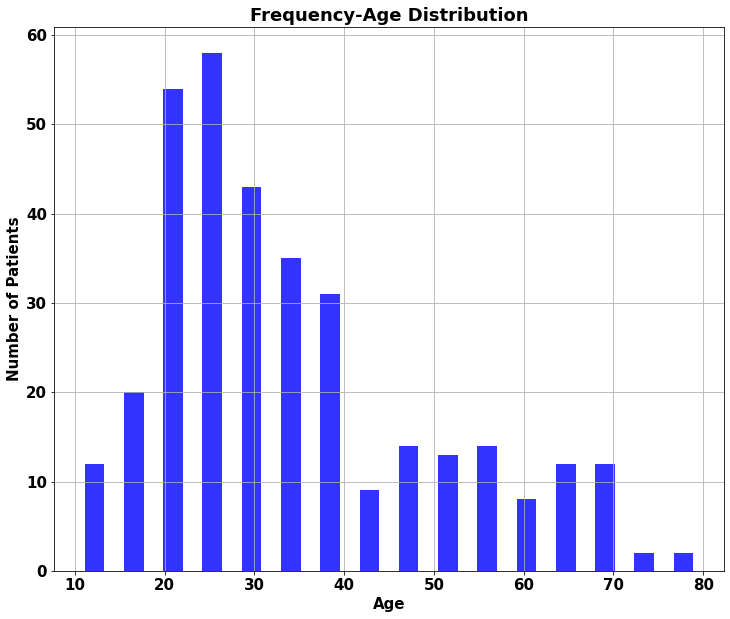

In [22]:
# creating a dictionary
font = {'size': 15}
  
# using rc function
plt.rc('font', **font)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"



plt.figure(figsize=(12, 10))
plt.hist(data['AGE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution', fontweight="bold")
plt.grid(True)
plt.savefig('Age-distribution.jpeg')
plt.show()

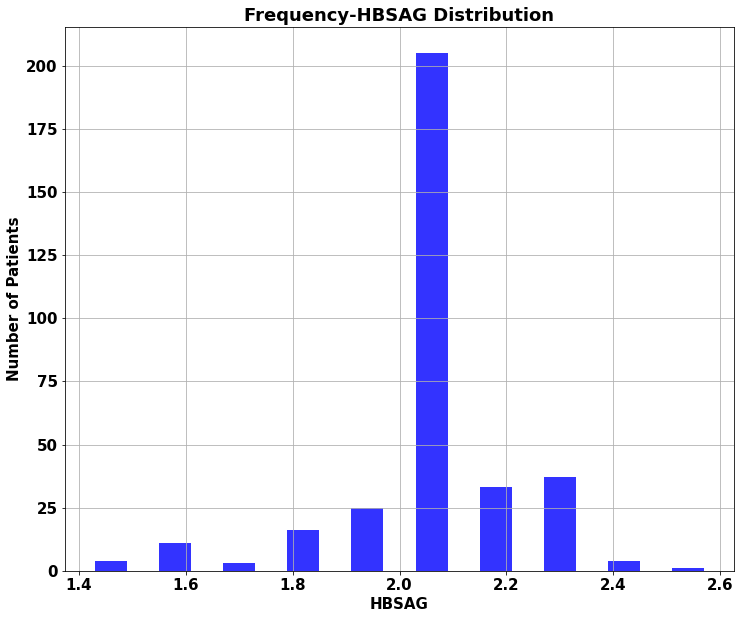

In [23]:
# creating a dictionary
font = {'size': 15}
  
# using rc function
plt.rc('font', **font)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(data['HBSAG +VE '], align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBSAG')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBSAG Distribution', fontweight="bold")
plt.grid(True)
plt.savefig('HBSAG_Distribution.jpeg')
plt.show()

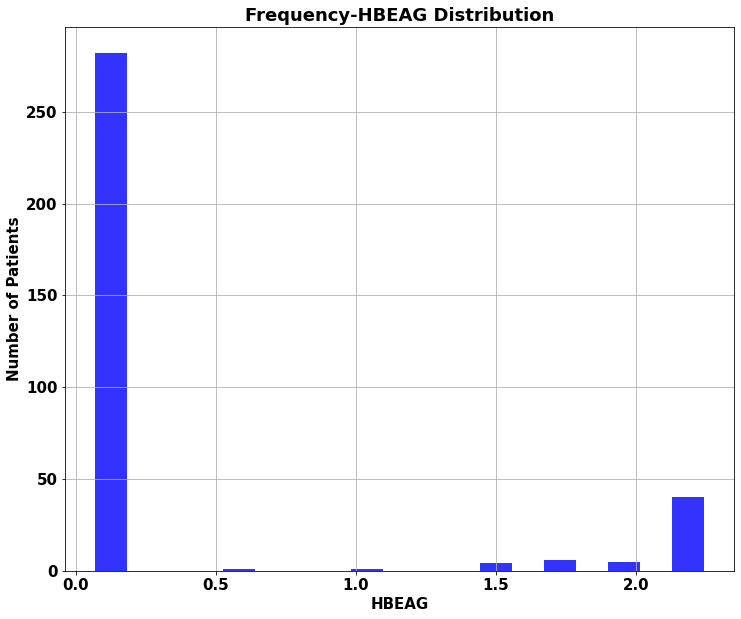

In [24]:
# creating a dictionary
font = {'size': 15}
  
# using rc function
plt.rc('font', **font)

plt.figure(figsize=(12, 10))
plt.hist(data['HBEAG +VE '], align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBEAG')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBEAG Distribution', fontweight="bold")
plt.grid(True)
plt.savefig('HBEAG_Distribution.jpeg')
plt.show()

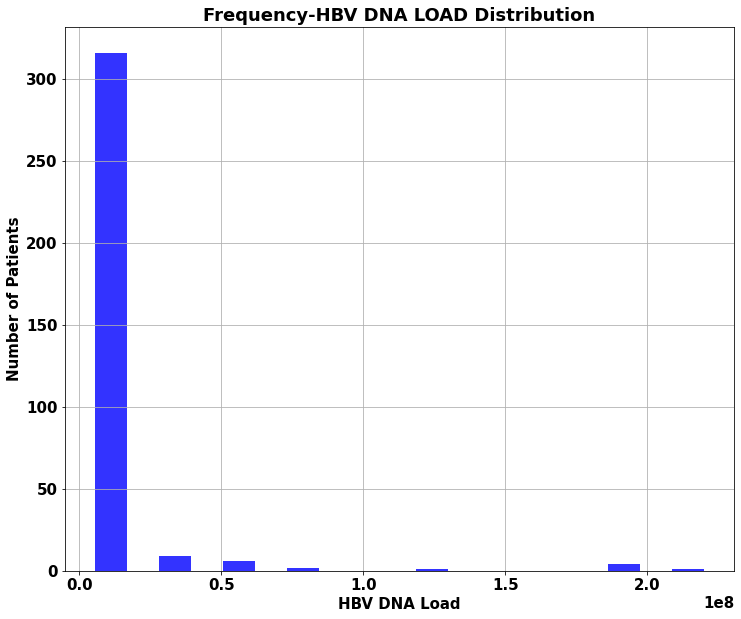

In [25]:
# creating a dictionary
font = {'size': 15}
  
# using rc function
plt.rc('font', **font)

plt.figure(figsize=(12, 10))
plt.hist(data['HBV DNA LOAD '], align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBV DNA Load')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBV DNA LOAD Distribution', fontweight="bold")
plt.grid(True)
plt.savefig('HBV_DNA_LOAD_Distribution.jpeg')
plt.show()

### Multiple Correlation

In [26]:
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
x1 = data[['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ']]
y1 = data['HBV DNA LOAD ']
mr.fit(x1, y1)

LinearRegression()

In [27]:
mr.intercept_

-19787047.248918794

In [28]:
mr.coef_

array([  -57304.17858868, -1104426.35580392, 10196953.62934406,
       19104945.84084493])

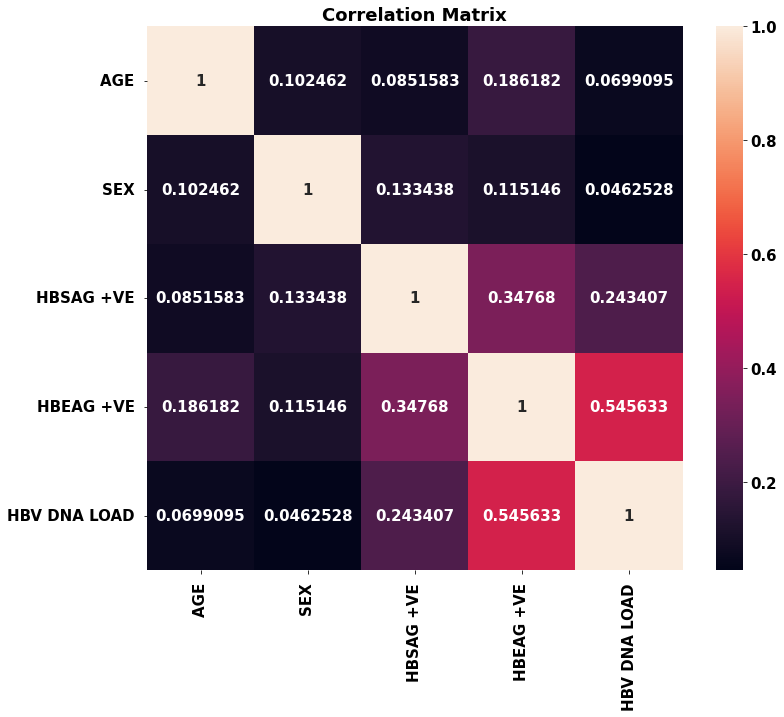

<Figure size 432x288 with 0 Axes>

In [29]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
data_corr = data[['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD ']].corr()
sns.heatmap(data_corr, annot=True, fmt='g')
plt.title('Correlation Matrix', fontweight="bold")
plt.show()
plt.savefig('Correlation_matrix_all_data.png')

### Visualization

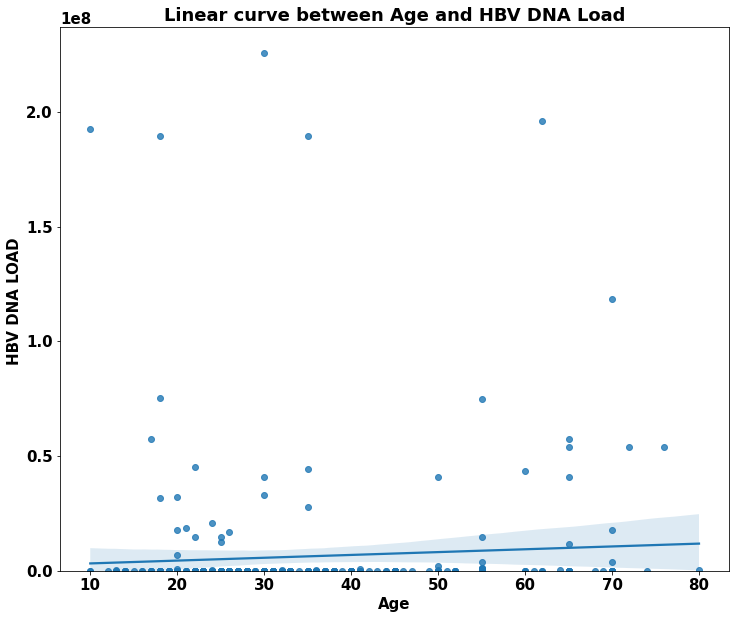

In [30]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12,10))
sns.regplot(x='AGE ', y='HBV DNA LOAD ', data=data)
plt.title('Linear curve between Age and HBV DNA Load', fontweight="bold")
plt.xlabel('Age')
plt.ylim(0,)
plt.savefig('reg_AGE_HBA.jpeg')

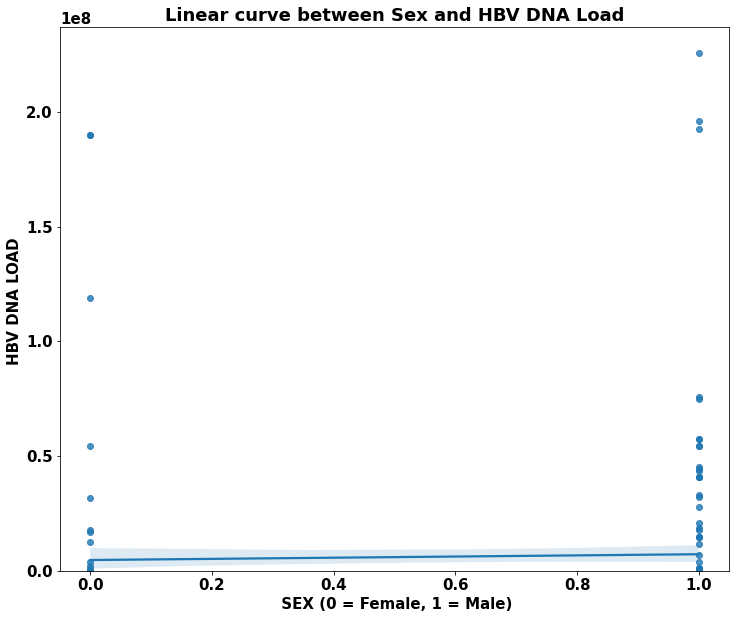

In [31]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12,10))
sns.regplot(x='SEX ', y='HBV DNA LOAD ', data=data)
plt.title('Linear curve between Sex and HBV DNA Load', fontweight="bold")

plt.xlabel(' SEX (0 = Female, 1 = Male)')
plt.ylim(0,)
plt.savefig('reg_Sex_HBV_DNA_Load_all_g1.jpeg')

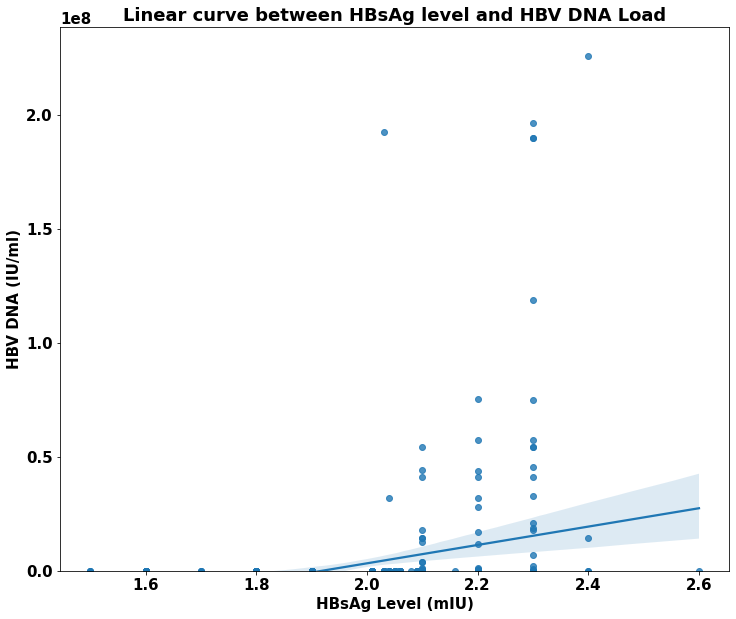

In [325]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12,10))
sns.regplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=data)
plt.title('Linear curve between HBsAg level and HBV DNA Load', fontweight="bold")
plt.xlabel('HBsAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBAG_HBA.jpeg')

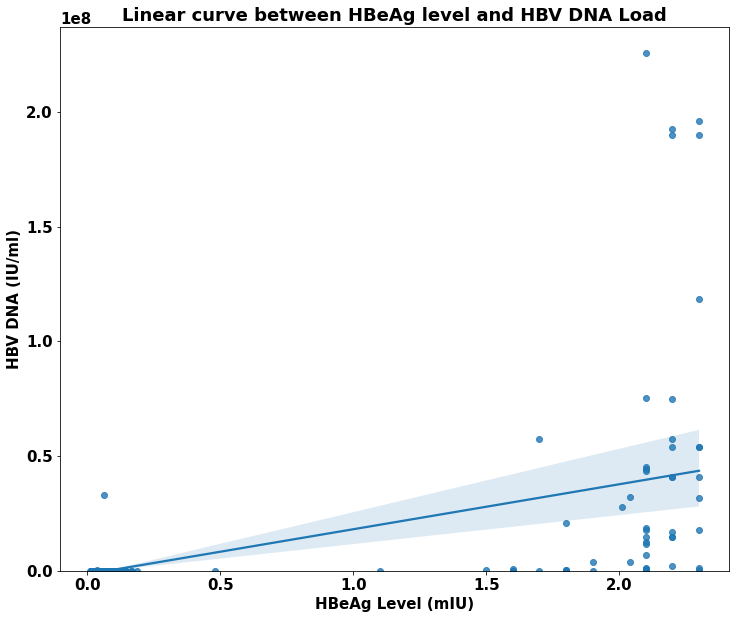

In [328]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12,10))
sns.regplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=data)
plt.title('Linear curve between HBeAg level and HBV DNA Load', fontweight="bold")
plt.xlabel('HBeAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBEAG_HBA.jpeg')

### Residual Plots

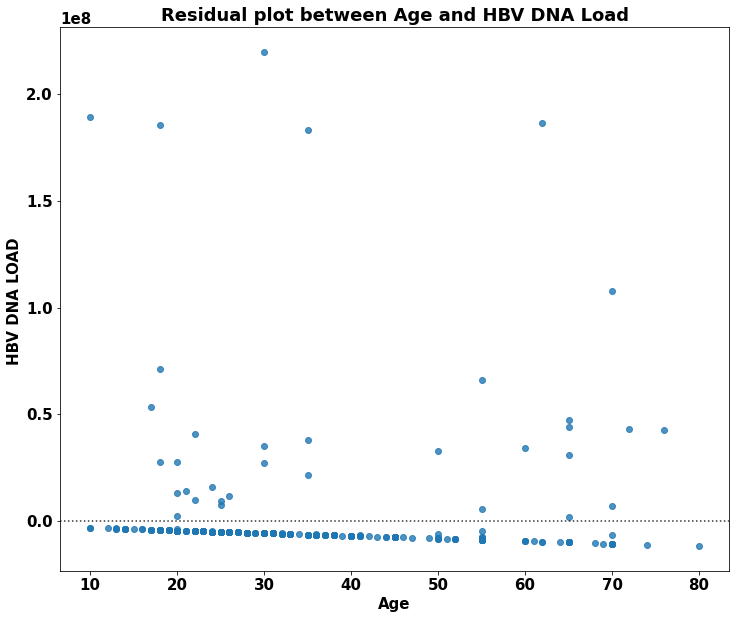

<Figure size 432x288 with 0 Axes>

In [34]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12,10))
sns.residplot(x='AGE ', y='HBV DNA LOAD ', data=data)
plt.title('Residual plot between Age and HBV DNA Load', fontweight="bold")
plt.xlabel('Age')
plt.show()
plt.savefig('residual_AGE_HBV.jpeg')

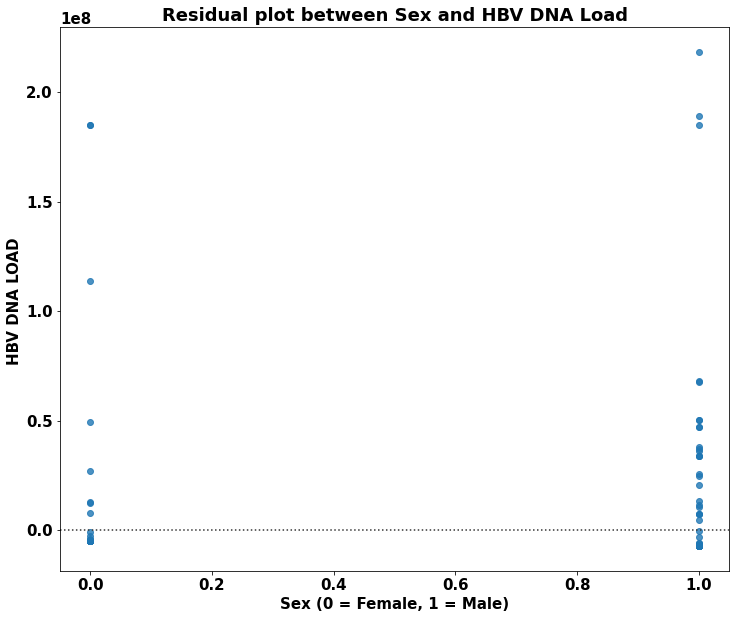

<Figure size 432x288 with 0 Axes>

In [35]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12,10))
sns.residplot(x='SEX ', y='HBV DNA LOAD ', data=data)
plt.title('Residual plot between Sex and HBV DNA Load', fontweight="bold")
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.show()
plt.savefig('residual_Sex_HBV.jpeg')

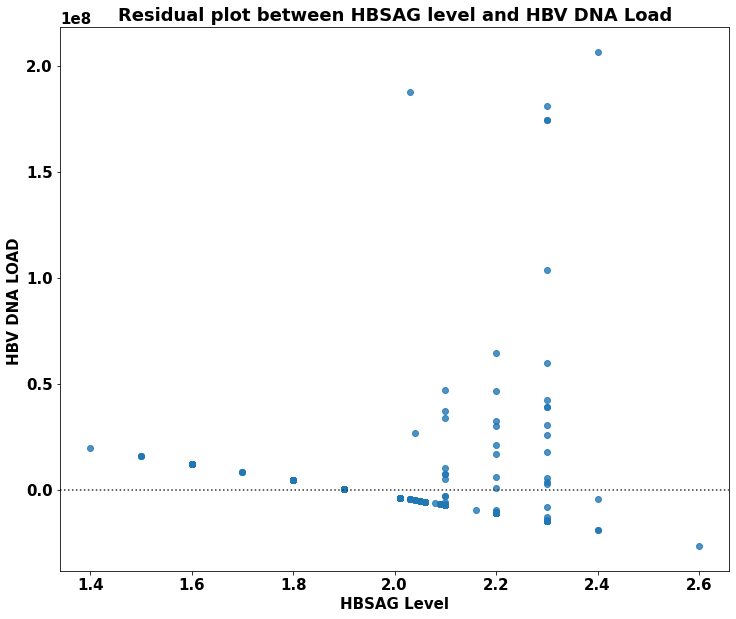

<Figure size 432x288 with 0 Axes>

In [36]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12,10))
sns.residplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=data)
plt.title('Residual plot between HBSAG level and HBV DNA Load', fontweight="bold")
plt.xlabel('HBSAG Level')
plt.show()
plt.savefig('residual_HBSAG_HBV.jpeg')

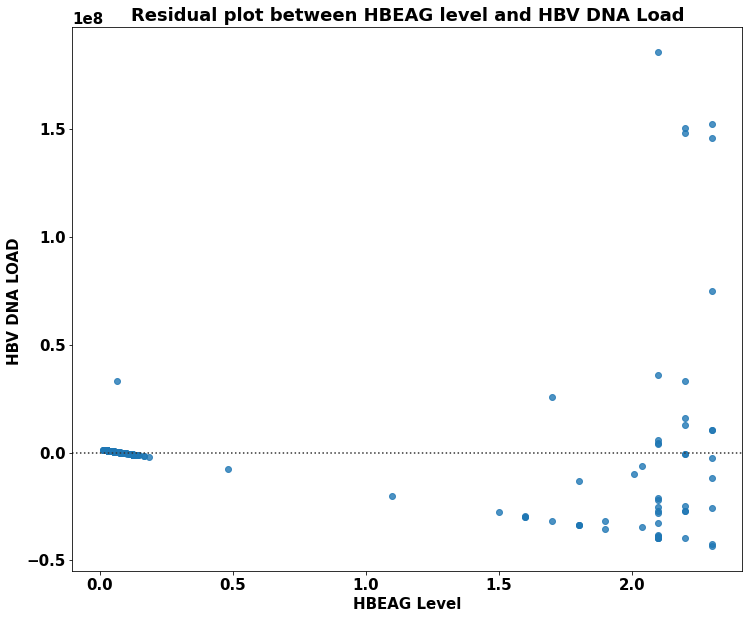

<Figure size 432x288 with 0 Axes>

In [37]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12,10))
sns.residplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=data)
plt.title('Residual plot between HBEAG level and HBV DNA Load', fontweight="bold")
plt.xlabel('HBEAG Level')
plt.show()
plt.savefig('residual_HBEG_HBA.jpeg')

### Statistical Data



In [318]:
data.columns

Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')

In [319]:
data_HBSAG = data['HBSAG +VE ']
data_HBEAG = data['HBEAG +VE ']
data_DNA = data['HBV DNA LOAD ']

In [321]:
from scipy import stats

t_value,p_value=stats.ttest_ind(data_HBSAG,data_DNA)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)



Test statistic is -4.257963
p-value for two tailed test is 0.000024


In [322]:
from scipy import stats

t_value,p_value=stats.ttest_ind(data_HBEAG,data_DNA)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is -4.257964
p-value for two tailed test is 0.000024


In [323]:
from scipy import stats

t_value,p_value=stats.ttest_ind(data_HBSAG,data_HBEAG)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

Test statistic is 40.302216
p-value for two tailed test is 0.000000


In [38]:
from scipy.stats import pearsonr
print('Two tailed sign between Age and HBSAG', pearsonr(data['AGE '], data['HBSAG +VE ']))
print('Two tailed sign between Age and HBEAG', pearsonr(data['AGE '], data['HBEAG +VE ']))
print('Two tailed sign between Age and HBA DNA load', pearsonr(data['AGE '], data['HBV DNA LOAD ']))

print('Two tailed sign between HBSAG and Age', pearsonr(data['HBSAG +VE '], data['AGE ']))
print('Two tailed sign between HBSAG and HBEAG', pearsonr(data['HBSAG +VE '], data['HBEAG +VE ']))
print('Two tailed sign between HBSAG and HBA DNA load', pearsonr(data['HBSAG +VE '], data['HBV DNA LOAD ']))

print('Two tailed sign between HBEAG and Age', pearsonr(data['HBEAG +VE '], data['AGE ']))
print('Two tailed sign between HBEAG and HBSAG', pearsonr(data['HBEAG +VE '], data['HBSAG +VE ']))
print('Two tailed sign between HBEAG and HBA DNA load', pearsonr(data['HBEAG +VE '], data['HBV DNA LOAD ']))

print('Two tailed sign between HBV DNA LOAD and Age', pearsonr(data['HBV DNA LOAD '], data['AGE ']))
print('Two tailed sign between HBV DNA LOAD and HBEAG', pearsonr(data['HBV DNA LOAD '], data['HBEAG +VE ']))
print('Two tailed sign between HBV DNA LOAD and HBSAG', pearsonr(data['HBV DNA LOAD '], data['HBSAG +VE ']))


Two tailed sign between Age and HBSAG (0.08515833288370259, 0.11758667969872959)
Two tailed sign between Age and HBEAG (0.18618163681993044, 0.0005700477839480738)
Two tailed sign between Age and HBA DNA load (0.06990950290650676, 0.19914628380133326)
Two tailed sign between HBSAG and Age (0.08515833288370259, 0.11758667969872959)
Two tailed sign between HBSAG and HBEAG (0.347680019816784, 4.5683145017687096e-11)
Two tailed sign between HBSAG and HBA DNA load (0.24340677624064688, 5.804068113127389e-06)
Two tailed sign between HBEAG and Age (0.18618163681993044, 0.0005700477839480738)
Two tailed sign between HBEAG and HBSAG (0.347680019816784, 4.5683145017687096e-11)
Two tailed sign between HBEAG and HBA DNA load (0.5456331135421051, 1.0848902679469103e-27)
Two tailed sign between HBV DNA LOAD and Age (0.06990950290650676, 0.19914628380133326)
Two tailed sign between HBV DNA LOAD and HBEAG (0.5456331135421051, 1.0848902679469103e-27)
Two tailed sign between HBV DNA LOAD and HBSAG (0.24

In [39]:
data.shape

(339, 5)

#### Sum of squares and cross products



In [40]:
N = data.shape
print(N)
sum_age = data['AGE '].sum()
##print('sum of the age:', sum_age)
sq_sum_age = sum_age**2
##print('square of the sum of age:', sq_sum_age)
sq_age = data['AGE ']**2
sum_sq_age = sq_age.sum()
##print('sum of sq_age:', sum_sq_age)
ss_age = sum_sq_age-(sq_sum_age/191)
print('sum of squares of age:', ss_age)


sum_HBSAG = data['HBSAG +VE '].sum()
##print('sum of the HBSAG:', sum_HBSAG)
sq_sum_HBSAG = sum_HBSAG**2
##print('square of the sum of HBSAG:', sq_sum_HBSAG)
sq_HBSAG = data['HBSAG +VE ']**2
sum_sq_HBSAG = sq_HBSAG.sum()
##print('sum of sq_HBSAG:', sum_sq_HBSAG)
ss_HBSAG = sum_sq_HBSAG-(sq_sum_HBSAG/191)
print('sum of squares of HBSAG:', ss_HBSAG)


sum_HBEAG = data['HBEAG +VE '].sum()
##print('sum of the HBEAG:', sum_HBEAG)
sq_sum_HBEAG = sum_HBEAG**2
##print('square of the sum of HBEAG:', sq_sum_HBEAG)
sq_HBEAG = data['HBEAG +VE ']**2
sum_sq_HBEAG = sq_HBEAG.sum()
##print('sum of sq_HBEAG:', sum_sq_HBEAG)
ss_HBEAG = sum_sq_HBEAG-(sq_sum_HBEAG/191)
print('sum of squares of HBEAG:', ss_HBEAG)


sum_HBA = data['HBV DNA LOAD '].sum()
##print('sum of the HBA:', sum_HBA)
sq_sum_HBA = sum_HBA**2
##print('square of the sum of HBA:', sq_sum_HBA)
sq_HBA = data['HBV DNA LOAD ']**2
sum_sq_HBA = sq_HBA.sum()
##print('sum of sq_HBA:', sum_sq_HBA)
ss_HBA = sum_sq_HBA-(sq_sum_HBA/191)
print('sum of squares of HBA:', ss_HBA)



(339, 5)
sum of squares of age: -230086.78534031415
sum of squares of HBSAG: -1117.4069654450268
sum of squares of HBEAG: 148.34606103664922
sum of squares of HBA: 2.3361797601338138e+17


### Cross Products



In [41]:
data = data.drop(data.index[32])

In [42]:
df_age_np1 = np.array(data['AGE '])
df_age_np = df_age_np1.reshape(169,2)
df_hbsag_np1 = np.array(data['HBSAG +VE '])
df_hbsag_np = df_hbsag_np1.reshape(169,2)
df_hbeag_np1 = np.array(data['HBEAG +VE '])
df_hbeag_np = df_hbeag_np1.reshape(169,2)
df_hba_np1 = np.array(data['HBV DNA LOAD '])
df_hba_np = df_hba_np1.reshape(169,2)



In [43]:
cross_prod_age_hbsag = np.cross(df_age_np, df_hbsag_np)
print('cross product between AGE and HBSAG:', cross_prod_age_hbsag.sum()**2)
cross_prod_age_hbeag = np.cross(df_age_np, df_hbeag_np)
print('cross product between AGE and HBEAG:', cross_prod_age_hbeag.sum()**2)
cross_prod_age_hba = np.cross(df_age_np, df_hba_np)
print('cross product between AGE and HBV DNA Load:', cross_prod_age_hba.sum()**2)
cross_prod_hbsag_hbeag = np.cross(df_hbeag_np, df_hbsag_np)
print('cross product between HBSAG and HBEAG:', cross_prod_hbsag_hbeag.sum()**2)
cross_prod_hbsag_hba = np.cross(df_hbsag_np, df_hba_np)
print('cross product between HBSAG and HBV DNA LOAD:', cross_prod_hbsag_hba.sum()**2)
cross_prod_hbeag_hba = np.cross(df_hbeag_np, df_hba_np)
print('cross product between HBEAG and HBA:', cross_prod_hbeag_hba.sum()**2)



cross product between AGE and HBSAG: 17342.256100000046
cross product between AGE and HBEAG: 78182.31132100003
cross product between AGE and HBV DNA Load: 3.821977846830602e+19
cross product between HBSAG and HBEAG: 179.87503806249995
cross product between HBSAG and HBV DNA LOAD: 1.0732168649577034e+18
cross product between HBEAG and HBA: 9.147377448608136e+17


### Covariance matrix



In [44]:
df_np = np.array([df_age_np1, df_hbsag_np1, df_hbeag_np1, df_hba_np1])
df_np.shape



(4, 338)

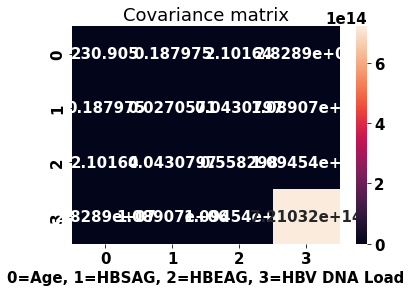

<Figure size 432x288 with 0 Axes>

In [45]:
df_cov = np.cov(df_np, bias = True)
sns.heatmap(df_cov, annot=True, fmt='g')
plt.title('Covariance matrix')
plt.xlabel('0=Age, 1=HBSAG, 2=HBEAG, 3=HBV DNA Load')
plt.show()
plt.savefig('covariance_matrix_All_group.jpeg')

## Gender based analysis (Group1.1_female)

In [46]:
data_f = pd.read_excel('Data.xlsx', sheet_name=1)

In [47]:
data_f

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,36,F,2.05,0.057,7350.0
1,25,F,1.70,0.024,3.8
2,31,F,1.50,0.037,3.8
3,37,F,2.04,0.053,3.8
4,38,F,1.90,0.091,3.8
...,...,...,...,...,...
134,25,F,2.10,2.100,12436150.0
135,24,F,2.10,1.800,247200.0
136,70,F,2.10,2.100,17669100.0
137,45,F,2.10,1.700,11850.0


In [48]:
db_f = data_f.drop(data_f.columns[[1]], axis=1)

In [49]:
db_f.drop(labels=[137], axis=0, inplace=True)

In [50]:
db_f.shape

(138, 4)

In [51]:
z = np.abs(stats.zscore(db_f))

In [52]:
db_f_clean = db_f[(z<3).all(axis=1)]

In [53]:
db_f_clean.shape

(130, 4)

### Interquartile range method

In [54]:
Q1 = db_f.quantile(q=.25)
Q3 = db_f.quantile(q=.75)
IQR = db_f.apply(stats.iqr)

db_clean_iq_f = db_f[~((db_f < (Q1-1.5*IQR)) | (db_f > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_f.shape

(70, 4)

### Copy  the data

In [55]:
df_f = db_f_clean.copy()

### Discriptive Analysis

In [56]:
df_f.describe()

,AGE,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
count,130.000000,130.000000,130.000000,1.300000e+02
mean,31.861538,2.042538,0.216746,1.877903e+06
std,12.396395,0.163581,0.533122,1.678087e+07
min,10.000000,1.500000,0.012000,3.800000e+00
25%,24.000000,2.030000,0.034750,3.800000e+00
50%,28.000000,2.100000,0.061500,1.240000e+02
75%,37.750000,2.100000,0.098000,3.380000e+02
max,70.000000,2.300000,2.200000,1.897581e+08


In [57]:
df_f.columns

Index(['AGE ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')

### Exploratory Analysis for Female group1.1

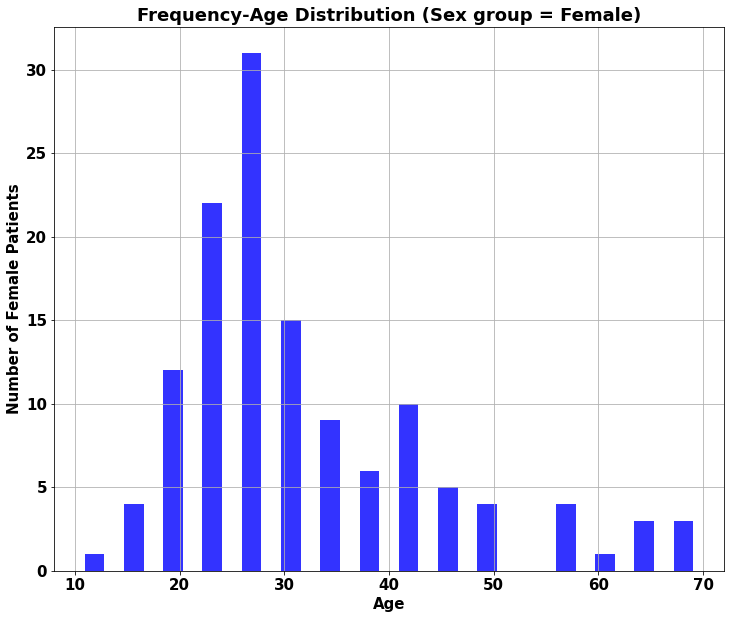

In [58]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_f['AGE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Female Patients')
plt.title('Frequency-Age Distribution (Sex group = Female)', fontweight="bold")
plt.grid(True)
plt.savefig('Age_distribution_Female.jpeg')
plt.show()

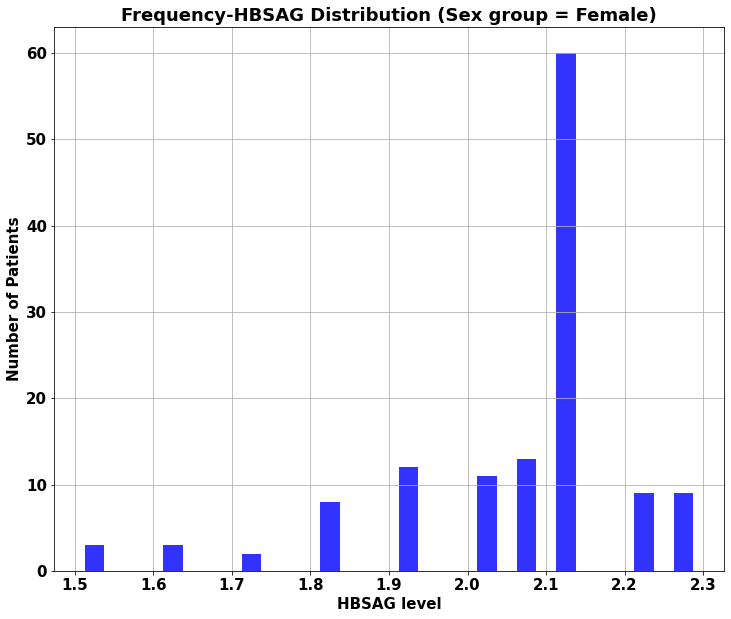

In [59]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_f['HBSAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBSAG level')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBSAG Distribution (Sex group = Female)', fontweight="bold")
plt.grid(True)
plt.savefig('HBSAG-distribution-Female.jpeg')
plt.show()

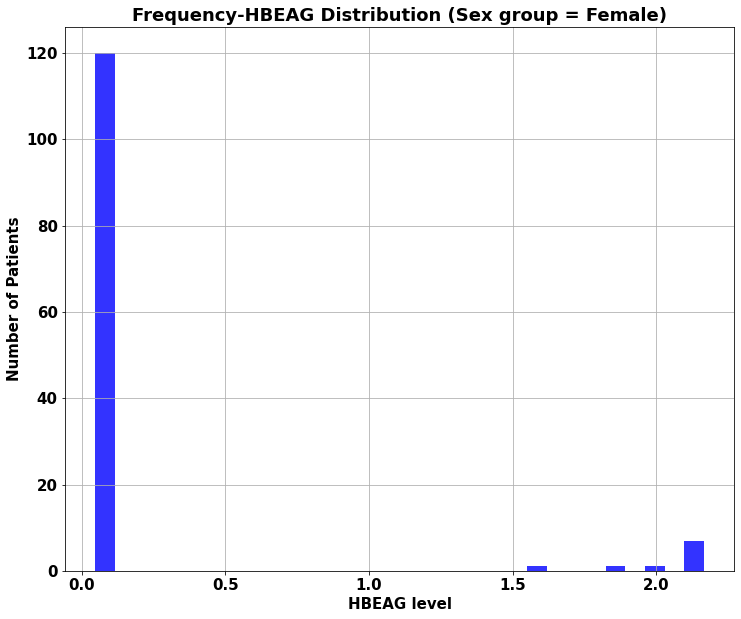

In [60]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_f['HBEAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBEAG level')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBEAG Distribution (Sex group = Female)', fontweight="bold")
plt.grid(True)
plt.savefig('HBEAG-distribution-Female.jpeg')
plt.show()

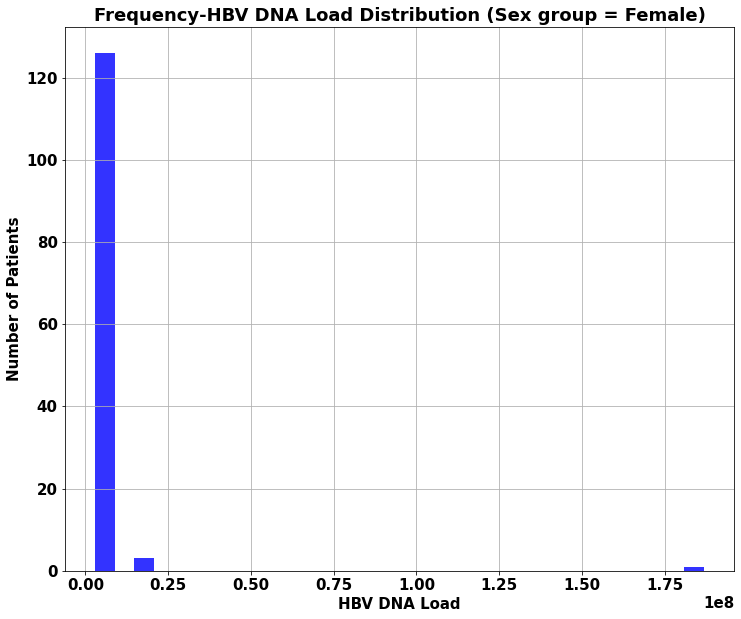

In [61]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_f['HBV DNA LOAD '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBV DNA Load')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBV DNA Load Distribution (Sex group = Female)', fontweight="bold")
plt.grid(True)
plt.savefig('HBV_DNA_Load-distribution-Female.jpeg')
plt.show()

## Multiple Regression of Female (group1)

In [62]:
mr_f = LinearRegression()
x_f = df_f[['AGE ', 'HBSAG +VE ', 'HBEAG +VE ']]
y_f = df_f['HBV DNA LOAD ']
mr_f.fit(x_f,y_f)

LinearRegression()

In [63]:
mr_f.intercept_

-12835724.970393406

In [64]:
mr_f.coef_

array([ -155321.16983101,  8252982.2487614 , 12943094.27822644])

### Correlation matrix

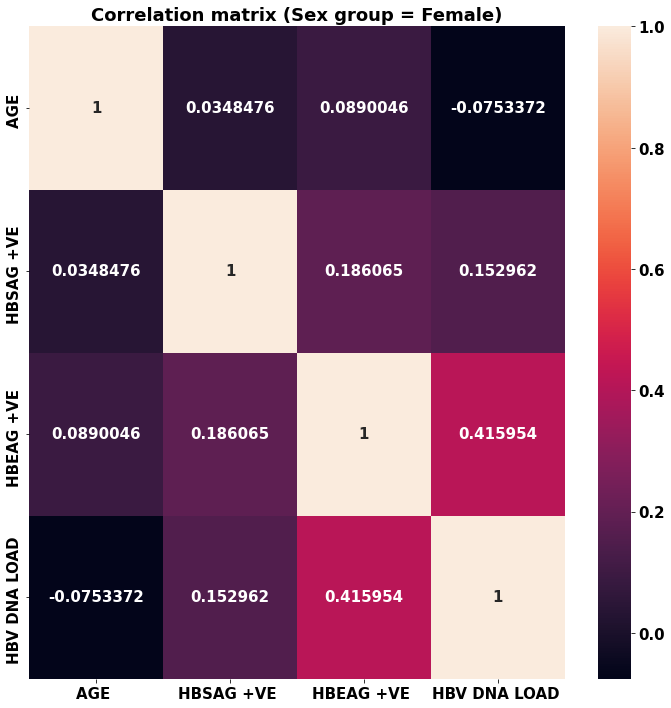

<Figure size 432x288 with 0 Axes>

In [65]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 12))
df_f_corr = df_f[['AGE ','HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD ']].corr()
sns.heatmap(df_f_corr, annot=True, fmt='g')
plt.title('Correlation matrix (Sex group = Female)', fontweight="bold")
plt.show()
plt.savefig('Correlation_matrix_Female_g_1_2.jpeg')

### Visualization

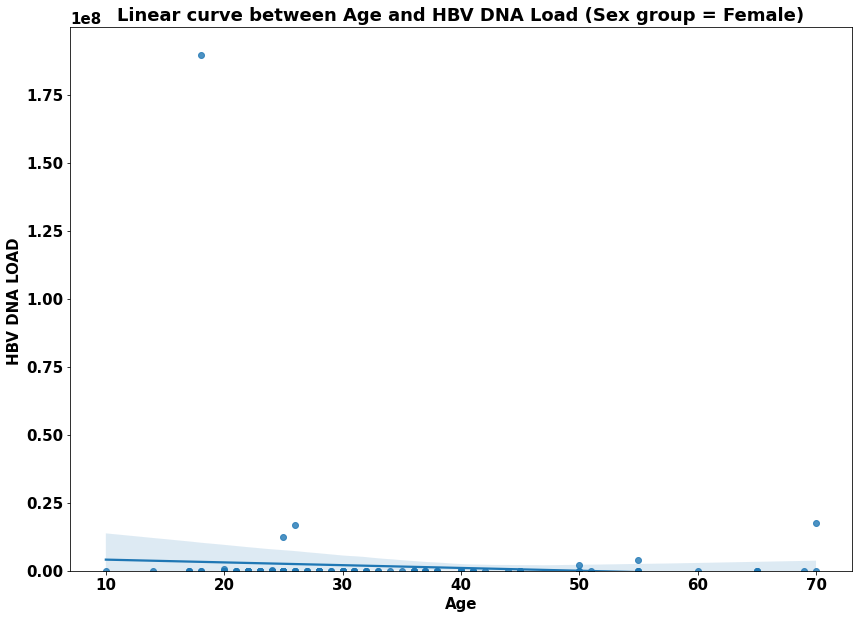

In [66]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14,10))
sns.regplot(x='AGE ', y='HBV DNA LOAD ', data=df_f)
plt.title('Linear curve between Age and HBV DNA Load (Sex group = Female)', fontweight="bold")
plt.xlabel('Age')
plt.ylim(0,)
plt.savefig('reg_Age_HBV_DNA_Load_Female.jpeg')

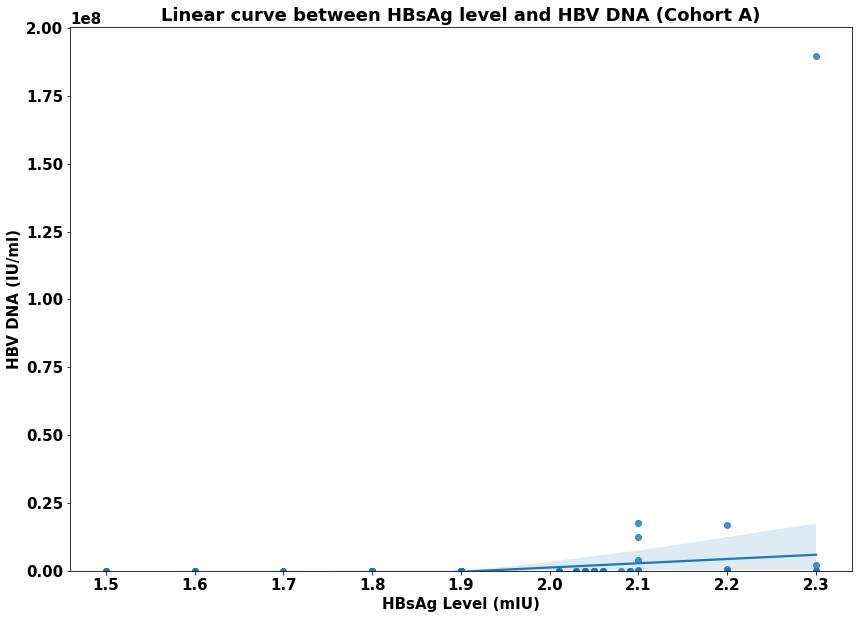

In [329]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(14,10))
sns.regplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_f)
plt.title('Linear curve between HBsAg level and HBV DNA (Cohort A)', fontweight="bold")
plt.xlabel('HBsAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBSAG_HBV_DNA_Load_Female.jpeg')

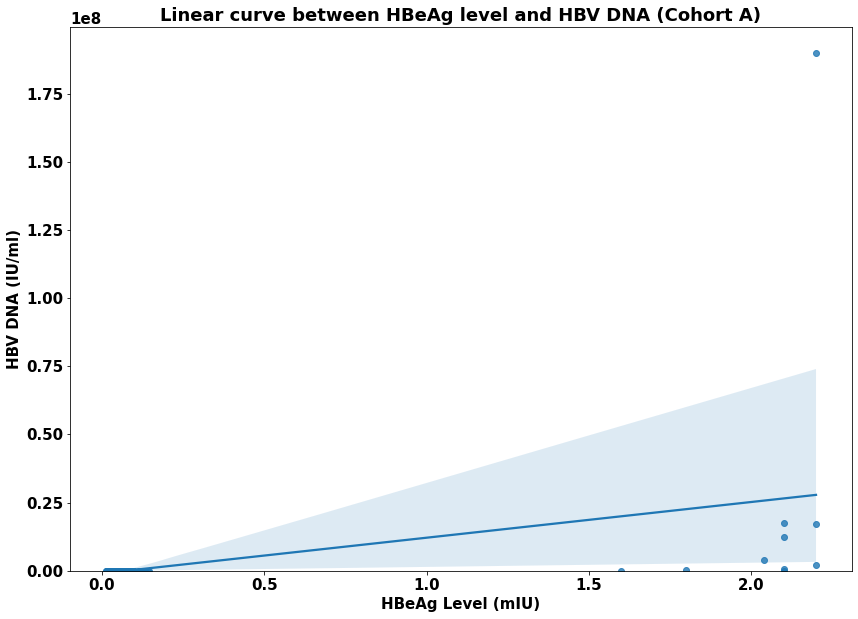

In [330]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(14,10))
sns.regplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_f)
plt.title('Linear curve between HBeAg level and HBV DNA (Cohort A)', fontweight="bold")
plt.xlabel('HBeAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBEAG_HBV_Female.jpeg')

### Residual Plots

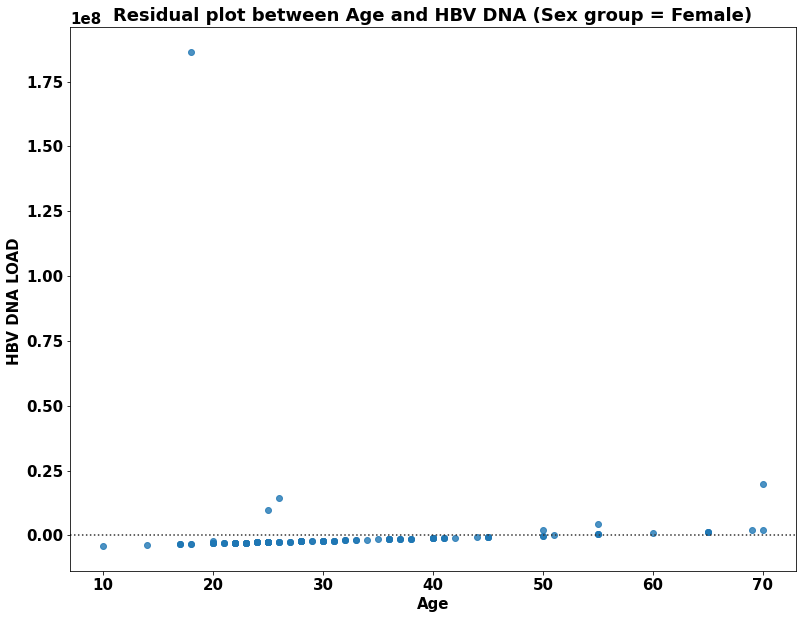

<Figure size 432x288 with 0 Axes>

In [69]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(13,10))
sns.residplot(x='AGE ', y='HBV DNA LOAD ', data=df_f)
plt.title('Residual plot between Age and HBV DNA (Sex group = Female)', fontweight="bold")
plt.xlabel('Age')
plt.show()
plt.savefig('residual_AGE_HBV_female.jpeg')

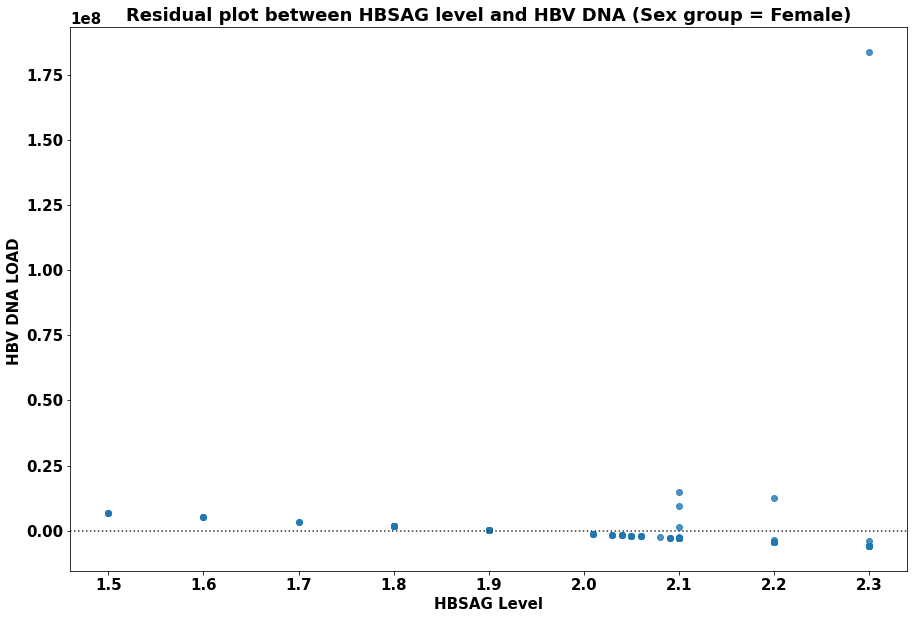

<Figure size 432x288 with 0 Axes>

In [70]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(15,10))
sns.residplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_f)
plt.title('Residual plot between HBSAG level and HBV DNA (Sex group = Female)', fontweight="bold")
plt.xlabel('HBSAG Level')
plt.show()
plt.savefig('residual_HBSAG_HBV_female.jpeg')

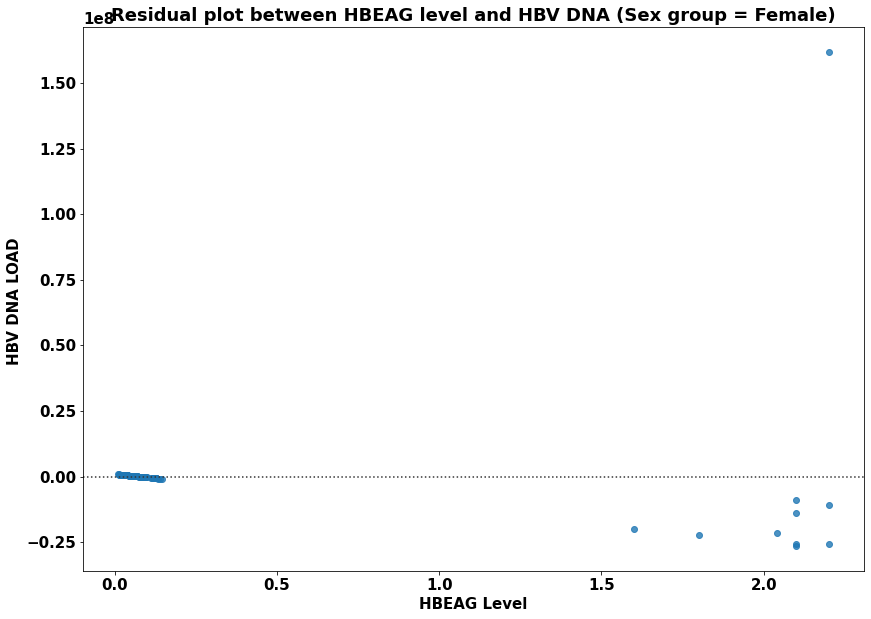

<Figure size 432x288 with 0 Axes>

In [71]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(14,10))
sns.residplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_f)
plt.title('Residual plot between HBEAG level and HBV DNA (Sex group = Female)', fontweight="bold")
plt.xlabel('HBEAG Level')
plt.show()
plt.savefig('residual_HBEAG_HBV_Female.jpeg')

### Statistical Data

In [72]:
from scipy.stats import pearsonr
print('Two tailed sign between Age and HBSAG', pearsonr(df_f['AGE '], df_f['HBSAG +VE ']))
print('Two tailed sign between Age and HBEAG', pearsonr(df_f['AGE '], df_f['HBEAG +VE ']))
print('Two tailed sign between Age and HBA DNA load', pearsonr(df_f['AGE '], df_f['HBV DNA LOAD ']))

Two tailed sign between Age and HBSAG (0.034847584017151156, 0.6938721343600255)
Two tailed sign between Age and HBEAG (0.08900457827297088, 0.31393125839046165)
Two tailed sign between Age and HBA DNA load (-0.07533719206965384, 0.39427431159126325)


In [73]:
print('Two tailed sign between HBSAG and Age', pearsonr(df_f['HBSAG +VE '], df_f['AGE ']))
print('Two tailed sign between HBSAG and HBEAG', pearsonr(df_f['HBSAG +VE '], df_f['HBEAG +VE ']))
print('Two tailed sign between HBSAG and HBA DNA load', pearsonr(df_f['HBSAG +VE '], df_f['HBV DNA LOAD ']))

Two tailed sign between HBSAG and Age (0.034847584017151156, 0.6938721343600255)
Two tailed sign between HBSAG and HBEAG (0.18606529907265443, 0.03404598691085564)
Two tailed sign between HBSAG and HBA DNA load (0.15296158752173292, 0.0823120401676582)


In [74]:
print('Two tailed sign between HBEAG and Age', pearsonr(df_f['HBEAG +VE '], df_f['AGE ']))
print('Two tailed sign between HBEAG and HBSAG', pearsonr(df_f['HBEAG +VE '], df_f['HBSAG +VE ']))
print('Two tailed sign between HBEAG and HBA DNA load', pearsonr(df_f['HBEAG +VE '], df_f['HBV DNA LOAD ']))

Two tailed sign between HBEAG and Age (0.08900457827297088, 0.31393125839046165)
Two tailed sign between HBEAG and HBSAG (0.18606529907265443, 0.03404598691085564)
Two tailed sign between HBEAG and HBA DNA load (0.41595402414426513, 8.579590666103054e-07)


In [75]:
print('Two tailed sign between HBV DNA LOAD and Age', pearsonr(df_f['HBV DNA LOAD '], df_f['AGE ']))
print('Two tailed sign between HBV DNA LOAD and HBEAG', pearsonr(df_f['HBV DNA LOAD '], df_f['HBEAG +VE ']))
print('Two tailed sign between HBV DNA LOAD and HBSAG', pearsonr(df_f['HBV DNA LOAD '], df_f['HBSAG +VE ']))

Two tailed sign between HBV DNA LOAD and Age (-0.07533719206965384, 0.39427431159126325)
Two tailed sign between HBV DNA LOAD and HBEAG (0.41595402414426513, 8.579590666103054e-07)
Two tailed sign between HBV DNA LOAD and HBSAG (0.15296158752173292, 0.0823120401676582)


In [76]:
df_f.corr()

,AGE,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
AGE,1.000000,0.034848,0.089005,-0.075337
HBSAG +VE,0.034848,1.000000,0.186065,0.152962
HBEAG +VE,0.089005,0.186065,1.000000,0.415954
HBV DNA LOAD,-0.075337,0.152962,0.415954,1.000000


#### Sum of squares and cross products

In [77]:
N_f = df_f.shape
print(N_f)
sum_age_f = df_f['AGE '].sum()
print('sum of the age:', sum_age_f)
sq_sum_age_f = sum_age_f**2
print('square of the sum of age:', sq_sum_age_f)
sq_age = df_f['AGE ']**2
sum_sq_age_f = sq_age.sum()
print('sum of sq_age:', sum_sq_age_f)
ss_age_f = sum_sq_age_f-(sq_sum_age_f/139)
print('sum of squares of age:', ss_age_f)

(130, 4)
sum of the age: 4142
square of the sum of age: 17156164
sum of sq_age: 151794
sum of squares of age: 28368.359712230216


In [78]:
N_f = df_f.shape
print(N_f)
sum_HBSAG_f = df_f['HBSAG +VE '].sum()
print('sum of the HBSAG:', sum_HBSAG_f)
sq_sum_HBSAG_f = sum_HBSAG_f**2
print('square of the sum of HBSAG:', sq_sum_HBSAG_f)
sq_HBSAG = df_f['HBSAG +VE ']**2
sum_sq_HBSAG_f = sq_HBSAG.sum()
print('sum of sq_HBSAG:', sum_sq_HBSAG_f)
ss_HBSAG_f = sum_sq_HBSAG_f-(sq_sum_HBSAG_f/139)
print('sum of squares of HBSAG:', ss_HBSAG_f)

(130, 4)
sum of the HBSAG: 265.53
square of the sum of HBSAG: 70506.18089999999
sum of sq_HBSAG: 545.8071
sum of squares of HBSAG: 38.5683884892087


In [79]:
N_f = df_f.shape
print(N_f)
sum_HBEAG_f = df_f['HBEAG +VE '].sum()
print('sum of the HBEAG:', sum_HBEAG_f)
sq_sum_HBEAG_f = sum_HBEAG_f**2
print('square of the sum of HBEAG:', sq_sum_HBEAG_f)
sq_HBEAG = df_f['HBEAG +VE ']**2
sum_sq_HBEAG_f = sq_HBEAG.sum()
print('sum of sq_HBEAG:', sum_sq_HBEAG_f)
ss_HBEAG_f = sum_sq_HBEAG_f-(sq_sum_HBEAG_f/139)
print('sum of squares of HBEAG:', ss_HBEAG_f)

(130, 4)
sum of the HBEAG: 28.177000000000003
square of the sum of HBEAG: 793.9433290000002
sum of sq_HBEAG: 42.771517
sum of squares of HBEAG: 37.05969448920864


In [80]:
N_f = df_f.shape
print(N_f)
sum_HBA_f = df_f['HBV DNA LOAD '].sum()
print('sum of the HBA:', sum_HBA_f)
sq_sum_HBA_f = sum_HBA_f**2
print('square of the sum of HBA:', sq_sum_HBA_f)
sq_HBA = df_f['HBV DNA LOAD ']**2
sum_sq_HBA_f = sq_HBA.sum()
print('sum of sq_HBA:', sum_sq_HBA_f)
ss_HBA_f = sum_sq_HBA_f-(sq_sum_HBA_f/139)
print('sum of squares of HBA:', ss_HBA_f)

(130, 4)
sum of the HBA: 244127412.39999998
square of the sum of HBA: 5.959819348511966e+16
sum of sq_HBA: 3.67845372193732e+16
sum of squares of HBA: 3.6355773237465864e+16


### Cross Products

In [81]:
df_f_age_np1 = np.array(df_f['AGE '])
df_f_age_np = df_f_age_np1.reshape(65,2)
df_f_hbsag_np1 = np.array(df_f['HBSAG +VE '])
df_f_hbsag_np = df_f_hbsag_np1.reshape(65,2)
df_f_hbeag_np1 = np.array(df_f['HBEAG +VE '])
df_f_hbeag_np = df_f_hbeag_np1.reshape(65,2)
df_f_hba_np1 = np.array(df_f['HBV DNA LOAD '])
df_f_hba_np = df_f_hba_np1.reshape(65,2)

In [82]:
cross_prod_age_hbsag = np.cross(df_f_age_np, df_f_hbsag_np)
print('cross product between AGE and HBSAG:', cross_prod_age_hbsag.sum()**2)
cross_prod_age_hbeag = np.cross(df_f_age_np, df_f_hbeag_np)
print('cross product between AGE and HBEAG:', cross_prod_age_hbeag.sum()**2)
cross_prod_age_hba = np.cross(df_f_age_np, df_f_hba_np)
print('cross product between AGE and HBV DNA Load:', cross_prod_age_hba.sum()**2)
cross_prod_hbsag_hbeag = np.cross(df_f_hbeag_np, df_f_hbsag_np)
print('cross product between HBSAG and HBEAG:', cross_prod_hbsag_hbeag.sum()**2)
cross_prod_hbsag_hba = np.cross(df_f_hbsag_np, df_f_hba_np)
print('cross product between HBSAG and HBV DNA LOAD:', cross_prod_hbsag_hba.sum()**2)
cross_prod_hbeag_hba = np.cross(df_f_hbeag_np, df_f_hba_np)
print('cross product between HBEAG and HBA:', cross_prod_hbeag_hba.sum()**2)

cross product between AGE and HBSAG: 184444.48089999994
cross product between AGE and HBEAG: 16981.738596
cross product between AGE and HBV DNA Load: 1.325904213953858e+19
cross product between HBSAG and HBEAG: 8.084752956899989
cross product between HBSAG and HBV DNA LOAD: 1.0693776185279707e+17
cross product between HBEAG and HBA: 1.1190777362590821e+17


### Covariance matrix

In [83]:
df_f_np = np.array([df_f_age_np1, df_f_hbsag_np1, df_f_hbeag_np1, df_f_hba_np1])
df_f_np.shape

(4, 130)

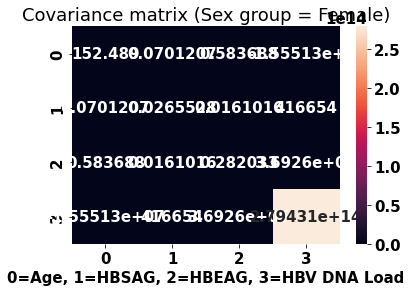

<Figure size 432x288 with 0 Axes>

In [84]:
df_f_cov = np.cov(df_f_np, bias = True)
sns.heatmap(df_f_cov, annot=True, fmt='g')
plt.title('Covariance matrix (Sex group = Female)')
plt.xlabel('0=Age, 1=HBSAG, 2=HBEAG, 3=HBV DNA Load')
plt.show()
plt.savefig('covariance_matrix_female.jpeg')

# Gender based analysis (Group1.2_male)

In [85]:
data_m = pd.read_excel('Data.xlsx', sheet_name=2)
data_m.head()

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,31,M,2.1,0.029,3.8
1,44,M,1.8,0.062,3.8
2,25,M,1.6,0.034,3.8
3,24,M,1.8,0.082,3.8
4,30,M,1.6,0.055,3.8


### Encoding Gender



In [86]:
db_m = data_m.drop(data_m.columns[[1]], axis=1)

In [87]:
db_m.shape

(210, 4)

In [88]:
z = np.abs(stats.zscore(db_m))

In [89]:
db_m_clean = db_m[(z<3).all(axis=1)]

In [90]:
db_m_clean.shape

(203, 4)

### Interquartile range method

In [91]:
Q1 = db_m.quantile(q=.25)
Q3 = db_m.quantile(q=.75)
IQR = db_m.apply(stats.iqr)

db_clean_iq_m = db_m[~((db_m < (Q1-1.5*IQR)) | (db_m > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_m.shape

(139, 4)

### Copy  the data



In [92]:
df_m = db_m_clean.copy()

### Descriptive Analysis

In [93]:
df_m_des = df_m.describe()
print(tabulate(df_m_des))
df_m_des.to_csv('male_describe.csv')

-----  --------  ----------  ----------  --------------
count  203       203         203          203
mean    35.6601    2.08463     0.44597      4.35274e+06
std     16.4719    0.170591    0.795367     1.34847e+07
min     10         1.3         0.011        3.8
25%     23         2.06        0.0365       3.8
50%     31         2.1         0.064      130
75%     45         2.2         0.129     4050
max     80         2.6         2.9          7.55169e+07
-----  --------  ----------  ----------  --------------


In [94]:
print('columns:', df_m.columns)

columns: Index(['AGE ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')


### Exploratory Analysis

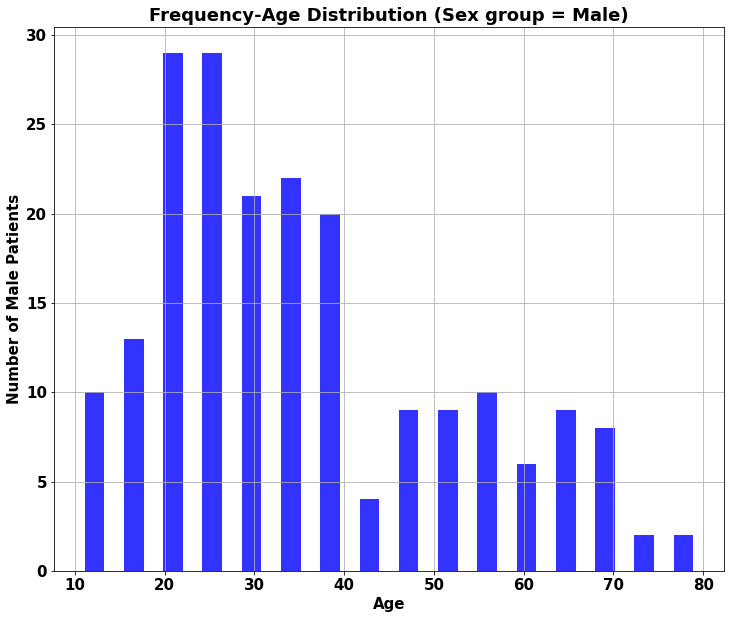

In [95]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_m['AGE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Male Patients')
plt.title('Frequency-Age Distribution (Sex group = Male)', fontweight="bold")
plt.grid(True)
plt.savefig('Age_distribution_Male.jpeg')
plt.show()

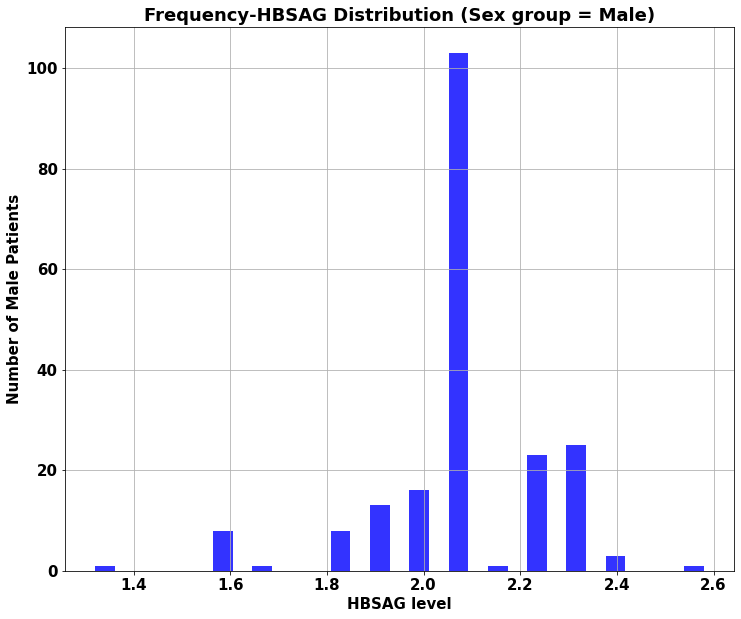

In [96]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_m['HBSAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBSAG level')
plt.ylabel('Number of Male Patients')
plt.title('Frequency-HBSAG Distribution (Sex group = Male)', fontweight="bold")
plt.grid(True)
plt.savefig('HBSAG_distribution_Male.jpeg')
plt.show()

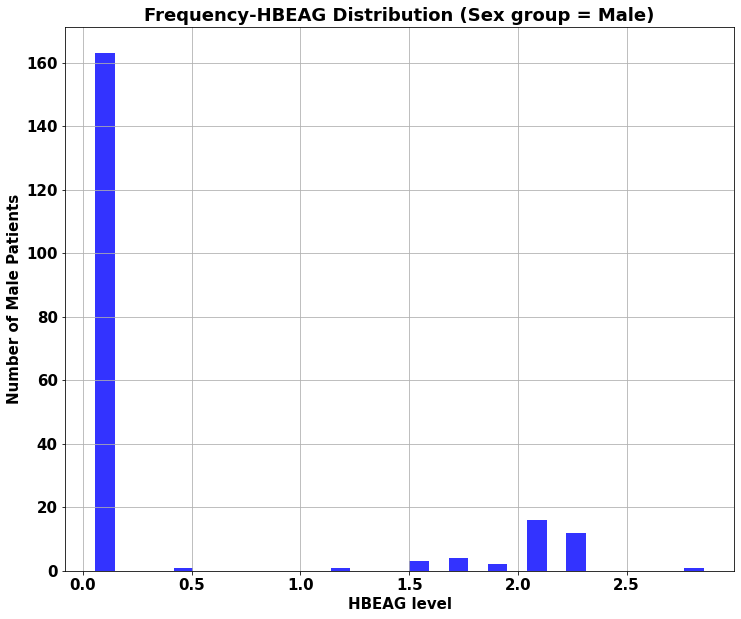

In [97]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_m['HBEAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBEAG level')
plt.ylabel('Number of Male Patients')
plt.title('Frequency-HBEAG Distribution (Sex group = Male)', fontweight="bold")
plt.grid(True)
plt.savefig('HBEAG_distribution_Male.jpeg')
plt.show()

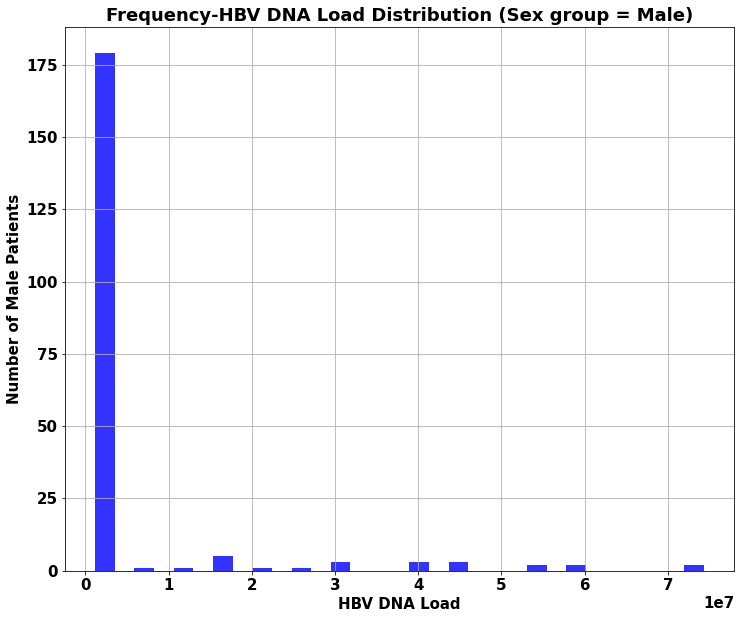

In [98]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_m['HBV DNA LOAD '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBV DNA Load')
plt.ylabel('Number of Male Patients')
plt.title('Frequency-HBV DNA Load Distribution (Sex group = Male)', fontweight="bold")
plt.grid(True)
plt.savefig('HBV_DNA_Load_distribution_male.jpeg')
plt.show()

### Multiple regression among Male (Group 1.2)

In [99]:
mr_m = LinearRegression()
x_m = df_m[['AGE ', 'HBSAG +VE ', 'HBEAG +VE ']]
y_m = df_m['HBV DNA LOAD ']
mr_m.fit(x_m,y_m)

print('intercept:', mr_m.intercept_)

print('Coefficient:', mr_m.coef_)


intercept: -6046550.082450218
Coefficient: [8.50256287e+03 2.48767316e+06 1.10101729e+07]


### Correlation Matrix

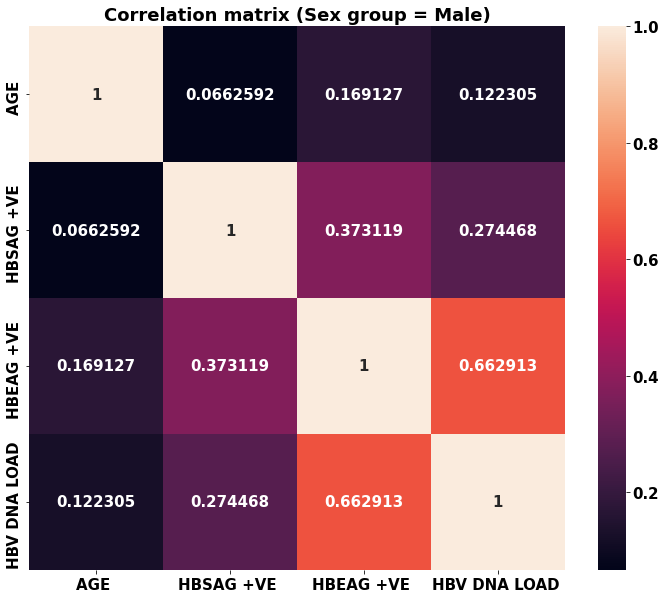

<Figure size 432x288 with 0 Axes>

In [100]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))


df_m_corr = df_m[['AGE ','HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD ']].corr()
sns.heatmap(df_m_corr, annot=True, fmt='g')
plt.title('Correlation matrix (Sex group = Male)', fontweight="bold")
plt.show()
plt.savefig('Correlation_matrix_Female_g_1_2.jpeg')

### Visualization

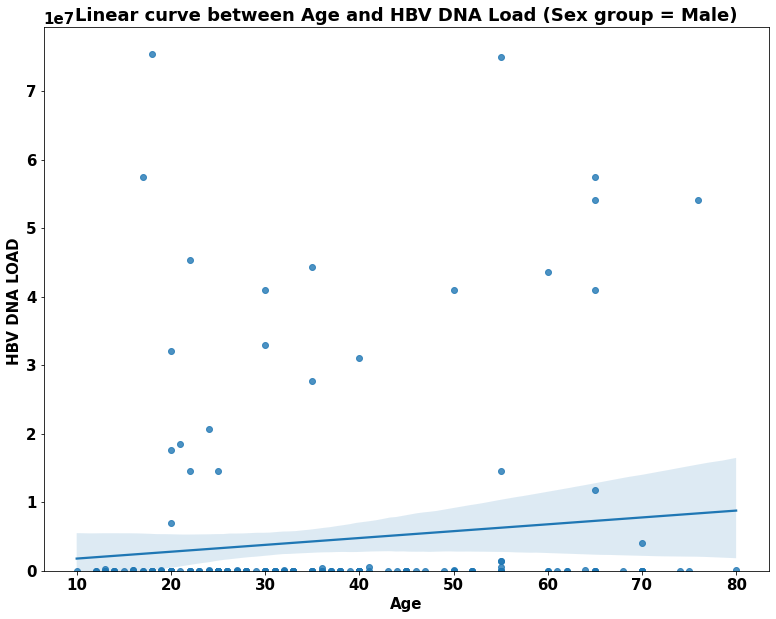

In [101]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(13, 10))


sns.regplot(x='AGE ', y='HBV DNA LOAD ', data=df_m)
plt.title('Linear curve between Age and HBV DNA Load (Sex group = Male)', fontweight="bold")
plt.xlabel('Age')
plt.ylim(0,)
plt.savefig('reg_AGE_HBV_DNA_Load_Male.jpeg')

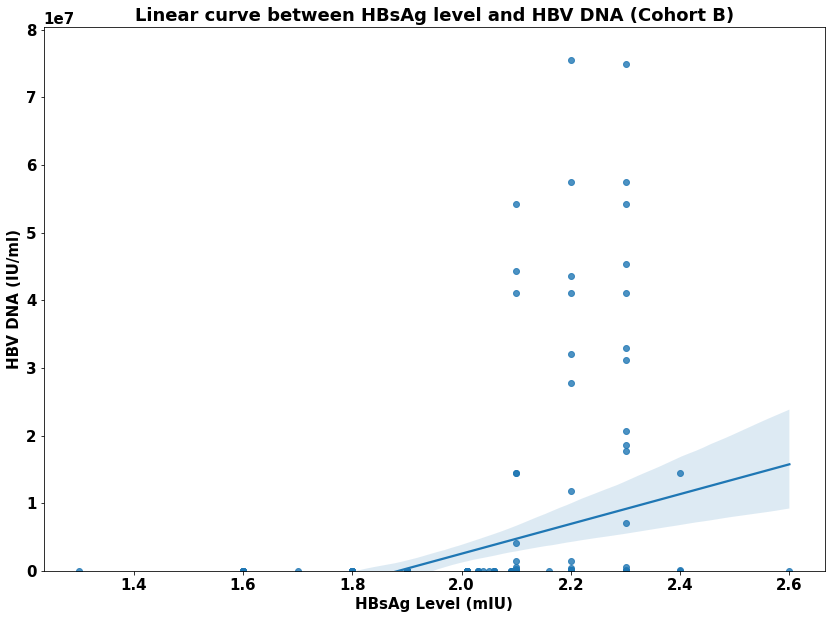

In [331]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(14,10))
sns.regplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_m)
plt.title('Linear curve between HBsAg level and HBV DNA (Cohort B)', fontweight="bold")
plt.xlabel('HBsAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBSAG_HBV_DNA_Load_Male.jpeg')

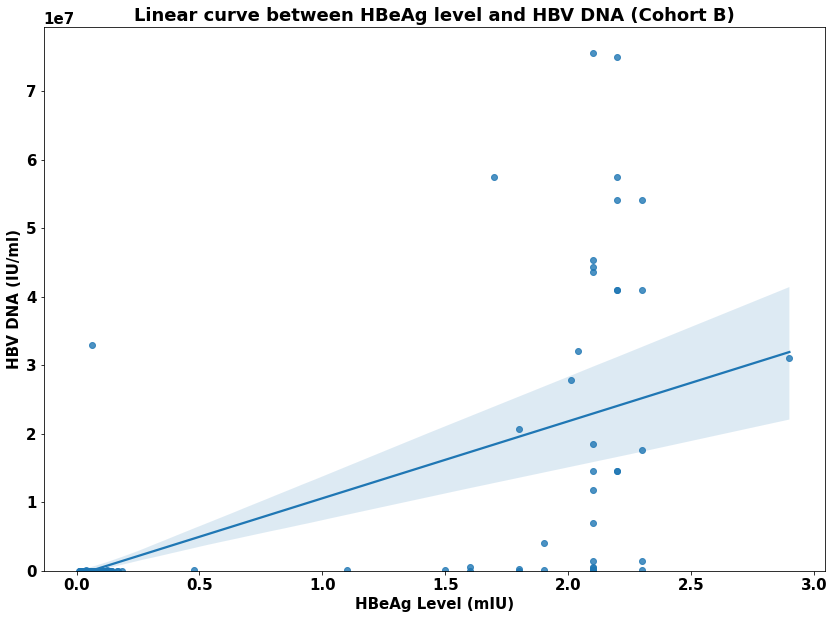

In [332]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(14,10))
sns.regplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_m)
plt.title('Linear curve between HBeAg level and HBV DNA (Cohort B)', fontweight="bold")
plt.xlabel('HBeAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBEAG_HBV_DNA_Load_Male.jpeg')

### Residual Plots

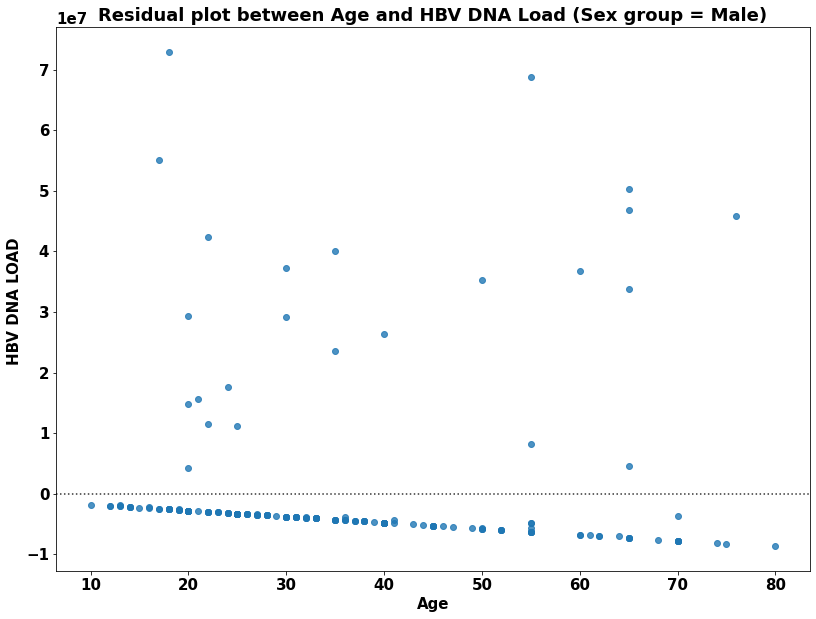

<Figure size 432x288 with 0 Axes>

In [104]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(13.5,10))
sns.residplot(x='AGE ', y='HBV DNA LOAD ', data=df_m)
plt.title('Residual plot between Age and HBV DNA Load (Sex group = Male)', fontweight="bold")
plt.xlabel('Age')
plt.show()
plt.savefig('residual_AGE_HBV_Male.jpeg')

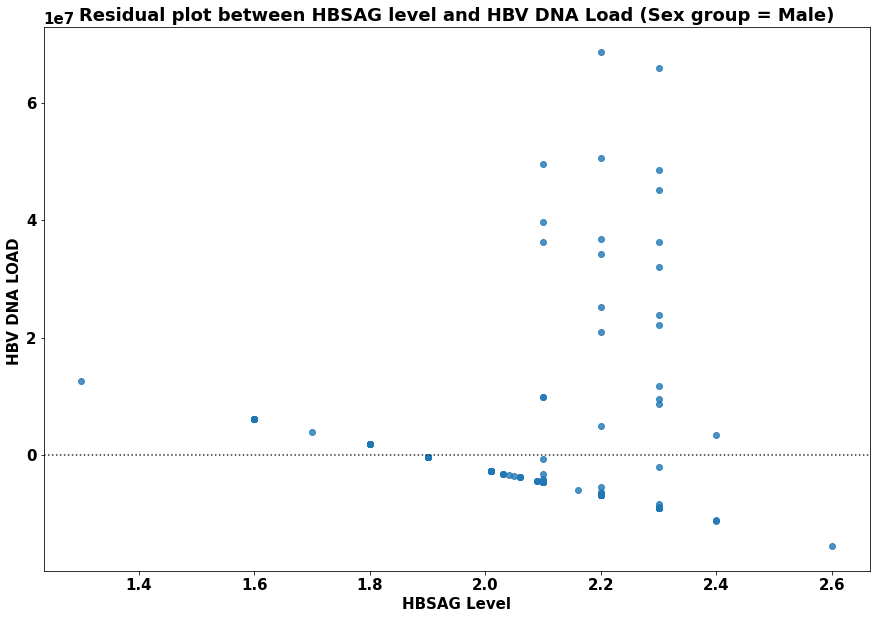

<Figure size 432x288 with 0 Axes>

In [105]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(14.8,10))
sns.residplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_m)
plt.title('Residual plot between HBSAG level and HBV DNA Load (Sex group = Male)', fontweight="bold")
plt.xlabel('HBSAG Level')
plt.show()
plt.savefig('residual_HBSAG_HBV_DNA_Load_Male.jpeg')

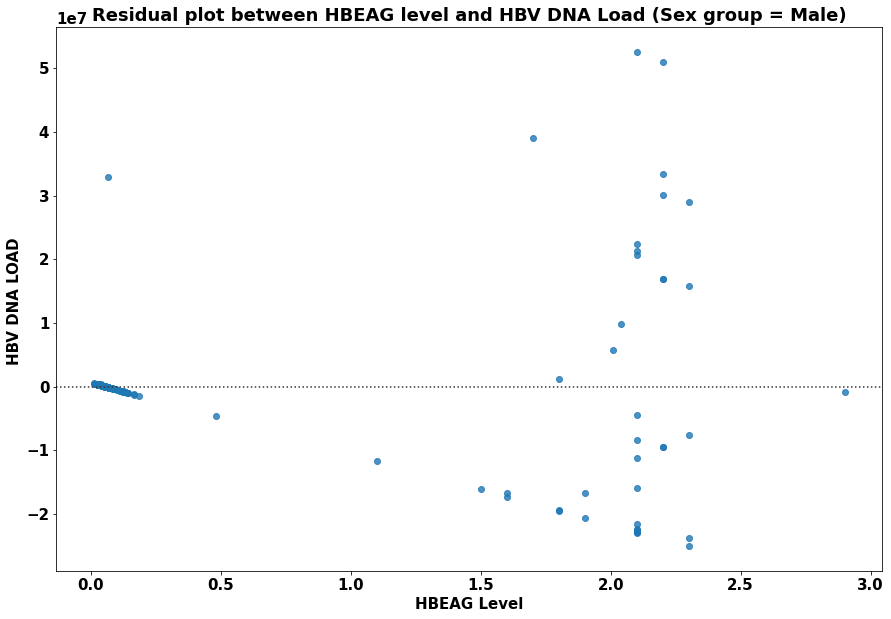

<Figure size 432x288 with 0 Axes>

In [106]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(14.8,10))
sns.residplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_m)
plt.title('Residual plot between HBEAG level and HBV DNA Load (Sex group = Male)', fontweight="bold")
plt.xlabel('HBEAG Level')
plt.show()
plt.savefig('residual_HBEAG_HBV_DNA_Load_Male.jpeg')

### Statistical Data



In [107]:
from scipy.stats import pearsonr
print('Two tailed sign between Age and HBSAG', pearsonr(df_m['AGE '], df_m['HBSAG +VE ']))
print('Two tailed sign between Age and HBEAG', pearsonr(df_m['AGE '], df_m['HBEAG +VE ']))
print('Two tailed sign between Age and HBA DNA load', pearsonr(df_m['AGE '], df_m['HBV DNA LOAD ']))

print('Two tailed sign between HBSAG and Age', pearsonr(df_m['HBSAG +VE '], df_m['AGE ']))
print('Two tailed sign between HBSAG and HBEAG', pearsonr(df_m['HBSAG +VE '], df_m['HBEAG +VE ']))
print('Two tailed sign between HBSAG and HBA DNA load', pearsonr(df_m['HBSAG +VE '], df_m['HBV DNA LOAD ']))

print('Two tailed sign between HBEAG and Age', pearsonr(df_m['HBEAG +VE '], df_m['AGE ']))
print('Two tailed sign between HBEAG and HBSAG', pearsonr(df_m['HBEAG +VE '], df_m['HBSAG +VE ']))
print('Two tailed sign between HBEAG and HBA DNA load', pearsonr(df_m['HBEAG +VE '], df_m['HBV DNA LOAD ']))

print('Two tailed sign between HBV DNA LOAD and Age', pearsonr(df_m['HBV DNA LOAD '], df_m['AGE ']))
print('Two tailed sign between HBV DNA LOAD and HBEAG', pearsonr(df_m['HBV DNA LOAD '], df_m['HBEAG +VE ']))
print('Two tailed sign between HBV DNA LOAD and HBSAG', pearsonr(df_m['HBV DNA LOAD '], df_m['HBSAG +VE ']))

Two tailed sign between Age and HBSAG (0.06625919407486437, 0.3476017919969382)
Two tailed sign between Age and HBEAG (0.1691274817912776, 0.015855769931724786)
Two tailed sign between Age and HBA DNA load (0.12230509480962834, 0.0821490291315401)
Two tailed sign between HBSAG and Age (0.06625919407486437, 0.3476017919969382)
Two tailed sign between HBSAG and HBEAG (0.3731190788147789, 4.191527177352418e-08)
Two tailed sign between HBSAG and HBA DNA load (0.274467728618854, 7.40796893256401e-05)
Two tailed sign between HBEAG and Age (0.1691274817912776, 0.015855769931724786)
Two tailed sign between HBEAG and HBSAG (0.3731190788147789, 4.191527177352418e-08)
Two tailed sign between HBEAG and HBA DNA load (0.6629127404250688, 4.5829333831828404e-27)
Two tailed sign between HBV DNA LOAD and Age (0.12230509480962834, 0.0821490291315401)
Two tailed sign between HBV DNA LOAD and HBEAG (0.6629127404250688, 4.5829333831828404e-27)
Two tailed sign between HBV DNA LOAD and HBSAG (0.2744677286188

#### Sum of squares and cross products



In [108]:
N_m = df_m.shape
print(N_m)
### Sum of Squares of Age in Male patients
sum_age_m = df_m['AGE '].sum()
#print('sum of the age:', sum_age_m)
sq_sum_age_m = sum_age_m**2
#print('square of the sum of age:', sq_sum_age_m)
sq_age_m = df_m['AGE ']**2
sum_sq_age_m = sq_age_m.sum()
#print('sum of sq_age:', sum_sq_age_m)
ss_age_m = sum_sq_age_m-(sq_sum_age_m/139)
print('sum of squares of age:', ss_age_m)
### Sum of Squares of HBSAG among male patients
sum_HBSAG_m = df_m['HBSAG +VE '].sum()
#print('sum of the HBSAG:', sum_HBSAG_m)
sq_sum_HBSAG_m = sum_HBSAG_m**2
#print('square of the sum of HBSAG:', sq_sum_HBSAG_f)
sq_HBSAG_m = df_m['HBSAG +VE ']**2
sum_sq_HBSAG_m = sq_HBSAG_m.sum()
#print('sum of sq_HBSAG:', sum_sq_HBSAG_m)
ss_HBSAG_m = sum_sq_HBSAG_m-(sq_sum_HBSAG_m/139)
print('sum of squares of HBSAG:', ss_HBSAG_m)

### Sum of Squares of HBEAG among the male patients 
sum_HBEAG_m = df_m['HBEAG +VE '].sum()
#print('sum of the HBEAG:', sum_HBEAG_m)
sq_sum_HBEAG_m = sum_HBEAG_m**2
#print('square of the sum of HBEAG:', sq_sum_HBEAG_m)
sq_HBEAG_m = df_m['HBEAG +VE ']**2
sum_sq_HBEAG_m = sq_HBEAG_m.sum()
#print('sum of sq_HBEAG:', sum_sq_HBEAG_m)
ss_HBEAG_m = sum_sq_HBEAG_m-(sq_sum_HBEAG_m/139)
print('sum of squares of HBEAG:', ss_HBEAG_m)

### Sum of squares of HBV DNA Load among male patients
sum_HBA_m = df_m['HBV DNA LOAD '].sum()
#print('sum of the HBA:', sum_HBA_m)
sq_sum_HBA_m = sum_HBA_m**2
#print('square of the sum of HBA:', sq_sum_HBA_m)
sq_HBA_m = df_m['HBV DNA LOAD ']**2
sum_sq_HBA_m = sq_HBA_m.sum()
#print('sum of sq_HBA:', sum_sq_HBA_m)
ss_HBA_m = sum_sq_HBA_m-(sq_sum_HBA_m/139)
print('sum of squares of HBA:', ss_HBA_m)

(203, 4)
sum of squares of age: -64049.870503597136
sum of squares of HBSAG: -400.30236546762626
sum of squares of HBEAG: 109.19709569784172
sum of squares of HBA: 3.496001411002814e+16


### Cross Products



In [109]:
df_m = df_m.drop(df_m.index[32])

In [110]:
df_m.shape

(202, 4)

In [111]:
df_m_age_np1 = np.array(df_m['AGE '])
df_m_age_np = df_m_age_np1.reshape(101,2)
df_m_hbsag_np1 = np.array(df_m['HBSAG +VE '])
df_m_hbsag_np = df_m_hbsag_np1.reshape(101,2)
df_m_hbeag_np1 = np.array(df_m['HBEAG +VE '])
df_m_hbeag_np = df_m_hbeag_np1.reshape(101,2)
df_m_hba_np1 = np.array(df_m['HBV DNA LOAD '])
df_m_hba_np = df_m_hba_np1.reshape(101,2)

In [112]:
cross_prod_age_hbsag = np.cross(df_m_age_np, df_m_hbsag_np)
print('cross product between AGE and HBSAG:', cross_prod_age_hbsag.sum()**2)
cross_prod_age_hbeag = np.cross(df_m_age_np, df_m_hbeag_np)
print('cross product between AGE and HBEAG:', cross_prod_age_hbeag.sum()**2)
cross_prod_age_hba = np.cross(df_m_age_np, df_m_hba_np)
print('cross product between AGE and HBV DNA Load:', cross_prod_age_hba.sum()**2)
cross_prod_hbsag_hbeag = np.cross(df_m_hbeag_np, df_m_hbsag_np)
print('cross product between HBSAG and HBEAG:', cross_prod_hbsag_hbeag.sum()**2)
cross_prod_hbsag_hba = np.cross(df_m_hbsag_np, df_m_hba_np)
print('cross product between HBSAG and HBV DNA LOAD:', cross_prod_hbsag_hba.sum()**2)
cross_prod_hbeag_hba = np.cross(df_m_hbeag_np, df_m_hba_np)
print('cross product between HBEAG and HBA:', cross_prod_hbeag_hba.sum()**2)



cross product between AGE and HBSAG: 4673.089599999973
cross product between AGE and HBEAG: 55713.93744399999
cross product between AGE and HBV DNA Load: 6.218883873241362e+18
cross product between HBSAG and HBEAG: 0.017022420899999155
cross product between HBSAG and HBV DNA LOAD: 2.951098866522973e+16
cross product between HBEAG and HBA: 4.107599140400399e+16


### Covariance matrix



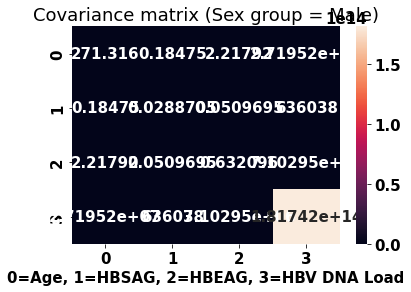

<Figure size 432x288 with 0 Axes>

In [113]:
df_m_np = np.array([df_m_age_np1, df_m_hbsag_np1, df_m_hbeag_np1, df_m_hba_np1])
df_m_np.shape

df_m_cov = np.cov(df_m_np, bias = True)
plt.title('Covariance matrix (Sex group = Male)')
sns.heatmap(df_m_cov, annot=True, fmt='g')
plt.xlabel('0=Age, 1=HBSAG, 2=HBEAG, 3=HBV DNA Load')
plt.show()
plt.savefig('covariance_matrix_male.jpeg')

## Age based analysis (Group1_age_15-25)

In [114]:
data_10_25 = pd.read_excel('Data.xlsx', sheet_name=6)
data_10_25.head()

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,10,F,2.10,0.093,211.0
1,10,M,1.90,0.094,3.8
2,10,M,2.03,2.200,192423450.0
3,12,M,1.30,0.129,150.0
4,12,M,2.30,1.600,11680.0


In [115]:
data_10_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            128 non-null    int64  
 1   SEX            128 non-null    object 
 2   HBSAG +VE      128 non-null    float64
 3   HBEAG +VE      128 non-null    float64
 4   HBV DNA LOAD   128 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.1+ KB


In [116]:
data_10_25.columns

Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')

In [117]:
db_age1 = data_10_25.replace("M", "Male")
db_age1 = db_age1.replace("M ", "Male")
db_age1 = db_age1.replace("F", "Female")
db_age1 = db_age1.replace("F ", "Female")

### Encoding Gender

In [118]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
db_age1.loc[:,'SEX '] = le.transform(db_age1['SEX '])
db_age1

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,10,0,2.10,0.093,211.0
1,10,1,1.90,0.094,3.8
2,10,1,2.03,2.200,192423450.0
3,12,1,1.30,0.129,150.0
4,12,1,2.30,1.600,11680.0
...,...,...,...,...,...
123,25,1,2.01,0.052,40.0
124,25,1,2.01,0.053,3.8
125,25,1,2.06,0.083,3.8
126,25,1,2.10,0.048,204.0


In [119]:
z = np.abs(stats.zscore(db_age1))

In [120]:
db_age1_clean = db_age1[(z<3).all(axis=1)]

In [121]:
db_age1_clean.shape

(125, 5)

### Interquartile range method



In [122]:
Q1 = db_age1.quantile(q=.25)
Q3 = db_age1.quantile(q=.75)
IQR = db_age1.apply(stats.iqr)

db_clean_iq_age1 = db_age1[~((db_age1 < (Q1-1.5*IQR)) | (db_age1 > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_age1.shape



(73, 5)

### Copy  the data





In [123]:
df_age1 = db_age1_clean.copy()



### Descriptive Analysis



In [124]:
print(df_age1.describe())
df_age1_table = df_age1.describe()
df_age1_table.to_csv('age_group10-25_describe.csv')

print('columns:', df_age1.columns)

            AGE         SEX   HBSAG +VE   HBEAG +VE   HBV DNA LOAD 
count  125.00000  125.000000   125.00000  125.000000   1.250000e+02
mean    20.84000    0.568000     2.06416    0.403568   5.853615e+06
std      3.81085    0.497348     0.16553    0.746636   2.596035e+07
min     10.00000    0.000000     1.60000    0.014000   3.800000e+00
25%     18.00000    0.000000     2.03000    0.041000   3.800000e+00
50%     22.00000    1.000000     2.10000    0.066000   1.390000e+02
75%     24.00000    1.000000     2.10000    0.125000   2.463000e+03
max     25.00000    1.000000     2.40000    2.300000   1.924234e+08
columns: Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')


### Exploratory Analysis

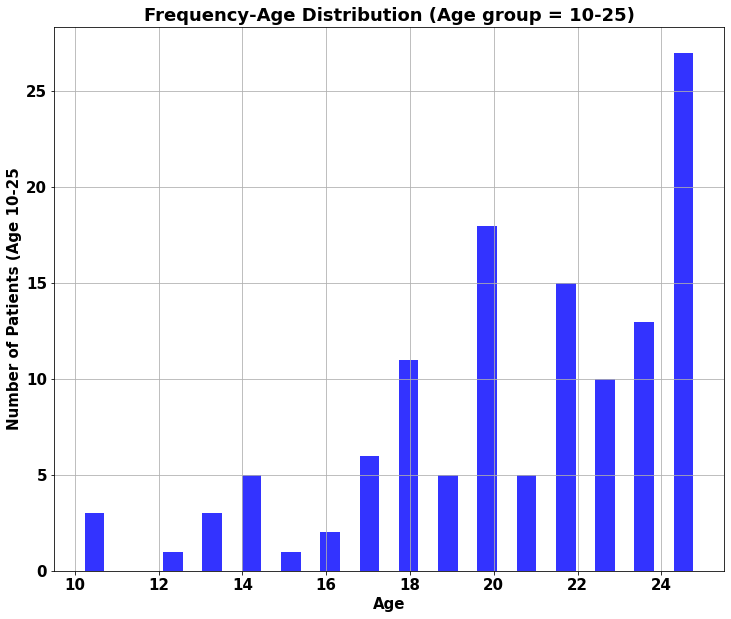

In [125]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_age1['AGE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients (Age 10-25')
plt.title('Frequency-Age Distribution (Age group = 10-25)', fontweight='bold')
plt.grid(True)
plt.savefig('Age_distribution_age10-25.jpeg')
plt.show()

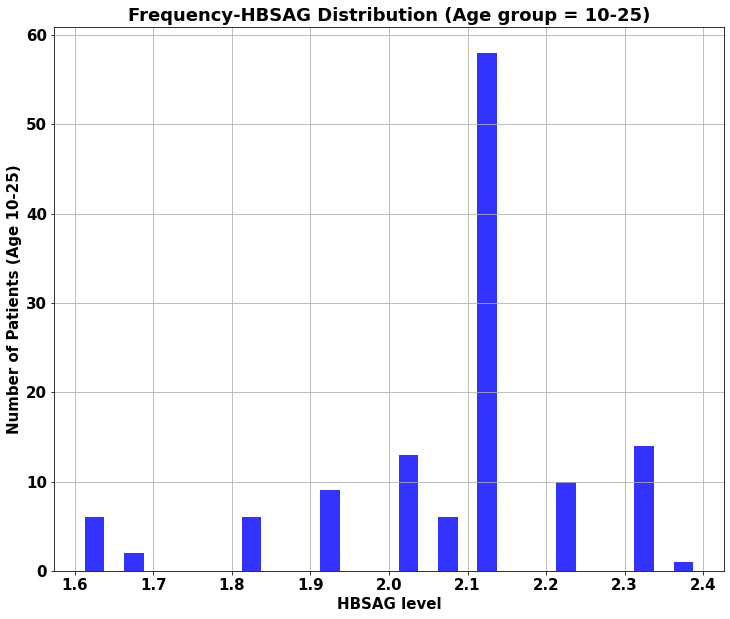

In [126]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_age1['HBSAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBSAG level')
plt.ylabel('Number of Patients (Age 10-25)')
plt.title('Frequency-HBSAG Distribution (Age group = 10-25)', fontweight='bold')
plt.grid(True)
plt.savefig('HBSAG_distribution_age10-25.jpeg')
plt.show()

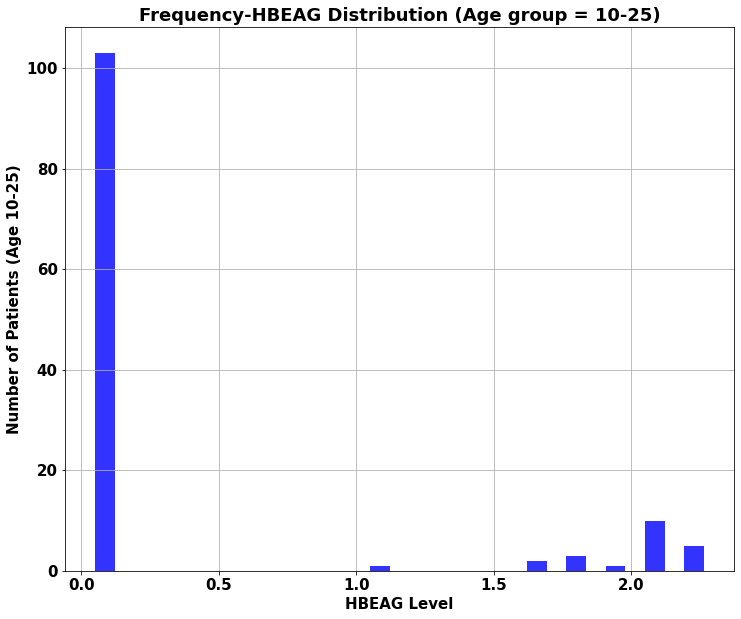

In [127]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_age1['HBEAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBEAG Level')
plt.ylabel('Number of Patients (Age 10-25)')
plt.title('Frequency-HBEAG Distribution (Age group = 10-25)', fontweight='bold')
plt.grid(True)
plt.savefig('HBEAG_distribution_age10-25.jpeg')
plt.show()

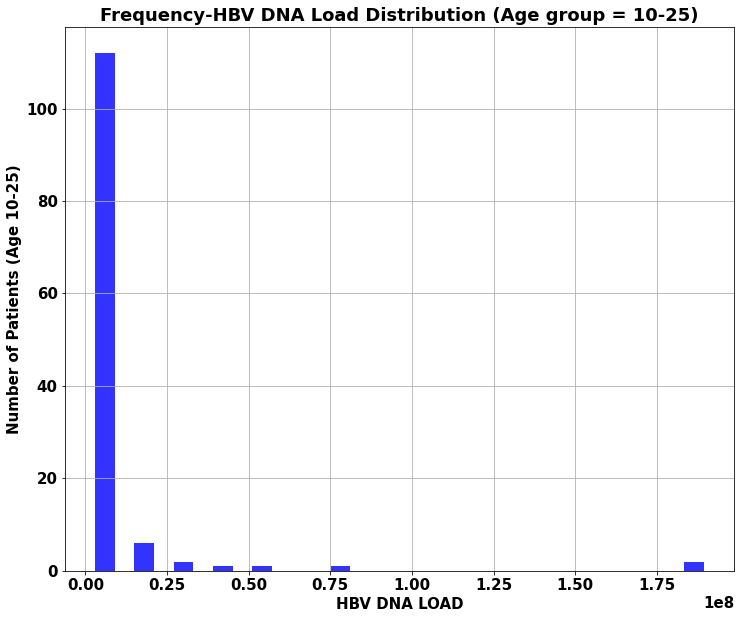

In [128]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_age1['HBV DNA LOAD '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBV DNA LOAD')
plt.ylabel('Number of Patients (Age 10-25)')
plt.title('Frequency-HBV DNA Load Distribution (Age group = 10-25)', fontweight='bold')
plt.grid(True)
plt.savefig('HBV_DNA_LOAD_distribution_age10-25.jpeg')
plt.show()

### Multiple regression (Group 1_Age 10-25)



In [129]:

mr_age1 = LinearRegression()
x_age1 = df_age1[['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ']]
y_age1 = df_age1['HBV DNA LOAD ']
mr_age1.fit(x_age1,y_age1)

print('intercept:', mr_age1.intercept_)

print('Coefficient:', mr_age1.coef_)




intercept: 19040702.316512212
Coefficient: [-1092489.65451075 -2752438.61412431  2030269.73275196 17228770.48714735]


### Correlation Matrix



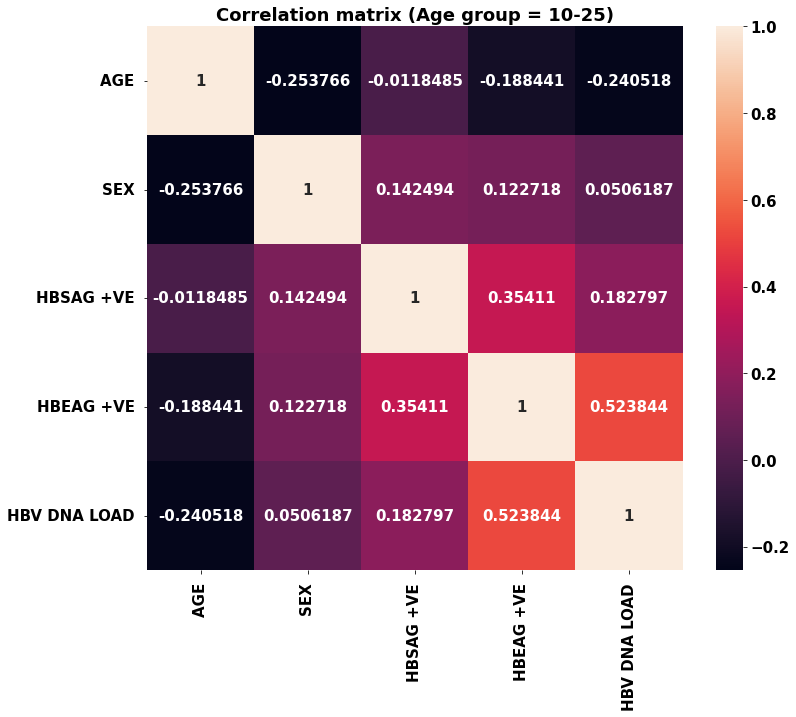

<Figure size 432x288 with 0 Axes>

In [130]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))


df_age1_corr = df_age1[['AGE ', "SEX ", 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD ']].corr()
sns.heatmap(df_age1_corr, annot=True, fmt='g')
plt.title('Correlation matrix (Age group = 10-25)', fontweight='bold')
plt.show()
plt.savefig('Correlation_matrix_age_10-25_g1.jpeg')

### Visualization



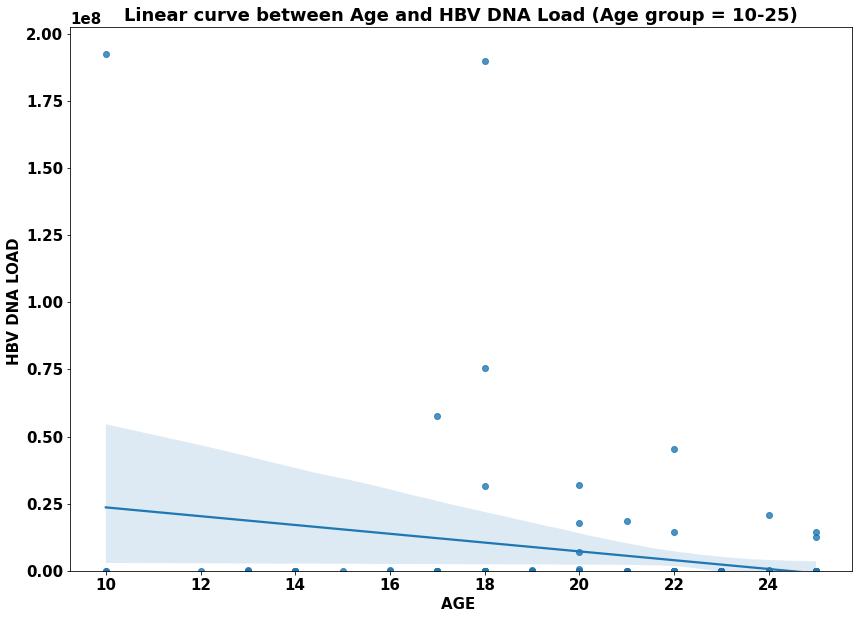

In [131]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(14, 10))


sns.regplot(x='AGE ', y='HBV DNA LOAD ', data=df_age1)
plt.title('Linear curve between Age and HBV DNA Load (Age group = 10-25)', fontweight='bold')

plt.ylim(0,)
plt.savefig('reg_AGE_HBV_DNA_Load_age10-25.jpeg')

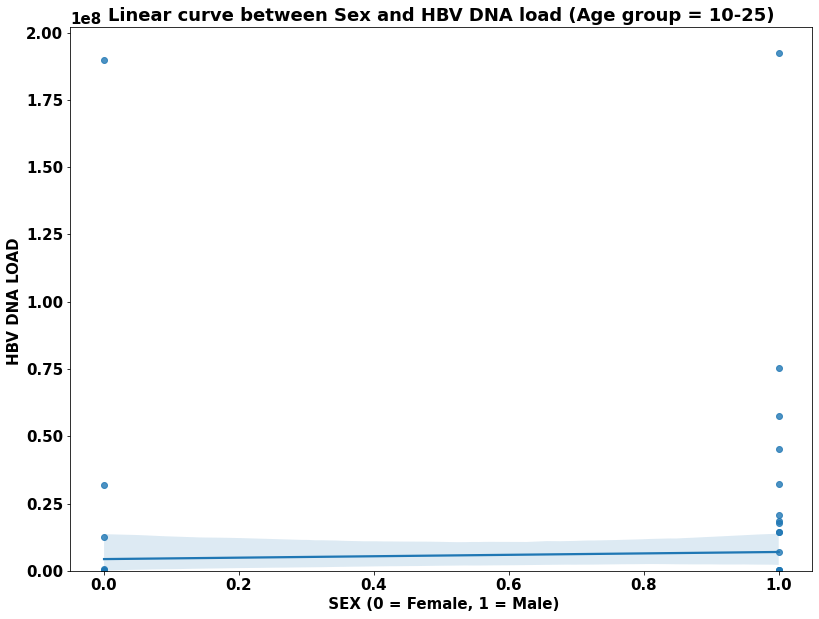

In [132]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(13.3, 10))

sns.regplot(x='SEX ', y='HBV DNA LOAD ', data=df_age1)
plt.title('Linear curve between Sex and HBV DNA load (Age group = 10-25)', fontweight='bold')

plt.xlabel(' SEX (0 = Female, 1 = Male)')
plt.ylim(0,)
plt.savefig('reg_Sex_HBV_DNA_Load_age10-25.jpeg')

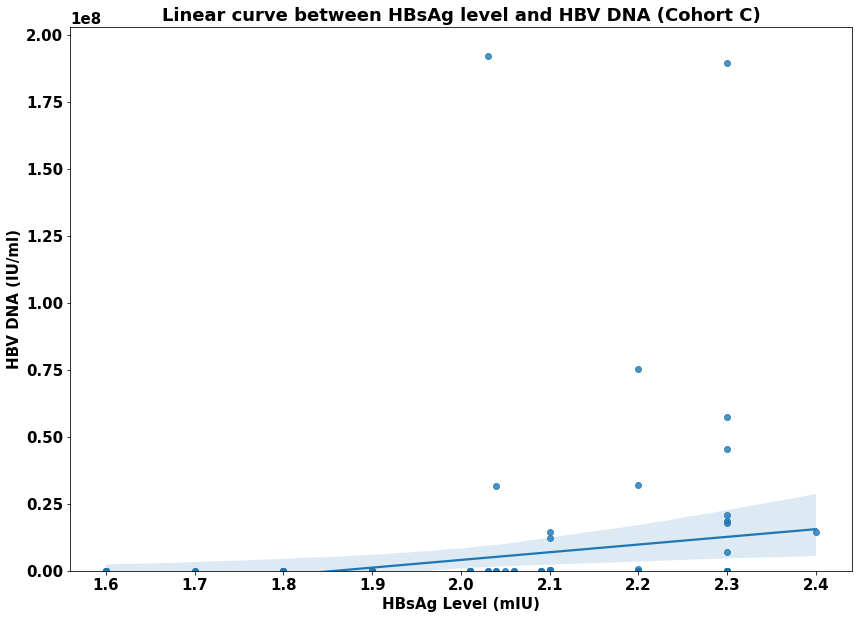

In [333]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14,10))
sns.regplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_age1)
plt.title('Linear curve between HBsAg level and HBV DNA (Cohort C)', fontweight='bold')
plt.xlabel('HBsAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBSAG_HBV_DNA_Load_age10-25.jpeg')

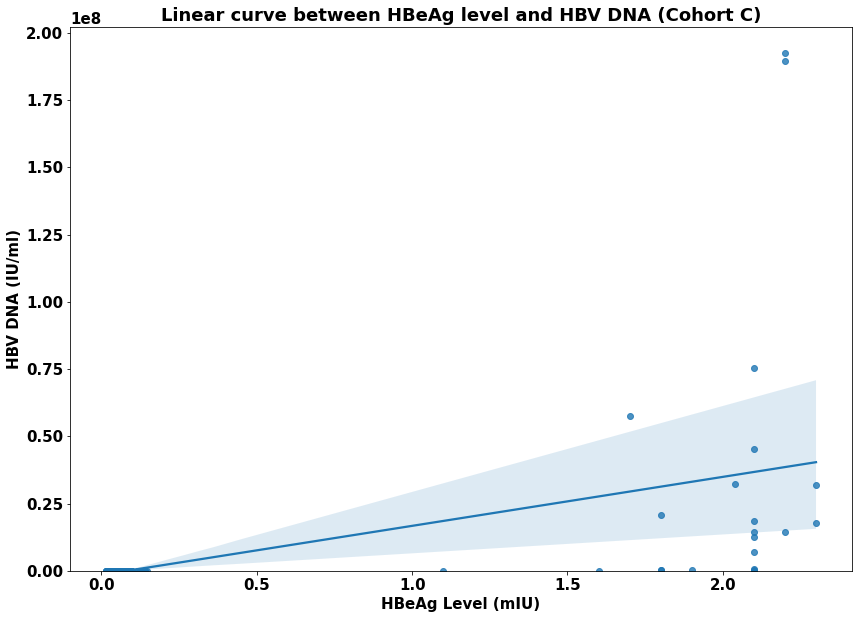

In [334]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14,10))
sns.regplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_age1)
plt.title('Linear curve between HBeAg level and HBV DNA (Cohort C)', fontweight='bold')
plt.xlabel('HBeAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBEAG_HBV_DNA_Load_age10-25.jpeg')

### Residual Plots



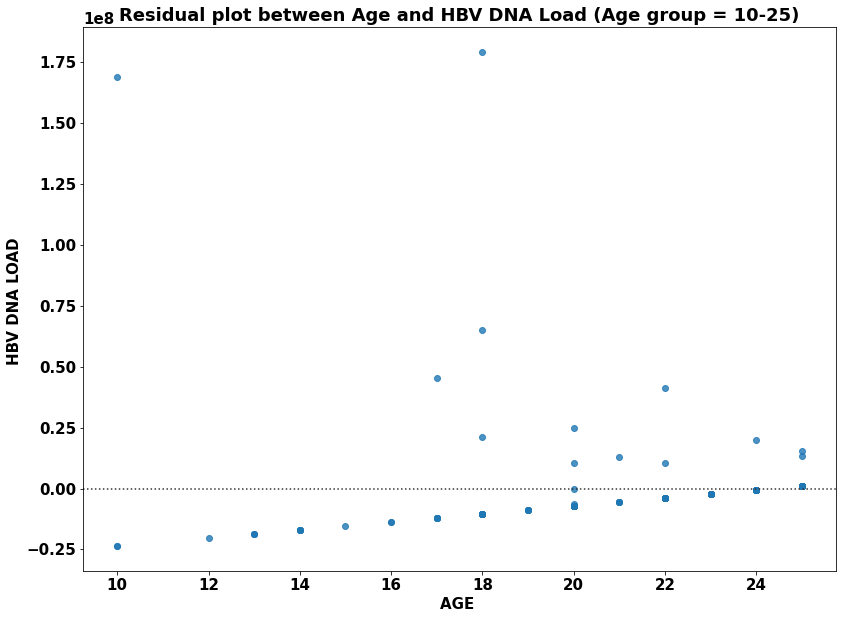

<Figure size 432x288 with 0 Axes>

In [135]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(13.5,10))
sns.residplot(x='AGE ', y='HBV DNA LOAD ', data=df_age1)
plt.title('Residual plot between Age and HBV DNA Load (Age group = 10-25)', fontweight='bold')

plt.show()
plt.savefig('residual_AGE_HBV_age10-25.jpeg')

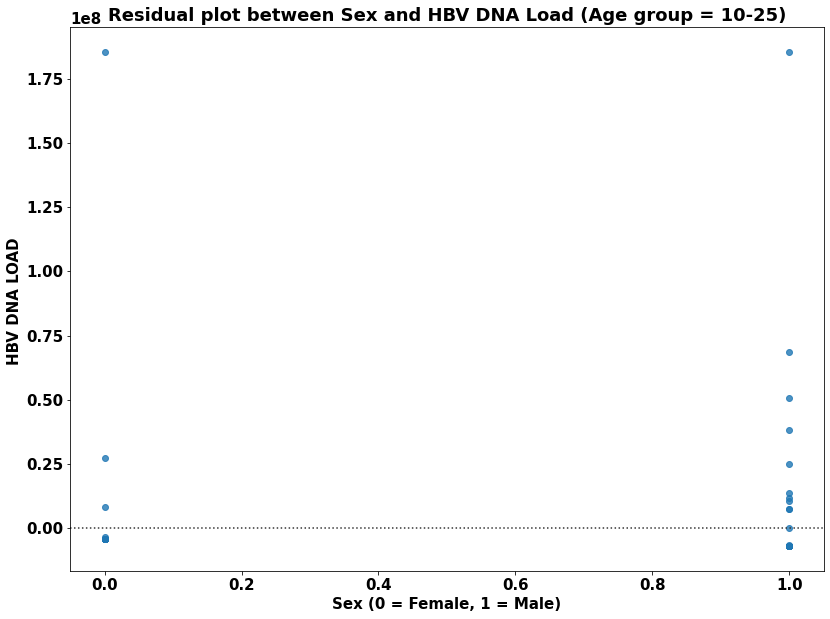

<Figure size 432x288 with 0 Axes>

In [136]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(13.5,10))
sns.residplot(x='SEX ', y='HBV DNA LOAD ', data=df_age1)
plt.title('Residual plot between Sex and HBV DNA Load (Age group = 10-25)', fontweight='bold')

plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.show()
plt.savefig('residual_SEX_HBV_age1.jpeg')

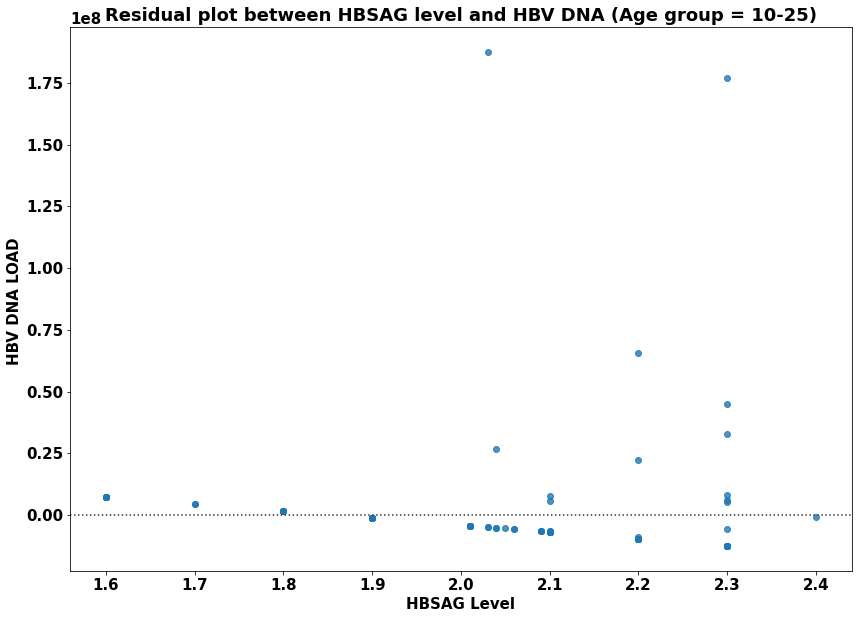

<Figure size 432x288 with 0 Axes>

In [137]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14,10))
sns.residplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_age1)
plt.title('Residual plot between HBSAG level and HBV DNA (Age group = 10-25)', fontweight='bold')
plt.xlabel('HBSAG Level')
plt.show()
plt.savefig('residual_HBSAG_HBV_age10-25.jpeg')

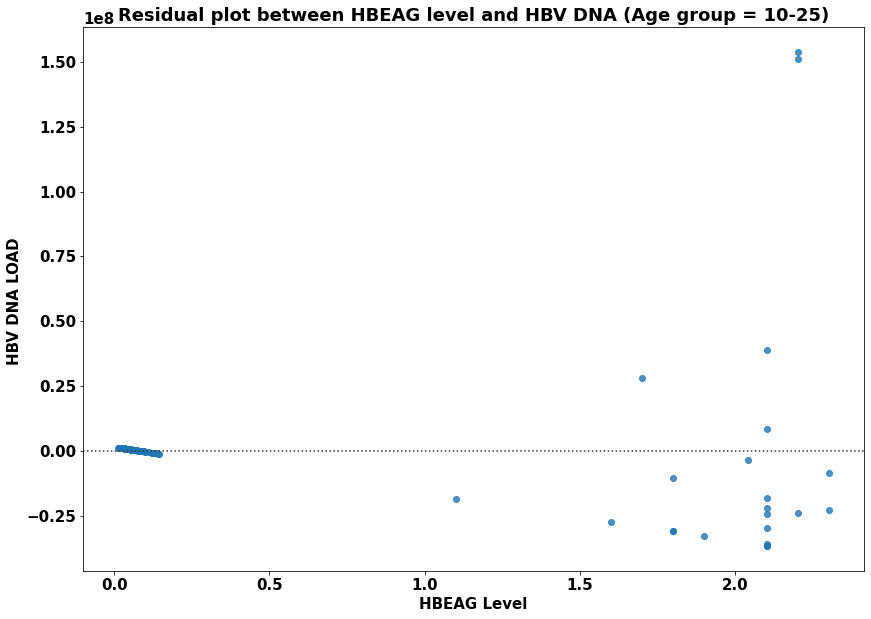

<Figure size 432x288 with 0 Axes>

In [138]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14,10))
sns.residplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_age1)
plt.title('Residual plot between HBEAG level and HBV DNA (Age group = 10-25)', fontweight='bold')
plt.xlabel('HBEAG Level')
plt.show()
plt.savefig('residual_HBEAG_HBV_age10-25.jpeg')

### Statistical Data





In [139]:
from scipy.stats import pearsonr
print('Two tailed sign between Age and HBSAG', pearsonr(df_age1['AGE '], df_age1['HBSAG +VE ']))
print('Two tailed sign between Age and HBEAG', pearsonr(df_age1['AGE '], df_age1['HBEAG +VE ']))
print('Two tailed sign between Age and HBA DNA load', pearsonr(df_age1['AGE '], df_age1['HBV DNA LOAD ']))

print('Two tailed sign between HBSAG and Age', pearsonr(df_age1['HBSAG +VE '], df_age1['AGE ']))
print('Two tailed sign between HBSAG and HBEAG', pearsonr(df_age1['HBSAG +VE '], df_age1['HBEAG +VE ']))
print('Two tailed sign between HBSAG and HBA DNA load', pearsonr(df_age1['HBSAG +VE '], df_age1['HBV DNA LOAD ']))

print('Two tailed sign between HBEAG and Age', pearsonr(df_age1['HBEAG +VE '], df_age1['AGE ']))
print('Two tailed sign between HBEAG and HBSAG', pearsonr(df_age1['HBEAG +VE '], df_age1['HBSAG +VE ']))
print('Two tailed sign between HBEAG and HBA DNA load', pearsonr(df_age1['HBEAG +VE '], df_age1['HBV DNA LOAD ']))

print('Two tailed sign between HBV DNA LOAD and Age', pearsonr(df_age1['HBV DNA LOAD '], df_age1['AGE ']))
print('Two tailed sign between HBV DNA LOAD and HBEAG', pearsonr(df_age1['HBV DNA LOAD '], df_age1['HBEAG +VE ']))
print('Two tailed sign between HBV DNA LOAD and HBSAG', pearsonr(df_age1['HBV DNA LOAD '], df_age1['HBSAG +VE ']))



Two tailed sign between Age and HBSAG (-0.01184853915823042, 0.8956610390429448)
Two tailed sign between Age and HBEAG (-0.188441085403039, 0.035329392883378795)
Two tailed sign between Age and HBA DNA load (-0.24051849438640044, 0.0068955821437494584)
Two tailed sign between HBSAG and Age (-0.01184853915823042, 0.8956610390429448)
Two tailed sign between HBSAG and HBEAG (0.35411033070557085, 5.091669808262907e-05)
Two tailed sign between HBSAG and HBA DNA load (0.182797079399139, 0.04130778450842874)
Two tailed sign between HBEAG and Age (-0.188441085403039, 0.035329392883378795)
Two tailed sign between HBEAG and HBSAG (0.35411033070557085, 5.091669808262907e-05)
Two tailed sign between HBEAG and HBA DNA load (0.5238437557811575, 3.6356418461863827e-10)
Two tailed sign between HBV DNA LOAD and Age (-0.24051849438640044, 0.0068955821437494584)
Two tailed sign between HBV DNA LOAD and HBEAG (0.5238437557811575, 3.6356418461863827e-10)
Two tailed sign between HBV DNA LOAD and HBSAG (0.18

#### Sum of squares and cross products





In [140]:
N_m = df_age1.shape
print(N_m)
### Sum of Squares of Age in Male patients
sum_age_age1 = df_age1['AGE '].sum()
#print('sum of the age:', sum_age_m)
sq_sum_age_age1 = sum_age_age1**2
#print('square of the sum of age:', sq_sum_age_m)
sq_age_age1 = df_age1['AGE ']**2
sum_sq_age_age1 = sq_age_age1.sum()
#print('sum of sq_age:', sum_sq_age_m)
ss_age_age1 = sum_sq_age_age1-(sq_sum_age_age1/139)
print('sum of squares of age:', ss_age_age1)
### Sum of Squares of HBSAG among male patients
sum_HBSAG_age1 = df_age1['HBSAG +VE '].sum()
#print('sum of the HBSAG:', sum_HBSAG_m)
sq_sum_HBSAG_age1 = sum_HBSAG_age1**2
#print('square of the sum of HBSAG:', sq_sum_HBSAG_f)
sq_HBSAG_age1 = df_age1['HBSAG +VE ']**2
sum_sq_HBSAG_age1 = sq_HBSAG_age1.sum()
#print('sum of sq_HBSAG:', sum_sq_HBSAG_m)
ss_HBSAG_age1 = sum_sq_HBSAG_age1-(sq_sum_HBSAG_age1/139)
print('sum of squares of HBSAG:', ss_HBSAG_age1)

### Sum of Squares of HBEAG among the male patients 
sum_HBEAG_age1 = df_age1['HBEAG +VE '].sum()
#print('sum of the HBEAG:', sum_HBEAG_m)
sq_sum_HBEAG_age1 = sum_HBEAG_age1**2
#print('square of the sum of HBEAG:', sq_sum_HBEAG_m)
sq_HBEAG_age1 = df_age1['HBEAG +VE ']**2
sum_sq_HBEAG_age1 = sq_HBEAG_age1.sum()
#print('sum of sq_HBEAG:', sum_sq_HBEAG_m)
ss_HBEAG_age1 = sum_sq_HBEAG_age1-(sq_sum_HBEAG_age1/139)
print('sum of squares of HBEAG:', ss_HBEAG_age1)

### Sum of squares of HBV DNA Load among male patients
sum_HBA_age1 = df_age1['HBV DNA LOAD '].sum()
#print('sum of the HBA:', sum_HBA_m)
sq_sum_HBA_age1 = sum_HBA_age1**2
#print('square of the sum of HBA:', sq_sum_HBA_m)
sq_HBA_age1 = df_age1['HBV DNA LOAD ']**2
sum_sq_HBA_age1 = sq_HBA_age1.sum()
#print('sum of sq_HBA:', sum_sq_HBA_m)
ss_HBA_age1 = sum_sq_HBA_age1-(sq_sum_HBA_age1/139)
print('sum of squares of HBA:', ss_HBA_age1)

(125, 5)
sum of squares of age: 7268.676258992804
sum of squares of HBSAG: 57.040254676258826
sum of squares of HBEAG: 71.1761041294964
sum of squares of HBA: 8.399992123058778e+16


### Cross Products





In [141]:
df_age1 = df_age1.drop(df_age1.index[32])

df_age1.shape


(124, 5)

In [142]:
df_age1_age_np1 = np.array(df_age1['AGE '])
df_age1_age_np = df_age1_age_np1.reshape(62,2)
df_age1_hbsag_np1 = np.array(df_age1['HBSAG +VE '])
df_age1_hbsag_np = df_age1_hbsag_np1.reshape(62,2)
df_age1_hbeag_np1 = np.array(df_age1['HBEAG +VE '])
df_age1_hbeag_np = df_age1_hbeag_np1.reshape(62,2)
df_age1_hba_np1 = np.array(df_age1['HBV DNA LOAD '])
df_age1_hba_np = df_age1_hba_np1.reshape(62,2)


In [143]:
cross_prod_age_hbsag = np.cross(df_age1_age_np, df_age1_hbsag_np)
print('cross product between AGE and HBSAG:', cross_prod_age_hbsag.sum()**2)
cross_prod_age_hbeag = np.cross(df_age1_age_np, df_age1_hbeag_np)
print('cross product between AGE and HBEAG:', cross_prod_age_hbeag.sum()**2)
cross_prod_age_hba = np.cross(df_age1_age_np, df_age1_hba_np)
print('cross product between AGE and HBV DNA Load:', cross_prod_age_hba.sum()**2)
cross_prod_hbsag_hbeag = np.cross(df_age1_hbeag_np, df_age1_hbsag_np)
print('cross product between HBSAG and HBEAG:', cross_prod_hbsag_hbeag.sum()**2)
cross_prod_hbsag_hba = np.cross(df_age1_hbsag_np, df_age1_hba_np)
print('cross product between HBSAG and HBV DNA LOAD:', cross_prod_hbsag_hba.sum()**2)
cross_prod_hbeag_hba = np.cross(df_age1_hbeag_np, df_age1_hba_np)
print('cross product between HBEAG and HBA:', cross_prod_hbeag_hba.sum()**2)


cross product between AGE and HBSAG: 3108.062499999996
cross product between AGE and HBEAG: 3563.4930249999984
cross product between AGE and HBV DNA Load: 3.044247408637107e+19
cross product between HBSAG and HBEAG: 2.3784116841000023
cross product between HBSAG and HBV DNA LOAD: 5.23638468339192e+17
cross product between HBEAG and HBA: 1.0957658650078669e+17


### Covariance matrix





In [144]:
df_age1_np = np.array([df_age1_age_np1, df_age1_hbsag_np1, df_age1_hbeag_np1, df_age1_hba_np1])
df_age1_np.shape

(4, 124)

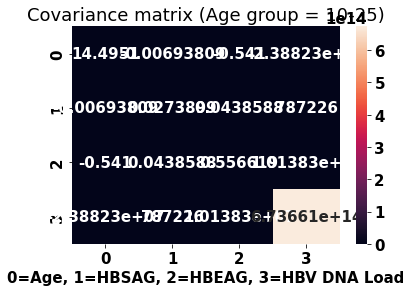

<Figure size 432x288 with 0 Axes>

In [145]:
df_age1_cov = np.cov(df_age1_np, bias = True)
sns.heatmap(df_age1_cov, annot=True, fmt='g')
plt.title('Covariance matrix (Age group = 10-25)')
plt.xlabel('0=Age, 1=HBSAG, 2=HBEAG, 3=HBV DNA Load')
plt.show()
plt.savefig('covariance_matrix_age10-25.jpeg')

## Age based analysis (Group1_age_25-50)



In [146]:
data_25_50 = pd.read_excel('Data.xlsx', sheet_name=7)
data_25_50.head()

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,26,F,2.06,0.114,105.0
1,26,F,2.09,0.026,139.0
2,26,F,2.10,0.066,113.0
3,26,F,2.10,0.134,329.0
4,26,F,2.20,2.200,16987200.0


In [147]:
data_25_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            163 non-null    int64  
 1   SEX            163 non-null    object 
 2   HBSAG +VE      163 non-null    float64
 3   HBEAG +VE      163 non-null    float64
 4   HBV DNA LOAD   163 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.5+ KB


In [148]:
data_25_50.columns

Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')

In [149]:
db_age2 = data_25_50.replace("M", "Male")
db_age2 = db_age2.replace("M ", "Male")
db_age2 = db_age2.replace("F", "Female")
db_age2 = db_age2.replace("F ", "Female")

### Encoding Gender

In [150]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
db_age2.loc[:,'SEX '] = le.transform(db_age2['SEX '])
db_age2

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,26,0,2.06,0.114,105.0
1,26,0,2.09,0.026,139.0
2,26,0,2.10,0.066,113.0
3,26,0,2.10,0.134,329.0
4,26,0,2.20,2.200,16987200.0
...,...,...,...,...,...
158,50,1,2.10,0.033,139.0
159,50,1,2.10,0.013,3.8
160,50,1,2.10,0.064,112.0
161,50,1,2.30,2.300,181800.0


In [151]:
z = np.abs(stats.zscore(db_age2))

In [152]:
db_age2_clean = db_age2[(z<3).all(axis=1)]

In [153]:
db_age2_clean.shape

(149, 5)

### Interquartile range method

In [154]:
Q1 = db_age2.quantile(q=.25)
Q3 = db_age2.quantile(q=.75)
IQR = db_age2.apply(stats.iqr)

db_clean_iq_age2 = db_age2[~((db_age2 < (Q1-1.5*IQR)) | (db_age2 > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_age2.shape


(106, 5)

### Copy  the data

In [155]:
df_age2 = db_age2_clean.copy()

In [156]:
df_age2.head

<bound method NDFrame.head of      AGE   SEX   HBSAG +VE   HBEAG +VE   HBV DNA LOAD 
0      26     0        2.06       0.114          105.0
1      26     0        2.09       0.026          139.0
2      26     0        2.10       0.066          113.0
3      26     0        2.10       0.134          329.0
5      26     1        2.10       0.031          129.0
..    ...   ...         ...         ...            ...
154    50     0        2.10       0.128          250.0
155    50     0        2.03       0.111          600.0
158    50     1        2.10       0.033          139.0
159    50     1        2.10       0.013            3.8
160    50     1        2.10       0.064          112.0

[149 rows x 5 columns]>

In [157]:
df_age2.drop(labels=[154],axis=0, inplace=True)

### Descriptive Analysis


In [158]:
df_age2_table = df_age2.describe()
df_age2_table.to_csv('Age_26-50_table_describe.csv')
print(df_age2_table)

             AGE         SEX   HBSAG +VE   HBEAG +VE   HBV DNA LOAD 
count  148.000000  148.000000  148.000000  148.000000   1.480000e+02
mean    34.986486    0.574324    2.052568    0.097128   2.287864e+05
std      6.533000    0.496124    0.180634    0.236826   2.706649e+06
min     26.000000    0.000000    1.200000    0.012000   3.800000e+00
25%     30.000000    0.000000    2.010000    0.033000   3.800000e+00
50%     33.500000    1.000000    2.100000    0.058000   1.165000e+02
75%     40.000000    1.000000    2.100000    0.082500   3.150000e+02
max     50.000000    1.000000    2.600000    1.800000   3.292843e+07


### Exploratory Analysis



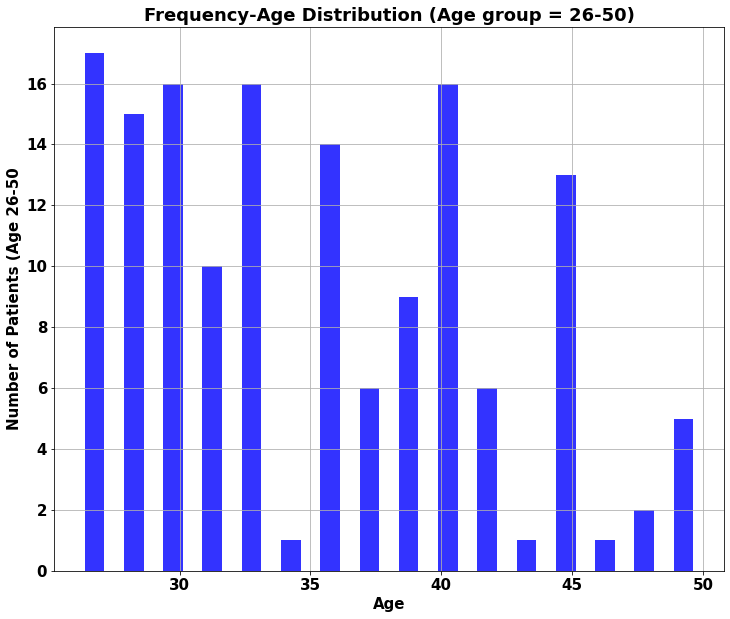

In [159]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_age2['AGE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients (Age 26-50')
plt.title('Frequency-Age Distribution (Age group = 26-50)', fontweight='bold')
plt.grid(True)
plt.savefig('Age_distribution_age26-50.jpeg')
plt.show()

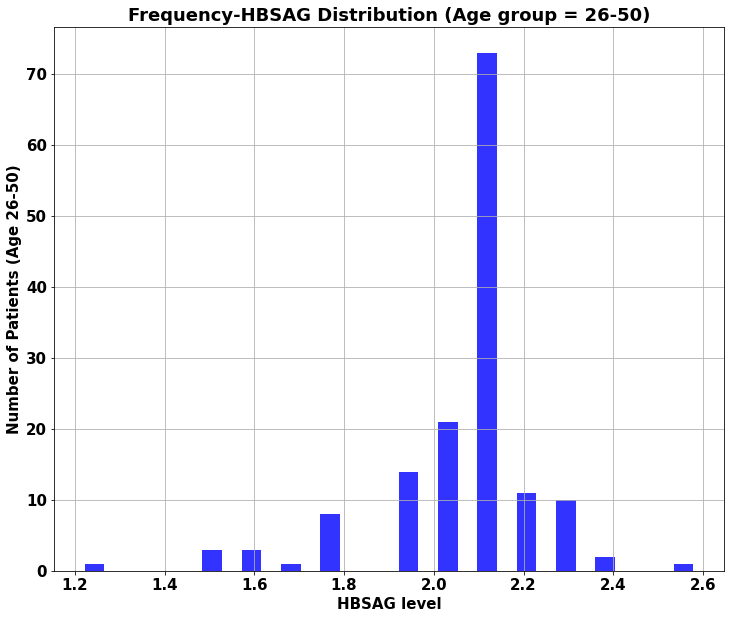

In [160]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_age2['HBSAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBSAG level')
plt.ylabel('Number of Patients (Age 26-50)')
plt.title('Frequency-HBSAG Distribution (Age group = 26-50)', fontweight='bold')
plt.grid(True)
plt.savefig('HBSAG_distribution_Age26-50.jpeg')
plt.show()

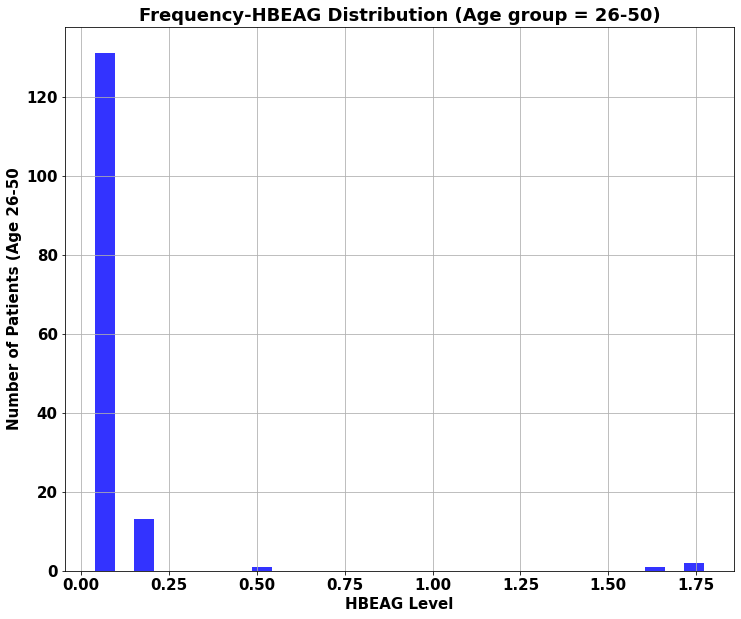

In [161]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_age2['HBEAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBEAG Level')
plt.ylabel('Number of Patients (Age 26-50')
plt.title('Frequency-HBEAG Distribution (Age group = 26-50)', fontweight='bold')
plt.grid(True)
plt.savefig('HBEAG_distribution_Age26-50.jpeg')
plt.show()

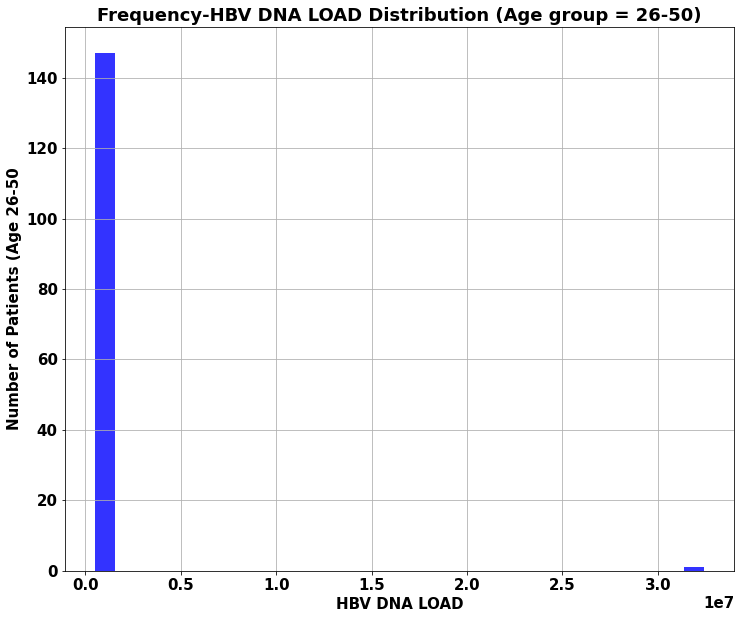

In [162]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_age2['HBV DNA LOAD '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBV DNA LOAD')
plt.ylabel('Number of Patients (Age 26-50')
plt.title('Frequency-HBV DNA LOAD Distribution (Age group = 26-50)', fontweight='bold')
plt.grid(True)
plt.savefig('HBV_DNA_LOAD_distribution_age26-50.jpeg')
plt.show()

### Multiple regression (Group 1_Age 26-50)





In [163]:
mr_age2 = LinearRegression()
x_age2 = df_age2[['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ']]
y_age2 = df_age2['HBV DNA LOAD ']
mr_age2.fit(x_age2,y_age2)

print('intercept:', mr_age2.intercept_)

print('Coefficient:', mr_age2.coef_)


intercept: -2329313.4785296307
Coefficient: [ -25703.74865317  381860.51300914 1579561.62723782  -42057.57075513]


### Correlation Matrix

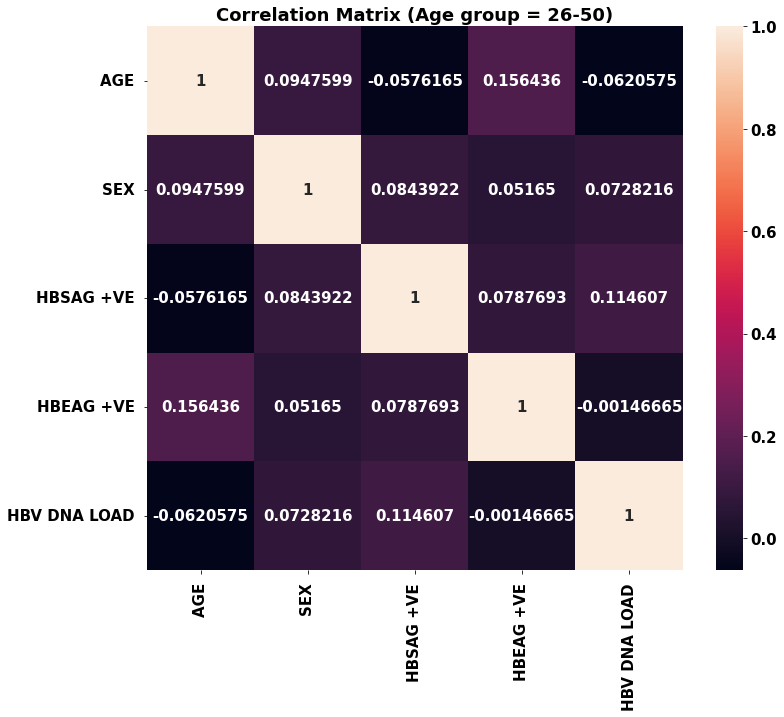

<Figure size 432x288 with 0 Axes>

In [164]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))


df_age2_corr = df_age2[['AGE ', "SEX ", 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD ']].corr()
sns.heatmap(df_age2_corr, annot=True, fmt='g')
plt.title('Correlation Matrix (Age group = 26-50)', fontweight='bold')
plt.show()
plt.savefig('Correlation_matrix_age_26-50_g1.jpeg')

### Visualization

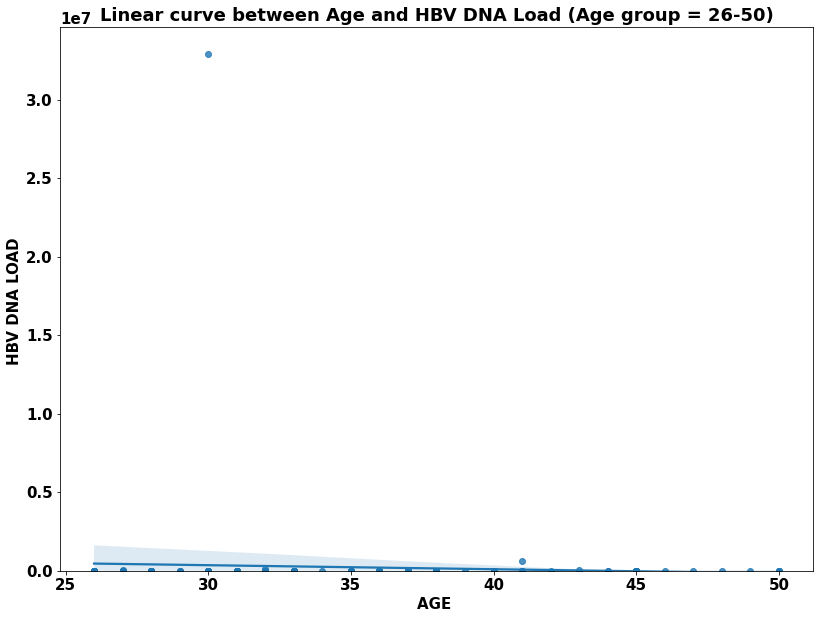

In [165]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(13.5,10))
sns.regplot(x='AGE ', y='HBV DNA LOAD ', data=df_age2)
plt.title('Linear curve between Age and HBV DNA Load (Age group = 26-50)', fontweight='bold')

plt.ylim(0,)
plt.savefig('reg_AGE_HBV_DNA_Load_age26-50.jpeg')

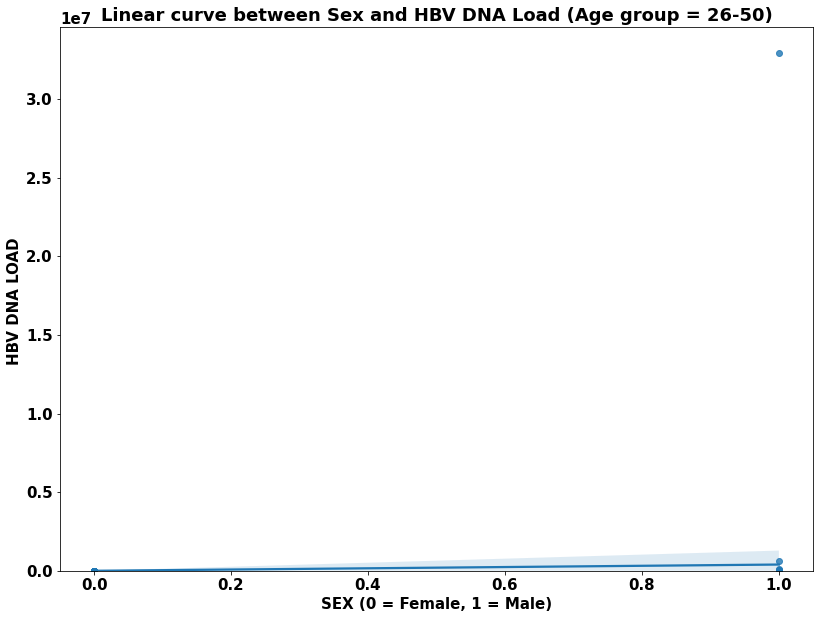

In [166]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(13.5,10))
sns.regplot(x='SEX ', y='HBV DNA LOAD ', data=df_age2)
plt.title('Linear curve between Sex and HBV DNA Load (Age group = 26-50)', fontweight='bold')

plt.xlabel('SEX (0 = Female, 1 = Male)')
plt.ylim(0,)
plt.savefig('reg_SEX_HBV_DNA_Load_age10-25.jpeg')

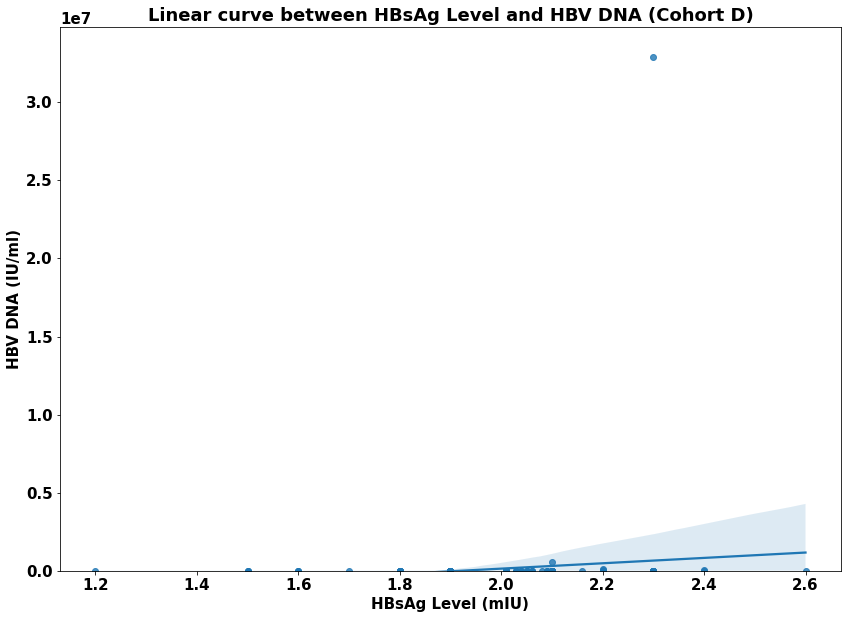

In [335]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14,10))
sns.regplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_age2)
plt.title('Linear curve between HBsAg Level and HBV DNA (Cohort D)', fontweight='bold')
plt.xlabel('HBsAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBSAG_HBV_DNA_Load_age26-50.jpeg')

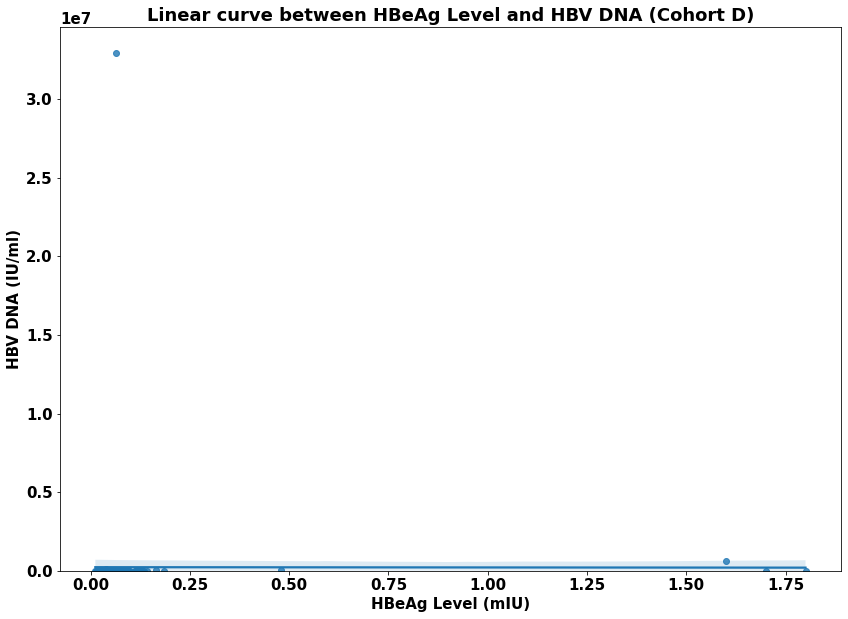

In [337]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14,10))
sns.regplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_age2)
plt.title('Linear curve between HBeAg Level and HBV DNA (Cohort D)', fontweight='bold')
plt.xlabel('HBeAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBEAG_HBV_DNA_Load_age26-50.jpeg')

### Residual Plots


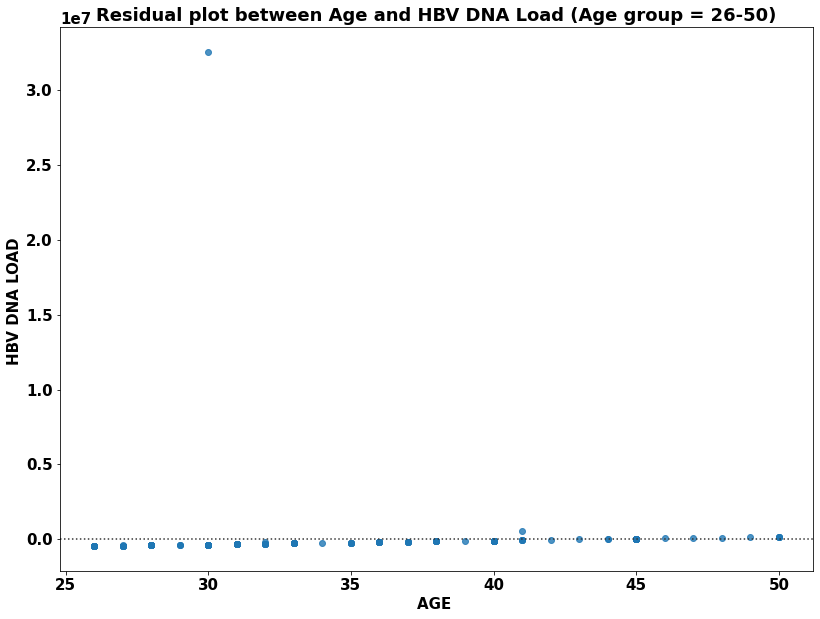

<Figure size 432x288 with 0 Axes>

In [169]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(13.5,10))
sns.residplot(x='AGE ', y='HBV DNA LOAD ', data=df_age2)
plt.title('Residual plot between Age and HBV DNA Load (Age group = 26-50)', fontweight='bold')
plt.show()
plt.savefig('residual_AGE_HBV_age26-50.jpeg')

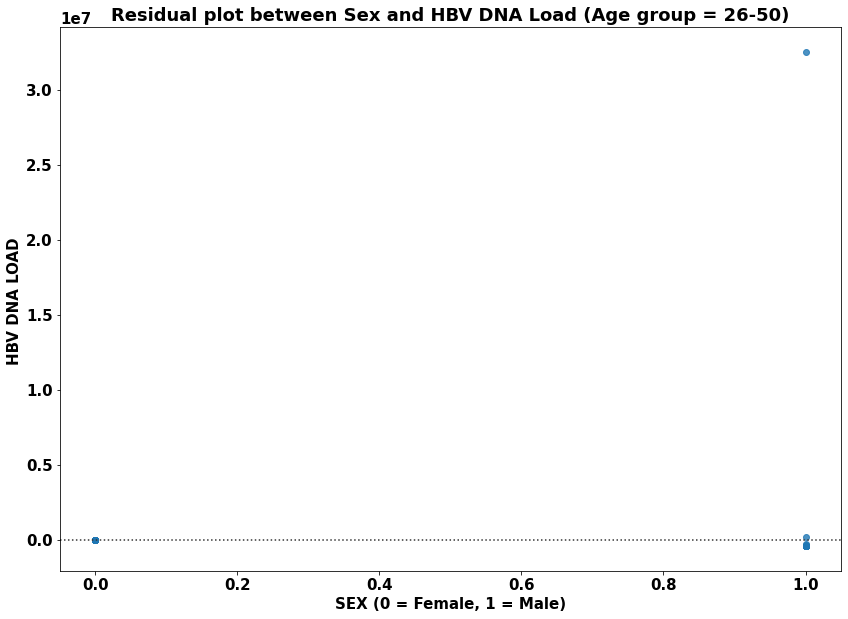

<Figure size 432x288 with 0 Axes>

In [170]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14,10))
sns.residplot(x='SEX ', y='HBV DNA LOAD ', data=df_age2)
plt.title('Residual plot between Sex and HBV DNA Load (Age group = 26-50)', fontweight='bold')

plt.xlabel('SEX (0 = Female, 1 = Male)')
plt.show()
plt.savefig('residual_Sex_HBV_age26-50.jpeg')

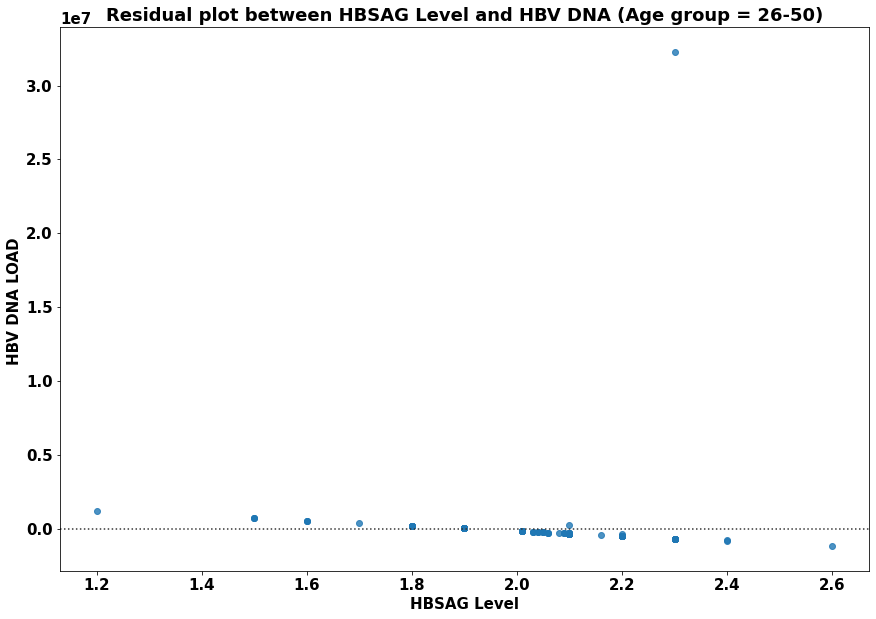

<Figure size 432x288 with 0 Axes>

In [171]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14.5,10))
sns.residplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_age2)
plt.title('Residual plot between HBSAG Level and HBV DNA (Age group = 26-50)', fontweight='bold')
plt.xlabel('HBSAG Level')
plt.show()
plt.savefig('residual_HBSAG_HBV_age26-50.jpeg')

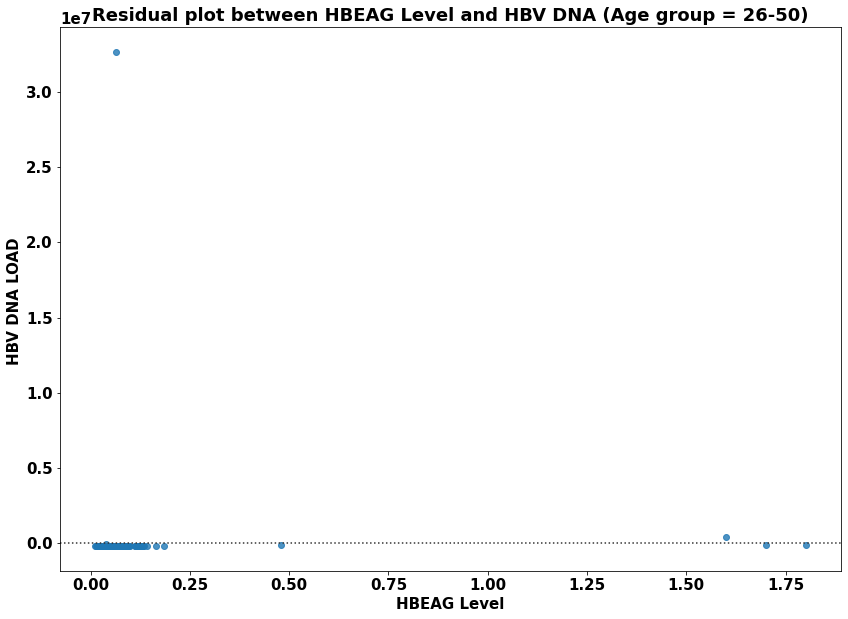

<Figure size 432x288 with 0 Axes>

In [172]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14,10))
sns.residplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_age2)
plt.title('Residual plot between HBEAG Level and HBV DNA (Age group = 26-50)', fontweight='bold')
plt.xlabel('HBEAG Level')
plt.show()
plt.savefig('residual_HBEAG_HBV_age26-50.jpeg')

### Statistical Data



In [173]:

from scipy.stats import pearsonr
print('Two tailed sign between Age and HBSAG', pearsonr(df_age2['AGE '], df_age2['HBSAG +VE ']))
print('Two tailed sign between Age and HBEAG', pearsonr(df_age2['AGE '], df_age2['HBEAG +VE ']))
print('Two tailed sign between Age and HBA DNA load', pearsonr(df_age2['AGE '], df_age2['HBV DNA LOAD ']))

print('Two tailed sign between HBSAG and Age', pearsonr(df_age2['HBSAG +VE '], df_age2['AGE ']))
print('Two tailed sign between HBSAG and HBEAG', pearsonr(df_age2['HBSAG +VE '], df_age2['HBEAG +VE ']))
print('Two tailed sign between HBSAG and HBA DNA load', pearsonr(df_age2['HBSAG +VE '], df_age2['HBV DNA LOAD ']))

print('Two tailed sign between HBEAG and Age', pearsonr(df_age2['HBEAG +VE '], df_age2['AGE ']))
print('Two tailed sign between HBEAG and HBSAG', pearsonr(df_age2['HBEAG +VE '], df_age2['HBSAG +VE ']))
print('Two tailed sign between HBEAG and HBA DNA load', pearsonr(df_age2['HBEAG +VE '], df_age2['HBV DNA LOAD ']))

print('Two tailed sign between HBV DNA LOAD and Age', pearsonr(df_age2['HBV DNA LOAD '], df_age2['AGE ']))
print('Two tailed sign between HBV DNA LOAD and HBEAG', pearsonr(df_age2['HBV DNA LOAD '], df_age2['HBEAG +VE ']))
print('Two tailed sign between HBV DNA LOAD and HBSAG', pearsonr(df_age2['HBV DNA LOAD '], df_age2['HBSAG +VE ']))



Two tailed sign between Age and HBSAG (-0.057616491192482286, 0.48669828313196967)
Two tailed sign between Age and HBEAG (0.1564361450426536, 0.057604152952964956)
Two tailed sign between Age and HBA DNA load (-0.06205746484993795, 0.4536866800955666)
Two tailed sign between HBSAG and Age (-0.057616491192482286, 0.48669828313196967)
Two tailed sign between HBSAG and HBEAG (0.07876934304360475, 0.3412872521440358)
Two tailed sign between HBSAG and HBA DNA load (0.11460724951340621, 0.16543865452711362)
Two tailed sign between HBEAG and Age (0.1564361450426536, 0.057604152952964956)
Two tailed sign between HBEAG and HBSAG (0.07876934304360475, 0.3412872521440358)
Two tailed sign between HBEAG and HBA DNA load (-0.001466646261334783, 0.985885165195918)
Two tailed sign between HBV DNA LOAD and Age (-0.06205746484993795, 0.4536866800955666)
Two tailed sign between HBV DNA LOAD and HBEAG (-0.001466646261334783, 0.985885165195918)
Two tailed sign between HBV DNA LOAD and HBSAG (0.114607249513

#### Sum of squares and cross products


In [174]:
N_m = df_age2.shape
print(N_m)
### Sum of Squares of Age in Male patients
sum_age_age2 = df_age2['AGE '].sum()
#print('sum of the age:', sum_age_m)
sq_sum_age_age2 = sum_age_age2**2
#print('square of the sum of age:', sq_sum_age_m)
sq_age_age2 = df_age2['AGE ']**2
sum_sq_age_age2 = sq_age_age2.sum()
#print('sum of sq_age:', sum_sq_age_m)
ss_age_age2 = sum_sq_age_age2-(sq_sum_age_age2/106)
print('sum of squares of age:', ss_age_age2)
### Sum of Squares of HBSAG among male patients
sum_HBSAG_age2 = df_age2['HBSAG +VE '].sum()
#print('sum of the HBSAG:', sum_HBSAG_m)
sq_sum_HBSAG_age2 = sum_HBSAG_age2**2
#print('square of the sum of HBSAG:', sq_sum_HBSAG_f)
sq_HBSAG_age2 = df_age2['HBSAG +VE ']**2
sum_sq_HBSAG_age2 = sq_HBSAG_age2.sum()
#print('sum of sq_HBSAG:', sum_sq_HBSAG_m)
ss_HBSAG_age2 = sum_sq_HBSAG_age2-(sq_sum_HBSAG_age2/106)
print('sum of squares of HBSAG:', ss_HBSAG_age2)

### Sum of Squares of HBEAG among the male patients 
sum_HBEAG_age2 = df_age2['HBEAG +VE '].sum()
#print('sum of the HBEAG:', sum_HBEAG_m)
sq_sum_HBEAG_age2 = sum_HBEAG_age2**2
#print('square of the sum of HBEAG:', sq_sum_HBEAG_m)
sq_HBEAG_age2 = df_age2['HBEAG +VE ']**2
sum_sq_HBEAG_age2 = sq_HBEAG_age2.sum()
#print('sum of sq_HBEAG:', sum_sq_HBEAG_m)
ss_HBEAG_age2 = sum_sq_HBEAG_age2-(sq_sum_HBEAG_age2/106)
print('sum of squares of HBEAG:', ss_HBEAG_age2)

### Sum of squares of HBV DNA Load among male patients
sum_HBA_age2 = df_age2['HBV DNA LOAD '].sum()
#print('sum of the HBA:', sum_HBA_m)
sq_sum_HBA_age2 = sum_HBA_age2**2
#print('square of the sum of HBA:', sq_sum_HBA_m)
sq_HBA_age2 = df_age2['HBV DNA LOAD ']**2
sum_sq_HBA_age2 = sq_HBA_age2.sum()
#print('sum of sq_HBA:', sum_sq_HBA_m)
ss_HBA_age2 = sum_sq_HBA_age2-(sq_sum_HBA_age2/106)
print('sum of squares of HBA:', ss_HBA_age2)

(148, 5)
sum of squares of age: -65506.41509433961
sum of squares of HBSAG: -242.26222641509423
sum of squares of HBEAG: 7.691519141509434
sum of squares of HBA: 1073845000781657.1


### Cross Products


In [175]:


df_age2.shape


df_age2_age_np2 = np.array(df_age2['AGE '])
df_age2_age_np = df_age2_age_np2.reshape(74,2)
df_age2_hbsag_np2 = np.array(df_age2['HBSAG +VE '])
df_age2_hbsag_np = df_age2_hbsag_np2.reshape(74,2)
df_age2_hbeag_np2 = np.array(df_age2['HBEAG +VE '])
df_age2_hbeag_np = df_age2_hbeag_np2.reshape(74,2)
df_age2_hba_np2 = np.array(df_age2['HBV DNA LOAD '])
df_age2_hba_np = df_age2_hba_np2.reshape(74,2)




In [176]:
cross_prod_age_hbsag = np.cross(df_age2_age_np, df_age2_hbsag_np)
print('cross product between AGE and HBSAG:', cross_prod_age_hbsag.sum()**2)
cross_prod_age_hbeag = np.cross(df_age2_age_np, df_age2_hbeag_np)
print('cross product between AGE and HBEAG:', cross_prod_age_hbeag.sum()**2)
cross_prod_age_hba = np.cross(df_age2_age_np, df_age2_hba_np)
print('cross product between AGE and HBV DNA Load:', cross_prod_age_hba.sum()**2)
cross_prod_hbsag_hbeag = np.cross(df_age2_hbeag_np, df_age2_hbsag_np)
print('cross product between HBSAG and HBEAG:', cross_prod_hbsag_hbeag.sum()**2)
cross_prod_hbsag_hba = np.cross(df_age2_hbsag_np, df_age2_hba_np)
print('cross product between HBSAG and HBV DNA LOAD:', cross_prod_hbsag_hba.sum()**2)
cross_prod_hbeag_hba = np.cross(df_age2_hbeag_np, df_age2_hba_np)
print('cross product between HBEAG and HBA:', cross_prod_hbeag_hba.sum()**2)


cross product between AGE and HBSAG: 3151.6996
cross product between AGE and HBEAG: 3129.507364
cross product between AGE and HBV DNA Load: 1.0396860849768804e+18
cross product between HBSAG and HBEAG: 5.0795693641
cross product between HBSAG and HBV DNA LOAD: 5019616491105494.0
cross product between HBEAG and HBA: 5407055029084.123


### Covariance matrix



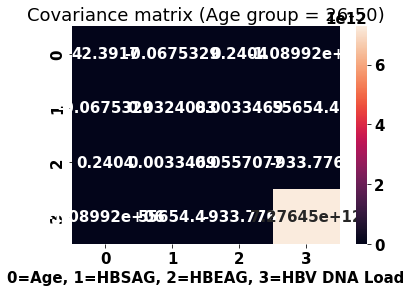

<Figure size 432x288 with 0 Axes>

In [177]:
df_age2_np = np.array([df_age2_age_np2, df_age2_hbsag_np2, df_age2_hbeag_np2, df_age2_hba_np2])
df_age2_np.shape

df_age2_cov = np.cov(df_age2_np, bias = True)
plt.title('Covariance matrix (Age group = 26-50)')


sns.heatmap(df_age2_cov, annot=True, fmt='g')
plt.xlabel('0=Age, 1=HBSAG, 2=HBEAG, 3=HBV DNA Load')
plt.show()
plt.savefig('covariance_matrix_age26-50.jpeg')

## Age based analysis (Group1_age_50-100)



In [178]:


data_50_100 = pd.read_excel('Data.xlsx', sheet_name=8)
data_50_100.head()



,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,51,F,2.10,0.062,3.8
1,52,M,2.06,0.102,2750.0
2,52,M,2.01,0.041,3.8
3,52,M,2.20,0.028,315.0
4,52,M,2.10,0.064,131.0


In [179]:
data_50_100.info()

data_50_100.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            58 non-null     int64  
 1   SEX            58 non-null     object 
 2   HBSAG +VE      58 non-null     float64
 3   HBEAG +VE      58 non-null     float64
 4   HBV DNA LOAD   58 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ KB


Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')

In [180]:
db_age3 = data_50_100.replace("M", "Male")
db_age3 = db_age3.replace("M ", "Male")
db_age3 = db_age3.replace("F", "Female")
db_age3 = db_age3.replace("F ", "Female")

In [181]:
db_age3.shape

(58, 5)

### Encoding Gender

In [182]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
db_age3.loc[:,'SEX '] = le.transform(db_age3['SEX '])


In [183]:
z = np.abs(stats.zscore(db_age3))

In [184]:
db_age3_clean = db_age3[(z<3).all(axis=1)]

In [185]:
db_age3_clean.shape

(53, 5)

### Interquartile range method




In [186]:
Q1 = db_age3.quantile(q=.25)
Q3 = db_age3.quantile(q=.75)
IQR = db_age3.apply(stats.iqr)

db_clean_iq_age3 = db_age3[~((db_age3 < (Q1-1.5*IQR)) | (db_age3 > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_age3.shape


(39, 5)

### Copy  the data



In [187]:
df_age3 = db_age3_clean.copy()



### Descriptive Analysis




In [188]:
df_age3_table = df_age3.describe()
df_age3_table.to_csv('Age_51-100_table_describe.csv')
print(df_age3.describe())

print('columns:', df_age3.columns)

            AGE        SEX   HBSAG +VE   HBEAG +VE   HBV DNA LOAD 
count  53.000000  53.000000   53.000000   53.000000   5.300000e+01
mean   62.490566   0.735849    2.118491    0.830189   1.045787e+07
std     7.466908   0.445099    0.113534    1.004440   2.414423e+07
min    51.000000   0.000000    1.800000    0.011000   3.800000e+00
25%    55.000000   0.000000    2.100000    0.042000   3.800000e+01
50%    64.000000   1.000000    2.100000    0.091000   3.150000e+02
75%    70.000000   1.000000    2.200000    2.100000   1.382600e+06
max    80.000000   1.000000    2.300000    2.300000   1.186590e+08
columns: Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')


### Exploratory Analysis





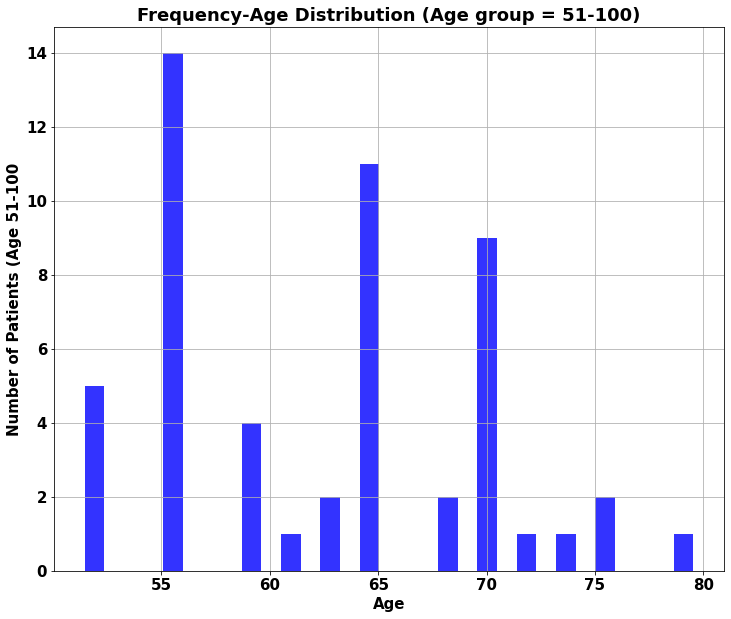

In [189]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_age3['AGE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients (Age 51-100')
plt.title('Frequency-Age Distribution (Age group = 51-100)', fontweight='bold')
plt.grid(True)
plt.savefig('Age_distribution_age51-100.jpeg')
plt.show()

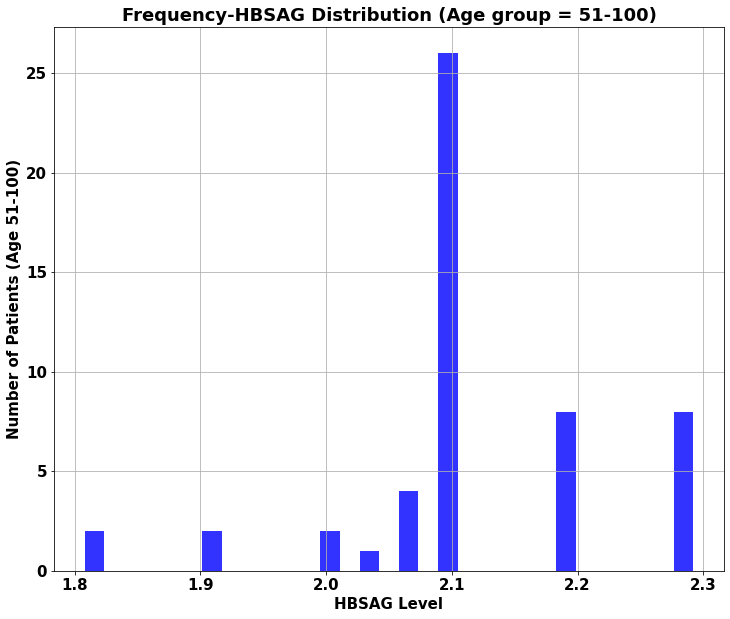

In [190]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_age3['HBSAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBSAG Level')
plt.ylabel('Number of Patients (Age 51-100)')
plt.title('Frequency-HBSAG Distribution (Age group = 51-100)', fontweight='bold')
plt.grid(True)
plt.savefig('HBSAG_distribution_age51-100.jpeg')
plt.show()

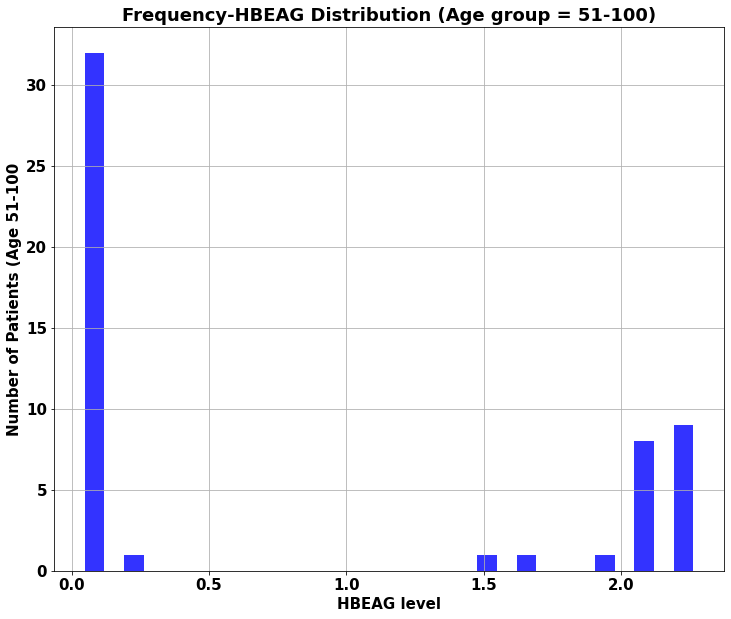

In [191]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_age3['HBEAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBEAG level')
plt.ylabel('Number of Patients (Age 51-100')
plt.title('Frequency-HBEAG Distribution (Age group = 51-100)', fontweight='bold')
plt.grid(True)
plt.savefig('HBEAG_distribution_age51-100.jpeg')
plt.show()

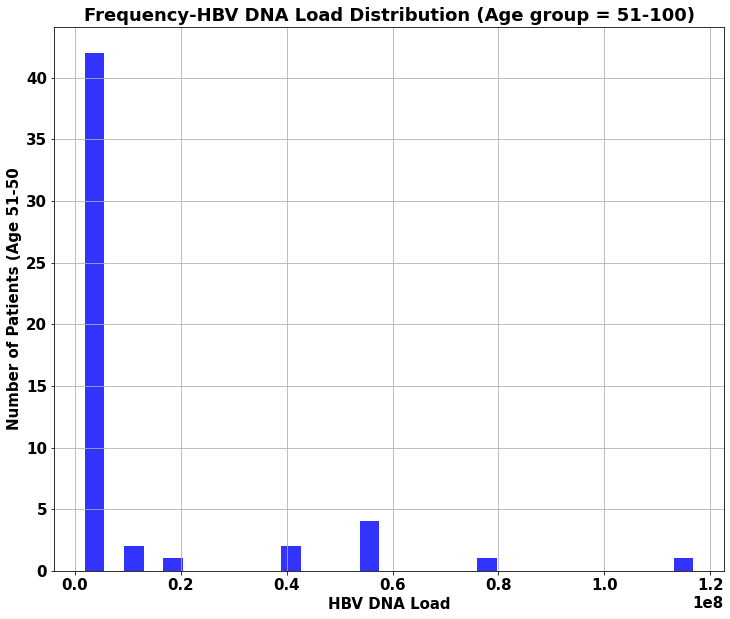

In [192]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_age3['HBV DNA LOAD '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBV DNA Load')
plt.ylabel('Number of Patients (Age 51-50')
plt.title('Frequency-HBV DNA Load Distribution (Age group = 51-100)', fontweight='bold')
plt.grid(True)
plt.savefig('HBV_DNA_distribution_age51-100.jpeg')
plt.show()

### Multiple regression (Group 1_Age 51-100)



In [193]:
mr_age3 = LinearRegression()
x_age3 = df_age3[['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ']]
y_age3 = df_age3['HBV DNA LOAD ']
mr_age3.fit(x_age3,y_age3)

print('intercept:', mr_age3.intercept_)

print('Coefficient:', mr_age3.coef_)



intercept: -119757579.81122771
Coefficient: [  539564.78973125 -6254375.20329913 43093738.3134502  11812186.05226466]



### Correlation Matrix



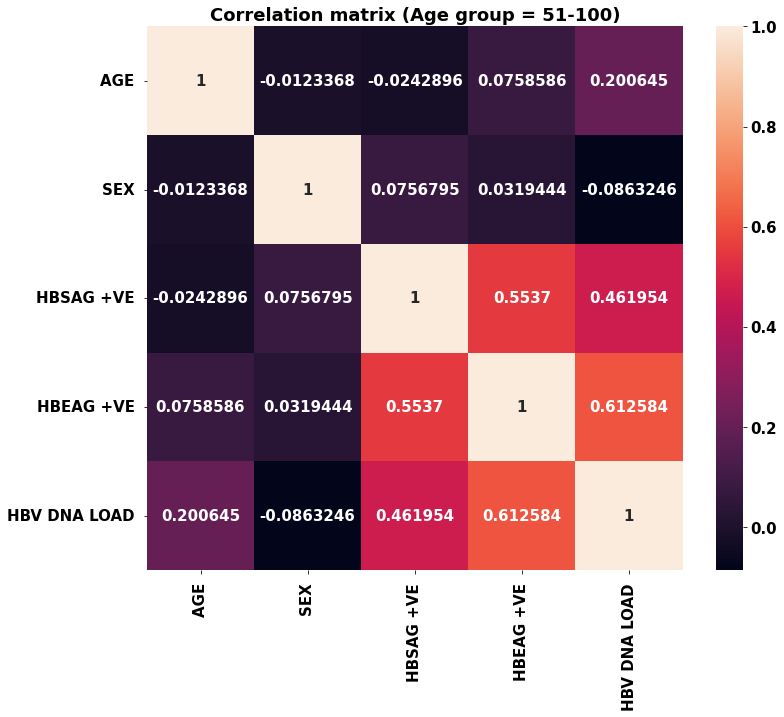

<Figure size 432x288 with 0 Axes>

In [194]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))

df_age3_corr = df_age3[['AGE ', "SEX ", 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD ']].corr()
sns.heatmap(df_age3_corr, annot=True, fmt='g')
plt.title('Correlation matrix (Age group = 51-100)', fontweight='bold')
plt.show()
plt.savefig('Correlation_matrix_age_51-100_g1.jpeg')

### Visualization


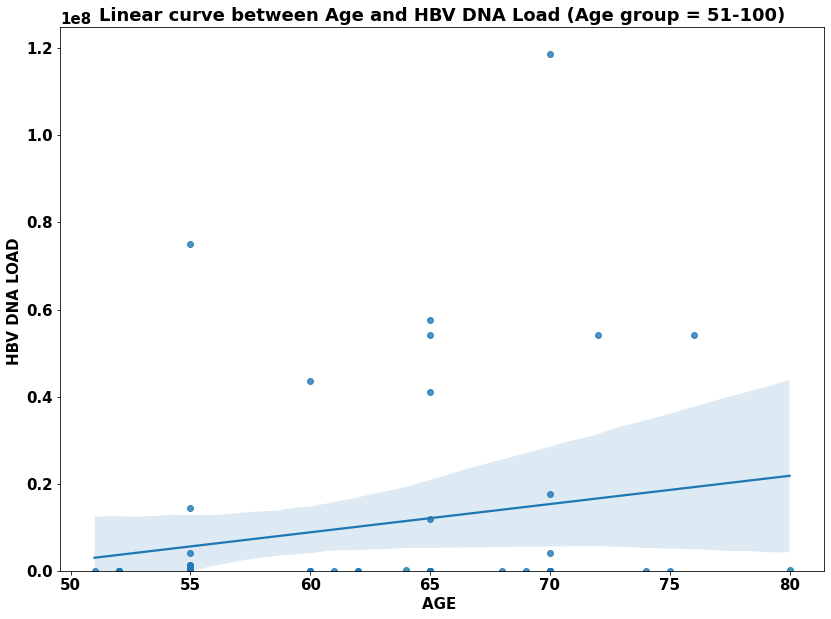

In [195]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(13.7, 10))

sns.regplot(x='AGE ', y='HBV DNA LOAD ', data=df_age3)
plt.title('Linear curve between Age and HBV DNA Load (Age group = 51-100)', fontweight='bold')
plt.ylim(0,)
plt.savefig('reg_AGE_HBV_DNA_Load_age51-100.jpeg')

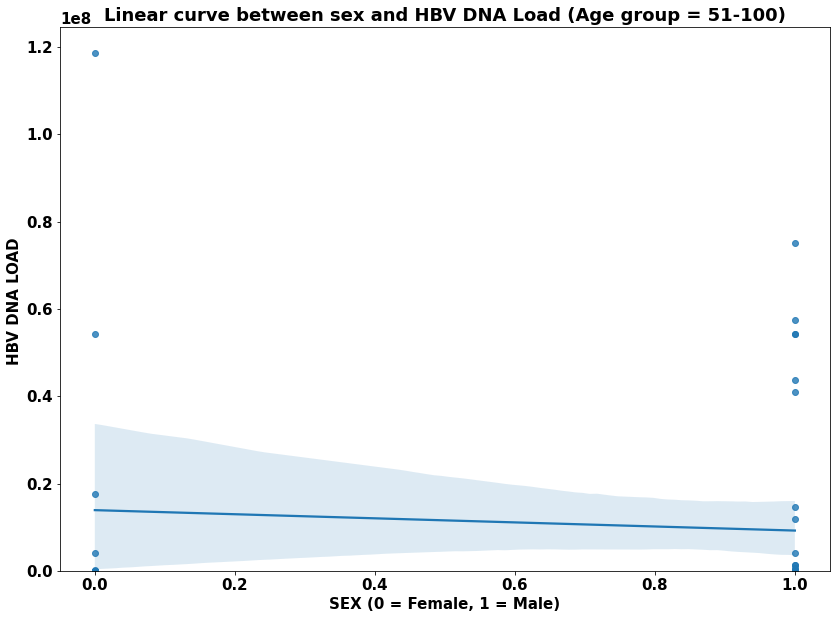

In [196]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"



plt.figure(figsize=(13.8,10))
sns.regplot(x='SEX ', y='HBV DNA LOAD ', data=df_age3)
plt.xlabel('SEX (0 = Female, 1 = Male)')
plt.title('Linear curve between sex and HBV DNA Load (Age group = 51-100)', fontweight='bold')
plt.ylim(0,)
plt.savefig('reg_SEX_HBV_DNA_Load_age51-100.jpeg')

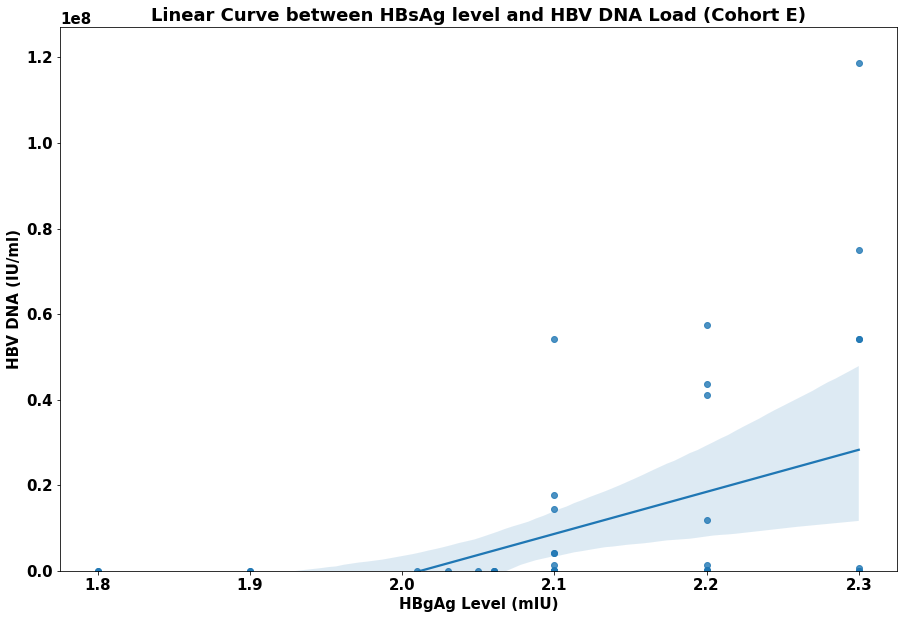

In [338]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(15,10))
sns.regplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_age3)
plt.xlabel('HBgAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.title('Linear Curve between HBsAg level and HBV DNA Load (Cohort E)', fontweight='bold')
plt.ylim(0,)
plt.savefig('reg_HBSAG_HBV_DNA_Load_age51-100.jpeg')

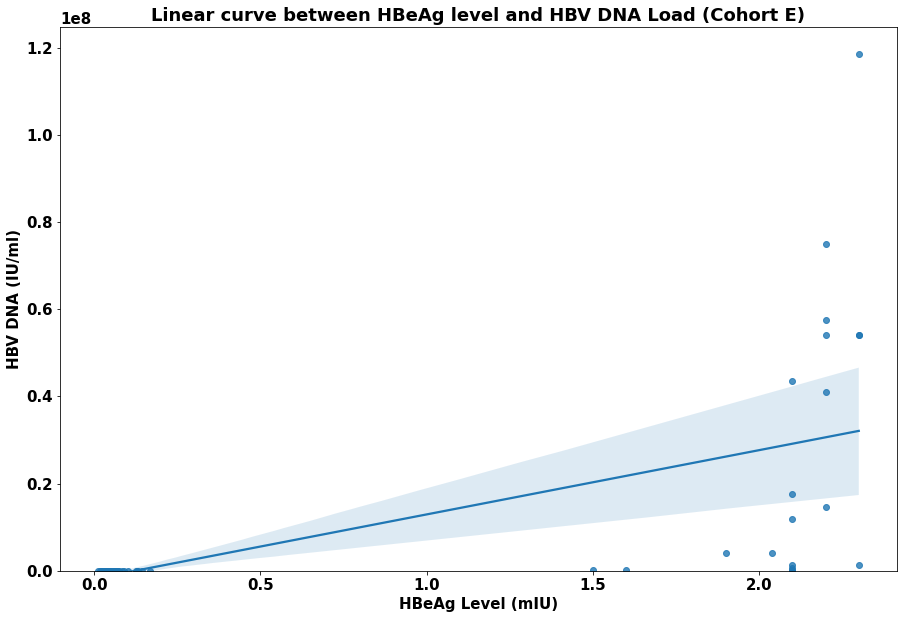

In [339]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(15,10))
sns.regplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_age3)
plt.xlabel('HBeAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.title('Linear curve between HBeAg level and HBV DNA Load (Cohort E)', fontweight='bold')
plt.ylim(0,)
plt.savefig('reg_HBEAG_HBV_DNA_Load_age51-100.jpeg')

### Residual Plots



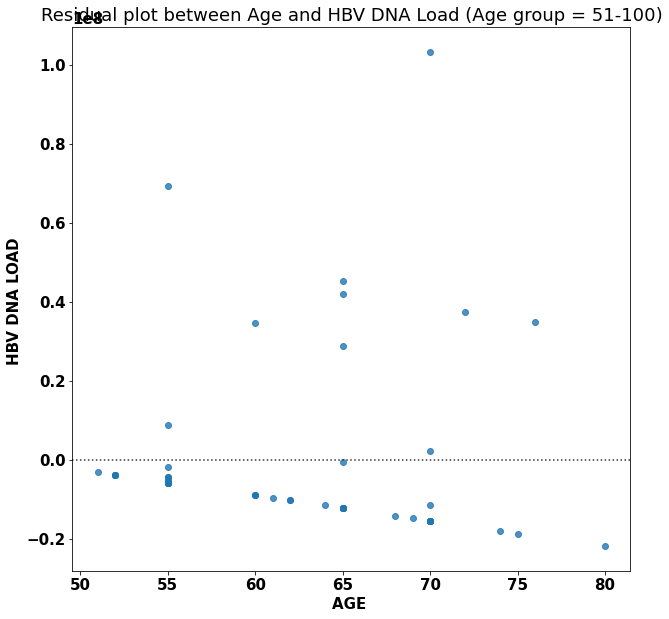

<Figure size 432x288 with 0 Axes>

In [199]:

plt.figure(figsize=(10,10))
sns.residplot(x='AGE ', y='HBV DNA LOAD ', data=df_age3)
plt.title('Residual plot between Age and HBV DNA Load (Age group = 51-100)')
plt.show()
plt.savefig('residual_AGE_HBV_age51-100.jpeg')

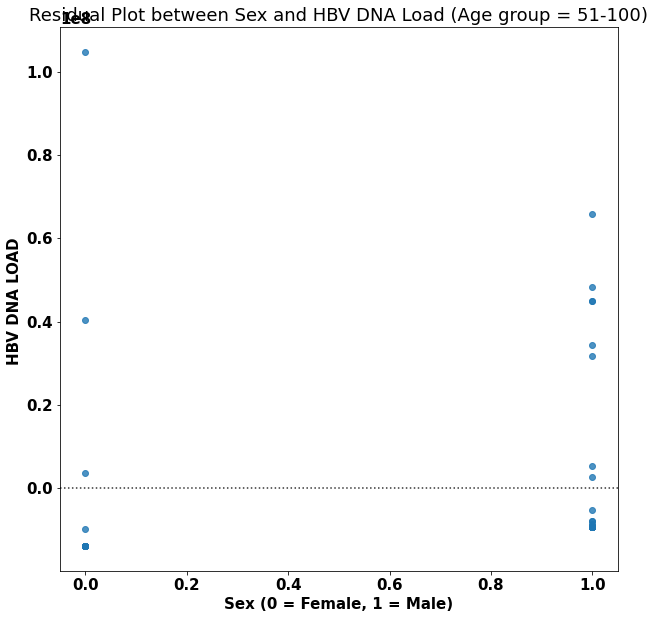

<Figure size 432x288 with 0 Axes>

In [200]:

plt.figure(figsize=(10,10))
sns.residplot(x='SEX ', y='HBV DNA LOAD ', data=df_age3)
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.title('Residual Plot between Sex and HBV DNA Load (Age group = 51-100)')
plt.show()
plt.savefig('residual_SEX_HBV_age51-100.jpeg')

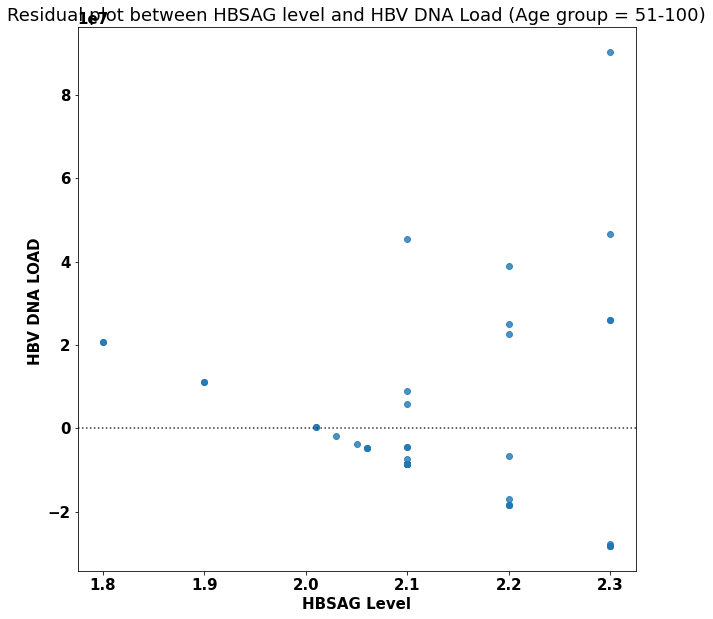

<Figure size 432x288 with 0 Axes>

In [201]:

plt.figure(figsize=(10,10))
sns.residplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_age3)
plt.xlabel('HBSAG Level')
plt.title('Residual plot between HBSAG level and HBV DNA Load (Age group = 51-100)')
plt.show()
plt.savefig('residual_HBSAG_HBV_age51-100.jpeg')

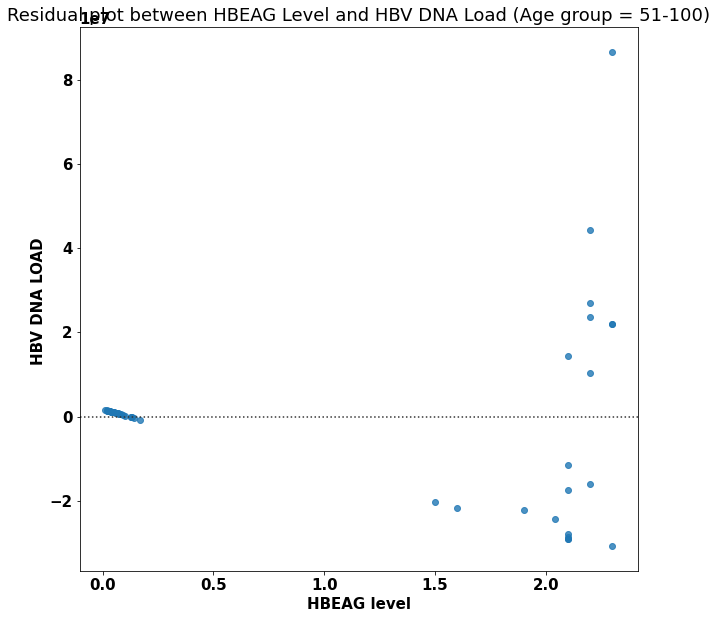

<Figure size 432x288 with 0 Axes>

In [202]:

plt.figure(figsize=(10,10))
sns.residplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_age3)
plt.xlabel('HBEAG level')
plt.title('Residual plot between HBEAG Level and HBV DNA Load (Age group = 51-100)')
plt.show()
plt.savefig('residual_HBEAG_HBV_age51-100.jpeg')

### Statistical Data



In [203]:



from scipy.stats import pearsonr
print('Two tailed sign between Age and HBSAG', pearsonr(df_age3['AGE '], df_age3['HBSAG +VE ']))
print('Two tailed sign between Age and HBEAG', pearsonr(df_age3['AGE '], df_age3['HBEAG +VE ']))
print('Two tailed sign between Age and HBA DNA load', pearsonr(df_age3['AGE '], df_age3['HBV DNA LOAD ']))

print('Two tailed sign between HBSAG and Age', pearsonr(df_age3['HBSAG +VE '], df_age3['AGE ']))
print('Two tailed sign between HBSAG and HBEAG', pearsonr(df_age3['HBSAG +VE '], df_age3['HBEAG +VE ']))
print('Two tailed sign between HBSAG and HBA DNA load', pearsonr(df_age3['HBSAG +VE '], df_age3['HBV DNA LOAD ']))

print('Two tailed sign between HBEAG and Age', pearsonr(df_age3['HBEAG +VE '], df_age3['AGE ']))
print('Two tailed sign between HBEAG and HBSAG', pearsonr(df_age3['HBEAG +VE '], df_age3['HBSAG +VE ']))
print('Two tailed sign between HBEAG and HBA DNA load', pearsonr(df_age3['HBEAG +VE '], df_age3['HBV DNA LOAD ']))

print('Two tailed sign between HBV DNA LOAD and Age', pearsonr(df_age3['HBV DNA LOAD '], df_age3['AGE ']))
print('Two tailed sign between HBV DNA LOAD and HBEAG', pearsonr(df_age3['HBV DNA LOAD '], df_age3['HBEAG +VE ']))
print('Two tailed sign between HBV DNA LOAD and HBSAG', pearsonr(df_age3['HBV DNA LOAD '], df_age3['HBSAG +VE ']))



Two tailed sign between Age and HBSAG (-0.024289559044658182, 0.8629348112158259)
Two tailed sign between Age and HBEAG (0.07585858929871346, 0.589287353721766)
Two tailed sign between Age and HBA DNA load (0.200645044261578, 0.14970253642847955)
Two tailed sign between HBSAG and Age (-0.024289559044658182, 0.8629348112158259)
Two tailed sign between HBSAG and HBEAG (0.5537003945870765, 1.702780321789231e-05)
Two tailed sign between HBSAG and HBA DNA load (0.46195403000633384, 0.0004975355526677169)
Two tailed sign between HBEAG and Age (0.07585858929871346, 0.589287353721766)
Two tailed sign between HBEAG and HBSAG (0.5537003945870765, 1.702780321789231e-05)
Two tailed sign between HBEAG and HBA DNA load (0.6125841633914397, 1.0875872260922976e-06)
Two tailed sign between HBV DNA LOAD and Age (0.200645044261578, 0.14970253642847955)
Two tailed sign between HBV DNA LOAD and HBEAG (0.6125841633914397, 1.0875872260922976e-06)
Two tailed sign between HBV DNA LOAD and HBSAG (0.461954030006

#### Sum of squares and cross products


In [204]:

N_m = df_age3.shape
print(N_m)
### Sum of Squares of Age in Male patients
sum_age_age3 = df_age3['AGE '].sum()
#print('sum of the age:', sum_age_m)
sq_sum_age_age3 = sum_age_age3**2
#print('square of the sum of age:', sq_sum_age_m)
sq_age_age3 = df_age3['AGE ']**2
sum_sq_age_age3 = sq_age_age3.sum()
#print('sum of sq_age:', sum_sq_age_m)
ss_age_age3 = sum_sq_age_age3-(sq_sum_age_age3/39)
print('sum of squares of age:', ss_age_age3)
### Sum of Squares of HBSAG among male patients
sum_HBSAG_age3 = df_age3['HBSAG +VE '].sum()
#print('sum of the HBSAG:', sum_HBSAG_m)
sq_sum_HBSAG_age3 = sum_HBSAG_age3**2
#print('square of the sum of HBSAG:', sq_sum_HBSAG_f)
sq_HBSAG_age3 = df_age3['HBSAG +VE ']**2
sum_sq_HBSAG_age3 = sq_HBSAG_age3.sum()
#print('sum of sq_HBSAG:', sum_sq_HBSAG_m)
ss_HBSAG_age3 = sum_sq_HBSAG_age3-(sq_sum_HBSAG_age3/39)
print('sum of squares of HBSAG:', ss_HBSAG_age3)

### Sum of Squares of HBEAG among the male patients 
sum_HBEAG_age3 = df_age3['HBEAG +VE '].sum()
#print('sum of the HBEAG:', sum_HBEAG_m)
sq_sum_HBEAG_age3 = sum_HBEAG_age3**2
#print('square of the sum of HBEAG:', sq_sum_HBEAG_m)
sq_HBEAG_age3 = df_age3['HBEAG +VE ']**2
sum_sq_HBEAG_age3 = sq_HBEAG_age3.sum()
#print('sum of sq_HBEAG:', sum_sq_HBEAG_m)
ss_HBEAG_age3 = sum_sq_HBEAG_age3-(sq_sum_HBEAG_age3/39)
print('sum of squares of HBEAG:', ss_HBEAG_age3)

### Sum of squares of HBV DNA Load among male patients
sum_HBA_age3 = df_age3['HBV DNA LOAD '].sum()
#print('sum of the HBA:', sum_HBA_m)
sq_sum_HBA_age3 = sum_HBA_age3**2
#print('square of the sum of HBA:', sq_sum_HBA_m)
sq_HBA_age3 = df_age3['HBV DNA LOAD ']**2
sum_sq_HBA_age3 = sq_HBA_age3.sum()
#print('sum of sq_HBA:', sum_sq_HBA_m)
ss_HBA_age3 = sum_sq_HBA_age3-(sq_sum_HBA_age3/39)
print('sum of squares of HBA:', ss_HBA_age3)

(53, 5)
sum of squares of age: -71397.23076923075
sum of squares of HBSAG: -84.71684102564089
sum of squares of HBEAG: 39.35007235897435
sum of squares of HBA: 2.8232287564855216e+16


### Cross Products



In [205]:
df_age3.head()

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,51,0,2.10,0.062,3.8
1,52,1,2.06,0.102,2750.0
2,52,1,2.01,0.041,3.8
3,52,1,2.20,0.028,315.0
4,52,1,2.10,0.064,131.0


In [206]:
df_age3.drop(labels=[42], axis=0, inplace=True)

In [207]:
print(df_age3.describe())

            AGE        SEX   HBSAG +VE   HBEAG +VE   HBV DNA LOAD 
count  52.000000  52.000000   52.000000   52.000000   5.200000e+01
mean   62.346154   0.750000    2.120577    0.845423   1.065899e+07
std     7.464648   0.437237    0.113611    1.008038   2.433492e+07
min    51.000000   0.000000    1.800000    0.011000   3.800000e+00
25%    55.000000   0.750000    2.100000    0.045000   4.325000e+01
50%    63.000000   1.000000    2.100000    0.096500   3.280000e+02
75%    69.250000   1.000000    2.200000    2.100000   2.048138e+06
max    80.000000   1.000000    2.300000    2.300000   1.186590e+08


In [208]:



df_age3_age_np3 = np.array(df_age3['AGE '])
df_age3_age_np = df_age3_age_np3.reshape(26,2)
df_age3_hbsag_np3 = np.array(df_age3['HBSAG +VE '])
df_age3_hbsag_np = df_age3_hbsag_np3.reshape(26,2)
df_age3_hbeag_np3 = np.array(df_age3['HBEAG +VE '])
df_age3_hbeag_np = df_age3_hbeag_np3.reshape(26,2)
df_age3_hba_np3 = np.array(df_age3['HBV DNA LOAD '])
df_age3_hba_np = df_age3_hba_np3.reshape(26,2)


In [209]:


cross_prod_age_hbsag = np.cross(df_age3_age_np, df_age3_hbsag_np)
print('cross product between AGE and HBSAG:', cross_prod_age_hbsag.sum()**2)
cross_prod_age_hbeag = np.cross(df_age3_age_np, df_age3_hbeag_np)
print('cross product between AGE and HBEAG:', cross_prod_age_hbeag.sum()**2)
cross_prod_age_hba = np.cross(df_age3_age_np, df_age3_hba_np)
print('cross product between AGE and HBV DNA Load:', cross_prod_age_hba.sum()**2)
cross_prod_hbsag_hbeag = np.cross(df_age3_hbeag_np, df_age3_hbsag_np)
print('cross product between HBSAG and HBEAG:', cross_prod_hbsag_hbeag.sum()**2)
cross_prod_hbsag_hba = np.cross(df_age3_hbsag_np, df_age3_hba_np)
print('cross product between HBSAG and HBV DNA LOAD:', cross_prod_hbsag_hba.sum()**2)
cross_prod_hbeag_hba = np.cross(df_age3_hbeag_np, df_age3_hba_np)
print('cross product between HBEAG and HBA:', cross_prod_hbeag_hba.sum()**2)


cross product between AGE and HBSAG: 2857.971599999996
cross product between AGE and HBEAG: 67471.62100900002
cross product between AGE and HBV DNA Load: 2.3394298687235867e+19
cross product between HBSAG and HBEAG: 65.13652131840003
cross product between HBSAG and HBV DNA LOAD: 3.2152344531933696e+16
cross product between HBEAG and HBA: 2.2913779217521436e+16


### Covariance matrix


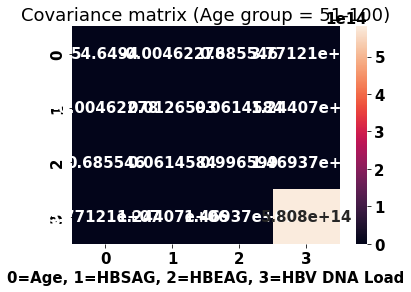

<Figure size 432x288 with 0 Axes>

In [210]:
df_age3_np = np.array([df_age3_age_np3, df_age3_hbsag_np3, df_age3_hbeag_np3, df_age3_hba_np3])
df_age3_np.shape

df_age3_cov = np.cov(df_age3_np, bias = True)
plt.title('Covariance matrix (Age group = 51-100)')


sns.heatmap(df_age3_cov, annot=True, fmt='g')
plt.xlabel('0=Age, 1=HBSAG, 2=HBEAG, 3=HBV DNA Load')
plt.show()
plt.savefig('covariance_matrix_age51-100.jpeg')

### Cohort F (HBEAG negative)

In [211]:
data_neg = pd.read_excel('Data_negative.xlsx')

In [212]:
data_neg.head()

,AGE,SEX,HBSAG +VE,HBEAG -VE,HBV DNA LOAD
0,31,M,2.105,0.029,3.8
1,36,F,2.057,0.057,7350.0
2,25,F,1.731,0.024,3.8
3,44,M,1.846,0.062,3.8
4,25,M,1.631,0.034,3.8


In [213]:
data_neg.info()

data_neg.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            289 non-null    int64  
 1   SEX            275 non-null    object 
 2   HBSAG +VE      289 non-null    float64
 3   HBEAG -VE      289 non-null    float64
 4   HBV DNA LOAD   289 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.4+ KB


Index(['AGE', 'SEX', 'HBSAG +VE ', 'HBEAG -VE', 'HBV DNA LOAD '], dtype='object')

In [214]:
db_neg = data_neg.replace("M", "Male")
db_neg = db_neg.replace("M ", "Male")
db_neg = db_neg.replace("F", "Female")
db_neg = db_neg.replace("F ", "Female")

db_neg.shape



(289, 5)

In [215]:
db_neg['SEX'] = db_neg['SEX'].fillna('Male')


In [216]:
db_neg.head()

,AGE,SEX,HBSAG +VE,HBEAG -VE,HBV DNA LOAD
0,31,Male,2.105,0.029,3.8
1,36,Female,2.057,0.057,7350.0
2,25,Female,1.731,0.024,3.8
3,44,Male,1.846,0.062,3.8
4,25,Male,1.631,0.034,3.8


### Encoding Gender

In [217]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
db_neg.loc[:,'SEX'] = le.transform(db_neg['SEX'])


In [218]:
db_neg.head()

,AGE,SEX,HBSAG +VE,HBEAG -VE,HBV DNA LOAD
0,31,1,2.105,0.029,3.8
1,36,0,2.057,0.057,7350.0
2,25,0,1.731,0.024,3.8
3,44,1,1.846,0.062,3.8
4,25,1,1.631,0.034,3.8


In [219]:
z = np.abs(stats.zscore(db_neg))

In [220]:
db_neg_clean = db_neg[(z<3).all(axis=1)]

In [221]:
db_neg_clean.shape

(281, 5)

### Interquartile range method


In [222]:

Q1 = db_neg.quantile(q=.25)
Q3 = db_neg.quantile(q=.75)
IQR = db_neg.apply(stats.iqr)

db_clean_iq_neg = db_neg[~((db_neg < (Q1-1.5*IQR)) | (db_neg > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_neg.shape




(208, 5)

### Copy  the data


In [223]:

df_neg = db_neg_clean.copy()




### Descriptive Analysis



In [224]:
df_neg_table = df_neg.describe()
df_neg_table.to_csv('HBSAG_neg_table_describe.csv')
print(df_neg.describe())

print('columns:', df_neg.columns)

              AGE         SEX  HBSAG +VE    HBEAG -VE  HBV DNA LOAD 
count  281.000000  281.000000  281.000000  281.000000     281.000000
mean    33.384342    0.590747    2.085089    0.062512    1522.412100
std     13.925117    0.492573    0.151225    0.035107   10160.213872
min     10.000000    0.000000    1.581000    0.011000       3.800000
25%     24.000000    0.000000    2.018000    0.033000       3.800000
50%     30.000000    1.000000    2.118000    0.058000     112.000000
75%     40.000000    1.000000    2.166000    0.082000     269.000000
max     75.000000    1.000000    2.463000    0.167000  142623.000000
columns: Index(['AGE', 'SEX', 'HBSAG +VE ', 'HBEAG -VE', 'HBV DNA LOAD '], dtype='object')


### Exploratory Analysis



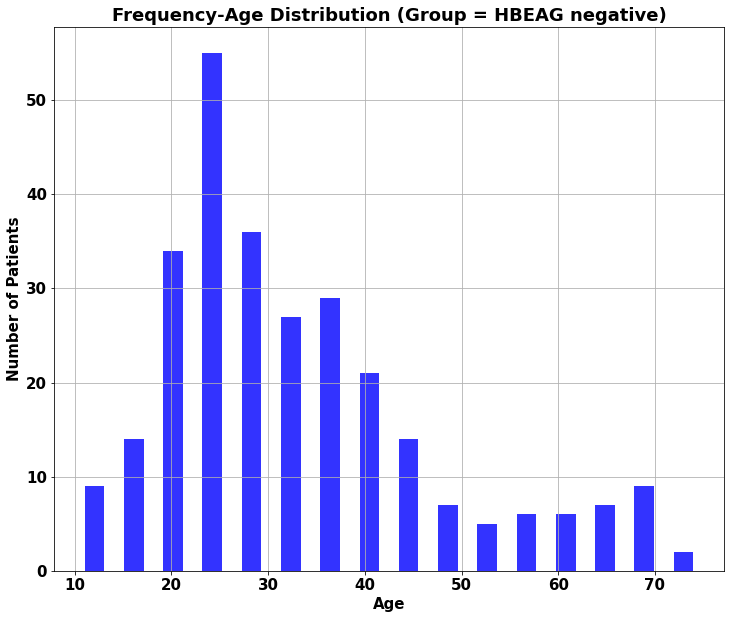

In [225]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_neg['AGE'], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution (Group = HBEAG negative)', fontweight='bold')
plt.grid(True)
plt.savefig('Age_distribution_HBEAG_negative.jpeg')
plt.show()

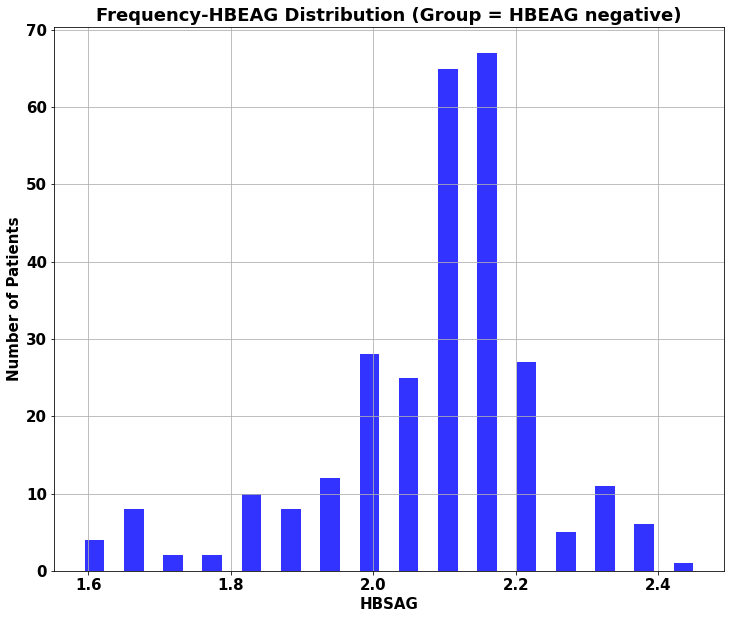

In [226]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_neg['HBSAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBSAG')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBEAG Distribution (Group = HBEAG negative)', fontweight='bold')
plt.grid(True)
plt.savefig('HBSAG_distribution_HBEAG_negative.jpeg')
plt.show()

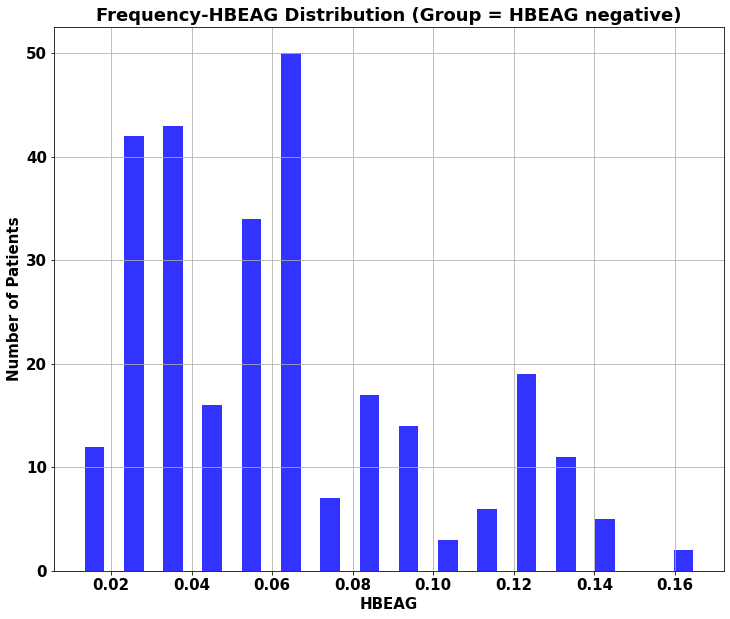

In [227]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_neg['HBEAG -VE'], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBEAG')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBEAG Distribution (Group = HBEAG negative)', fontweight='bold')
plt.grid(True)
plt.savefig('HBEAG_distribution_HBEAG_negative.jpeg')
plt.show()

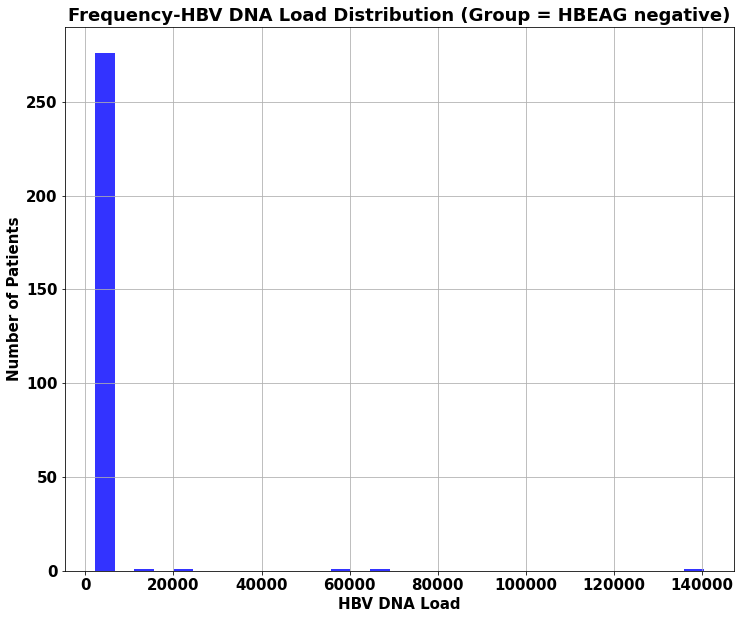

In [228]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))
plt.hist(df_neg['HBV DNA LOAD '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBV DNA Load')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBV DNA Load Distribution (Group = HBEAG negative)', fontweight='bold')
plt.grid(True)
plt.savefig('HBV-DNA-Load_distribution_HBEAG_negative.jpeg')
plt.show()

### Multiple regression (Group 1_Age 51-100)



In [229]:
mr_neg = LinearRegression()
x_neg = df_neg[['AGE', 'SEX', 'HBSAG +VE ', 'HBEAG -VE']]
y_neg = df_neg['HBV DNA LOAD ']
mr_neg.fit(x_neg,y_neg)

print('intercept:', mr_neg.intercept_)

print('Coefficient:', mr_neg.coef_)





intercept: -14178.188397058508
Coefficient: [  -29.97712776  1056.68534874  6910.94778549 26669.75920433]



### Correlation Matrix



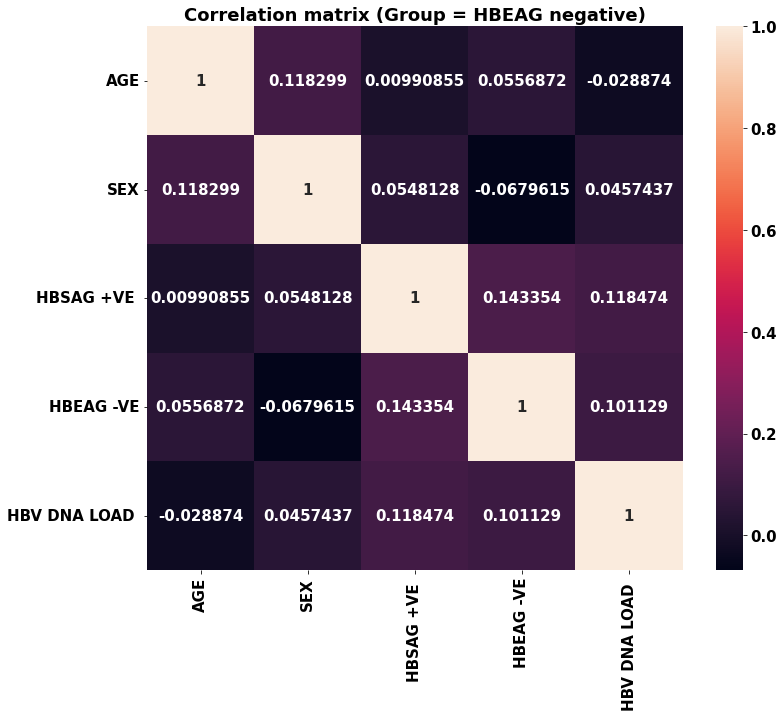

<Figure size 432x288 with 0 Axes>

In [230]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(12, 10))

df_neg_corr = df_neg[['AGE', "SEX", 'HBSAG +VE ', 'HBEAG -VE', 'HBV DNA LOAD ']].corr()
sns.heatmap(df_neg_corr, annot=True, fmt='g')
plt.title('Correlation matrix (Group = HBEAG negative)', fontweight='bold')
plt.show()
plt.savefig('Correlation_matrix_HBEAG_negative.jpeg')

### Visualization



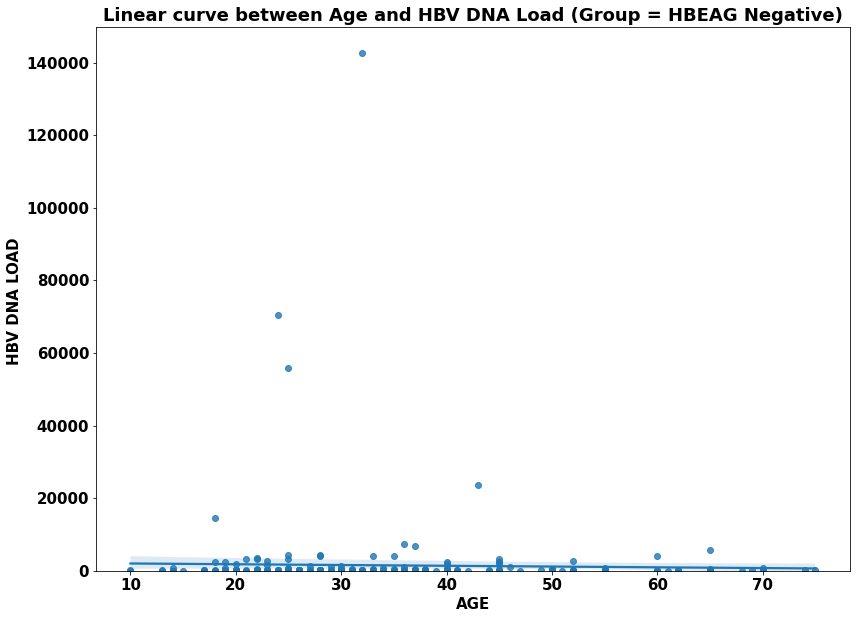

In [231]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(13.5,10))
sns.regplot(x='AGE', y='HBV DNA LOAD ', data=df_neg)
plt.title('Linear curve between Age and HBV DNA Load (Group = HBEAG Negative)', fontweight='bold')
plt.ylim(0,)
plt.savefig('reg_AGE_HBV_DNA_Load_HBEAG_NEgative.jpeg')

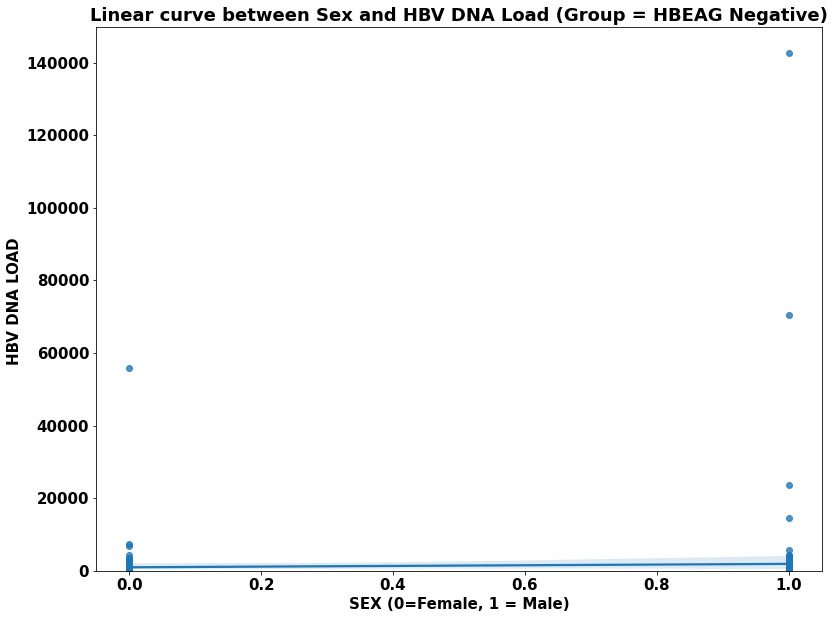

In [232]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(13,10))
sns.regplot(x='SEX', y='HBV DNA LOAD ', data=df_neg)
plt.title('Linear curve between Sex and HBV DNA Load (Group = HBEAG Negative)', fontweight='bold')
plt.xlabel('SEX (0=Female, 1 = Male)')
plt.ylim(0,)
plt.savefig('reg_Sex_HBV_DNA_Load_HBEAG_NEgative.jpeg')

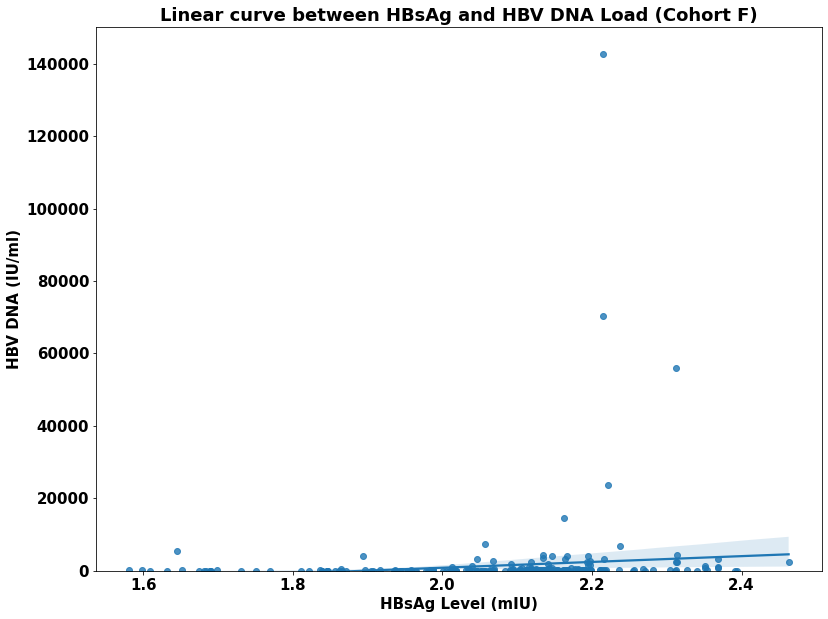

In [340]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(13,10))
sns.regplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_neg)
plt.title('Linear curve between HBsAg and HBV DNA Load (Cohort F)', fontweight='bold')
plt.xlabel('HBsAg Level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBSAG_HBV_DNA_Load_HBEAG_NEgative.jpeg')

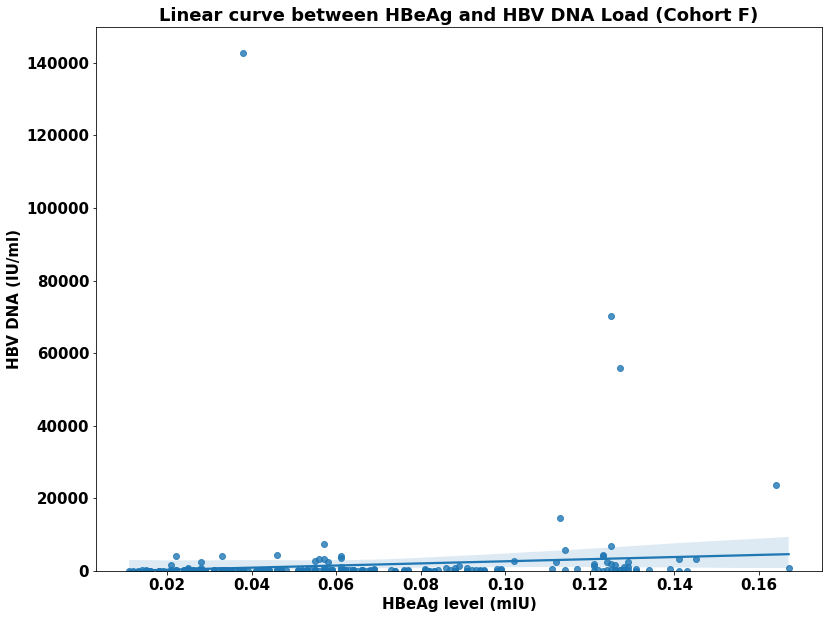

In [341]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(13,10))
sns.regplot(x='HBEAG -VE', y='HBV DNA LOAD ', data=df_neg)
plt.title('Linear curve between HBeAg and HBV DNA Load (Cohort F)', fontweight='bold')
plt.xlabel('HBeAg level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBEAG_HBV_DNA_Load_HBEAG_NEgative.jpeg')

### Residual Plots


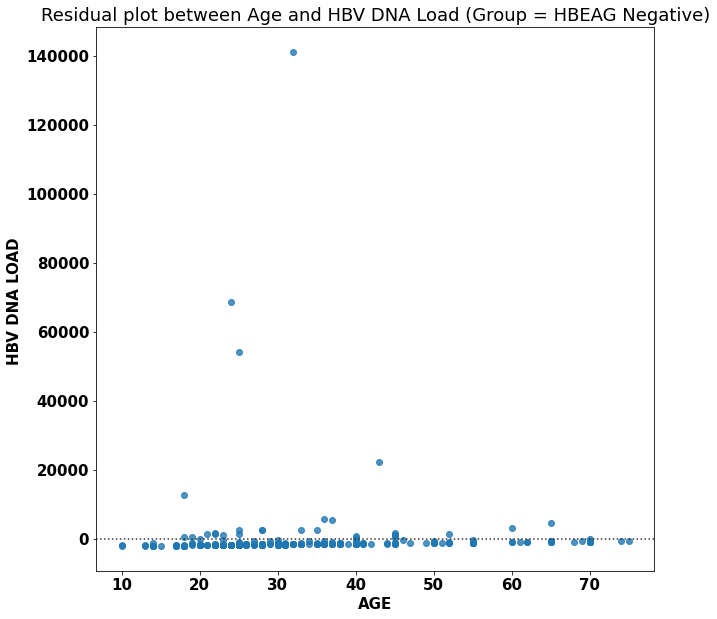

<Figure size 432x288 with 0 Axes>

In [235]:
plt.figure(figsize=(10,10))
sns.residplot(x='AGE', y='HBV DNA LOAD ', data=df_neg)
plt.title('Residual plot between Age and HBV DNA Load (Group = HBEAG Negative)')
plt.show()
plt.savefig('residual_AGE_HBV_HBEAG_negative.jpeg')

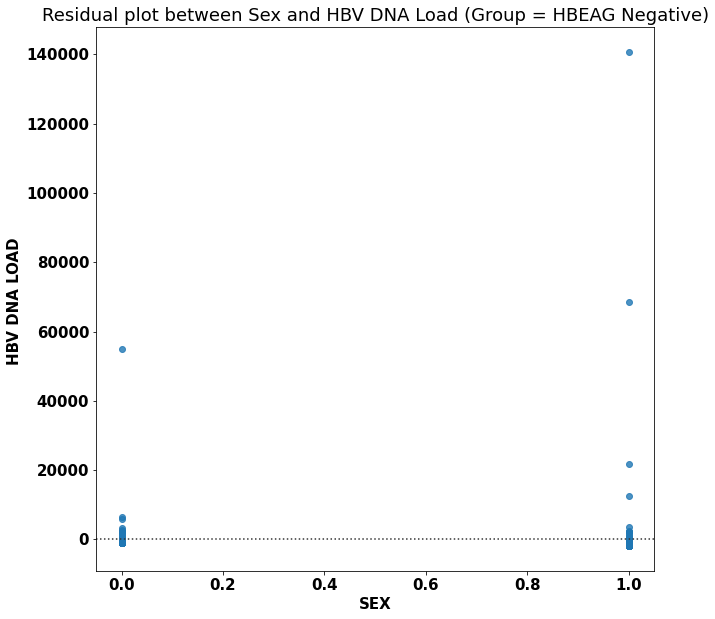

<Figure size 432x288 with 0 Axes>

In [236]:
plt.figure(figsize=(10,10))
sns.residplot(x='SEX', y='HBV DNA LOAD ', data=df_neg)
plt.title('Residual plot between Sex and HBV DNA Load (Group = HBEAG Negative)')
plt.show()
plt.savefig('residual_Sex_HBV_HBEAG_negative.jpeg')

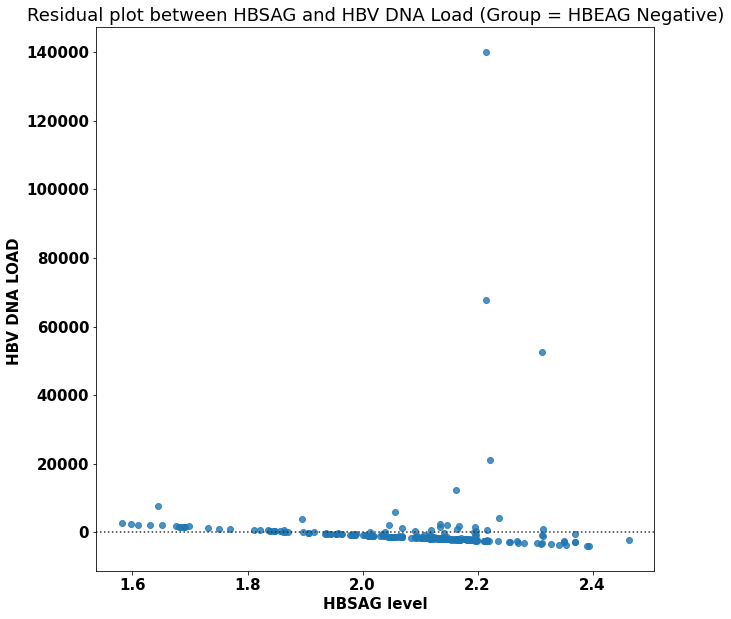

<Figure size 432x288 with 0 Axes>

In [237]:
plt.figure(figsize=(10,10))
sns.residplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_neg)
plt.title('Residual plot between HBSAG and HBV DNA Load (Group = HBEAG Negative)')
plt.xlabel('HBSAG level')
plt.show()
plt.savefig('residual_HBSAG_HBV_HBEAG_negative.jpeg')

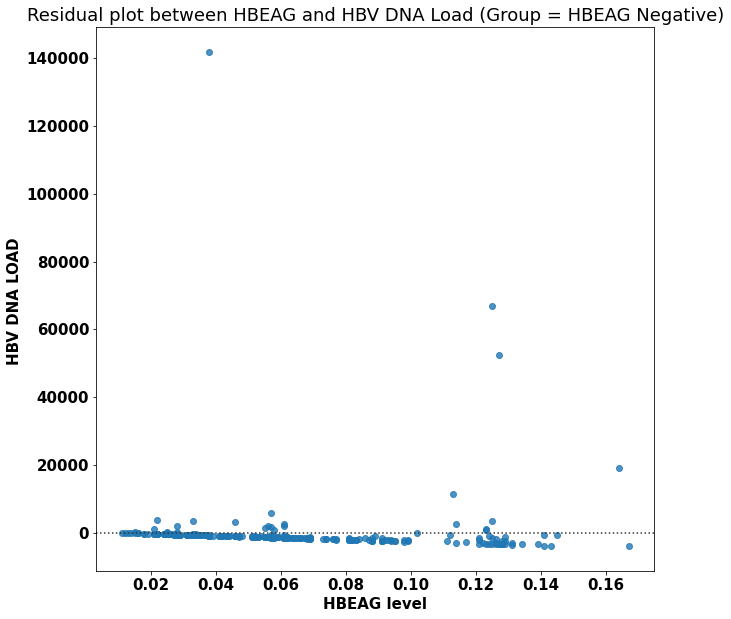

<Figure size 432x288 with 0 Axes>

In [238]:
plt.figure(figsize=(10,10))
sns.residplot(x='HBEAG -VE', y='HBV DNA LOAD ', data=df_neg)
plt.title('Residual plot between HBEAG and HBV DNA Load (Group = HBEAG Negative)')
plt.xlabel('HBEAG level')
plt.show()
plt.savefig('residual_HBEAG_HBV_HBEAG_negative.jpeg')

### Statistical Data



In [239]:
from scipy.stats import pearsonr
print('Two tailed sign between Age and HBSAG', pearsonr(df_neg['AGE'], df_neg['HBSAG +VE ']))
print('Two tailed sign between Age and HBEAG', pearsonr(df_neg['AGE'], df_neg['HBEAG -VE']))
print('Two tailed sign between Age and HBA DNA load', pearsonr(df_neg['AGE'], df_neg['HBV DNA LOAD ']))

print('Two tailed sign between HBSAG and Age', pearsonr(df_neg['HBSAG +VE '], df_neg['AGE']))
print('Two tailed sign between HBSAG and HBEAG', pearsonr(df_neg['HBSAG +VE '], df_neg['HBEAG -VE']))
print('Two tailed sign between HBSAG and HBA DNA load', pearsonr(df_neg['HBSAG +VE '], df_neg['HBV DNA LOAD ']))

print('Two tailed sign between HBEAG and Age', pearsonr(df_neg['HBEAG -VE'], df_neg['AGE']))
print('Two tailed sign between HBEAG and HBSAG', pearsonr(df_neg['HBEAG -VE'], df_neg['HBSAG +VE ']))
print('Two tailed sign between HBEAG and HBA DNA load', pearsonr(df_neg['HBEAG -VE'], df_neg['HBV DNA LOAD ']))

print('Two tailed sign between HBV DNA LOAD and Age', pearsonr(df_neg['HBV DNA LOAD '], df_neg['AGE']))
print('Two tailed sign between HBV DNA LOAD and HBEAG', pearsonr(df_neg['HBV DNA LOAD '], df_neg['HBEAG -VE']))
print('Two tailed sign between HBV DNA LOAD and HBSAG', pearsonr(df_neg['HBV DNA LOAD '], df_neg['HBSAG +VE ']))


Two tailed sign between Age and HBSAG (0.009908552342342034, 0.8686596294758945)
Two tailed sign between Age and HBEAG (0.055687248503152514, 0.35234559203458354)
Two tailed sign between Age and HBA DNA load (-0.02887400411274022, 0.6298347202949675)
Two tailed sign between HBSAG and Age (0.009908552342342034, 0.8686596294758945)
Two tailed sign between HBSAG and HBEAG (0.14335361962023385, 0.016182818144392104)
Two tailed sign between HBSAG and HBA DNA load (0.11847416227608286, 0.04724141401094382)
Two tailed sign between HBEAG and Age (0.055687248503152514, 0.35234559203458354)
Two tailed sign between HBEAG and HBSAG (0.14335361962023385, 0.016182818144392104)
Two tailed sign between HBEAG and HBA DNA load (0.10112932513684686, 0.09064211633755348)
Two tailed sign between HBV DNA LOAD and Age (-0.02887400411274022, 0.6298347202949675)
Two tailed sign between HBV DNA LOAD and HBEAG (0.10112932513684686, 0.09064211633755348)
Two tailed sign between HBV DNA LOAD and HBSAG (0.1184741622




#### Sum of squares and cross products



In [240]:
N_n = df_neg.shape
print(N_n)
### Sum of Squares of Age in Male patients
sum_age_neg = df_neg['AGE'].sum()
#print('sum of the age:', sum_age_neg)
sq_sum_age_neg = sum_age_neg**2
#print('square of the sum of age:', sq_sum_age_m)
sq_age_neg = df_neg['AGE']**2
sum_sq_age_neg = sq_age_neg.sum()
#print('sum of sq_age:', sum_sq_age_m)
ss_age_neg = sum_sq_age_neg-(sq_sum_age_neg/208)
print('sum of squares of age:', ss_age_neg)
### Sum of Squares of HBSAG among male patients
sum_HBSAG_neg = df_neg['HBSAG +VE '].sum()
#print('sum of the HBSAG:', sum_HBSAG_m)
sq_sum_HBSAG_neg = sum_HBSAG_neg**2
#print('square of the sum of HBSAG:', sq_sum_HBSAG_f)
sq_HBSAG_neg = df_neg['HBSAG +VE ']**2
sum_sq_HBSAG_neg = sq_HBSAG_neg.sum()
#print('sum of sq_HBSAG:', sum_sq_HBSAG_m)
ss_HBSAG_neg = sum_sq_HBSAG_neg-(sq_sum_HBSAG_neg/208)
print('sum of squares of HBSAG:', ss_HBSAG_neg)

### Sum of Squares of HBEAG among the male patients 
sum_HBEAG_neg = df_neg['HBEAG -VE'].sum()
#print('sum of the HBEAG:', sum_HBEAG_m)
sq_sum_HBEAG_neg = sum_HBEAG_neg**2
#print('square of the sum of HBEAG:', sq_sum_HBEAG_m)
sq_HBEAG_neg = df_neg['HBEAG -VE']**2
sum_sq_HBEAG_neg = sq_HBEAG_neg.sum()
#print('sum of sq_HBEAG:', sum_sq_HBEAG_m)
ss_HBEAG_neg = sum_sq_HBEAG_neg-(sq_sum_HBEAG_neg/208)
print('sum of squares of HBEAG:', ss_HBEAG_neg)

### Sum of squares of HBV DNA Load among male patients
sum_HBA_neg = df_neg['HBV DNA LOAD '].sum()
#print('sum of the HBA:', sum_HBA_m)
sq_sum_HBA_neg = sum_HBA_neg**2
#print('square of the sum of HBA:', sq_sum_HBA_m)
sq_HBA_neg = df_neg['HBV DNA LOAD ']**2
sum_sq_HBA_neg = sq_HBA_neg.sum()
#print('sum of sq_HBA:', sum_sq_HBA_m)
ss_HBA_neg = sum_sq_HBA_neg-(sq_sum_HBA_neg/208)
print('sum of squares of HBA:', ss_HBA_neg)



(281, 5)
sum of squares of age: -55619.12019230769
sum of squares of HBSAG: -422.35743525
sum of squares of HBEAG: -0.040288480769231194
sum of squares of HBA: 28675809033.755196


### Cross Products



In [241]:
df_neg.head()

,AGE,SEX,HBSAG +VE,HBEAG -VE,HBV DNA LOAD
0,31,1,2.105,0.029,3.8
1,36,0,2.057,0.057,7350.0
2,25,0,1.731,0.024,3.8
3,44,1,1.846,0.062,3.8
4,25,1,1.631,0.034,3.8


In [242]:
df_neg.drop(labels=[284], axis=0, inplace=True)

In [243]:

df_neg_age_np4 = np.array(df_neg['AGE'])
df_neg_age_np = df_neg_age_np4.reshape(140,2)
df_neg_hbsag_np4 = np.array(df_neg['HBSAG +VE '])
df_neg_hbsag_np = df_neg_hbsag_np4.reshape(140,2)
df_neg_hbeag_np4 = np.array(df_neg['HBEAG -VE'])
df_neg_hbeag_np = df_neg_hbeag_np4.reshape(140,2)
df_neg_hba_np4 = np.array(df_neg['HBV DNA LOAD '])
df_neg_hba_np = df_neg_hba_np4.reshape(140,2)




In [244]:


cross_prod_age_hbsag_neg = np.cross(df_neg_age_np, df_neg_hbsag_np)
print('cross product between AGE and HBSAG:', cross_prod_age_hbsag_neg.sum()**2)
cross_prod_age_hbeag_neg = np.cross(df_neg_age_np, df_neg_hbeag_np)
print('cross product between AGE and HBEAG:', cross_prod_age_hbeag_neg.sum()**2)
cross_prod_age_hba_neg = np.cross(df_neg_age_np, df_neg_hba_np)
print('cross product between AGE and HBV DNA Load:', cross_prod_age_hba_neg.sum()**2)
cross_prod_hbsag_hbeag_neg = np.cross(df_neg_hbeag_np, df_neg_hbsag_np)
print('cross product between HBSAG and HBEAG:', cross_prod_hbsag_hbeag_neg.sum()**2)
cross_prod_hbsag_hba_neg = np.cross(df_neg_hbsag_np, df_neg_hba_np)
print('cross product between HBSAG and HBV DNA LOAD:', cross_prod_hbsag_hba_neg.sum()**2)
cross_prod_hbeag_hba_neg = np.cross(df_neg_hbeag_np, df_neg_hba_np)
print('cross product between HBEAG and HBA:', cross_prod_hbeag_hba_neg.sum()**2)


cross product between AGE and HBSAG: 183721.1051290002
cross product between AGE and HBEAG: 1245.4546810000008
cross product between AGE and HBV DNA Load: 484682465433.9605
cross product between HBSAG and HBEAG: 0.9374925705639988
cross product between HBSAG and HBV DNA LOAD: 77130106609.63414
cross product between HBEAG and HBA: 27339355.97702501


### Covariance matrix



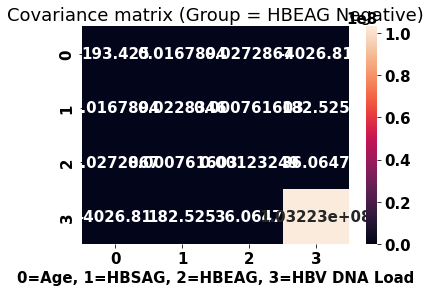

<Figure size 432x288 with 0 Axes>

In [245]:

df_neg_np = np.array([df_neg_age_np4, df_neg_hbsag_np4, df_neg_hbeag_np4, df_neg_hba_np4])
df_neg_np.shape

df_neg_cov = np.cov(df_neg_np, bias = True)
plt.title('Covariance matrix (Group = HBEAG Negative)')


sns.heatmap(df_neg_cov, annot=True, fmt='g')
plt.xlabel('0=Age, 1=HBSAG, 2=HBEAG, 3=HBV DNA Load')
plt.show()
plt.savefig('covariance_matrix_HBEAG_Negative.jpeg')

### Cohort F (HBEAG positive)



In [250]:
data_pos = pd.read_excel('data_positive.xlsx')



In [251]:
data_pos.head()

,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,35,M,2.207,2.013,27784750
1,30,M,2.481,2.168,225573629
2,24,M,2.397,1.891,20737375
3,55,F,2.139,1.689,96200
4,20,F,1.986,2.115,2537


In [252]:
data_pos.info()

data_pos.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            60 non-null     int64  
 1   SEX            60 non-null     object 
 2   HBSAG +VE      60 non-null     float64
 3   HBEAG +VE      60 non-null     float64
 4   HBV DNA LOAD   60 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.5+ KB


Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')

In [253]:
db_pos = data_pos.replace("M", "Male")
db_pos = db_pos.replace("M ", "Male")
db_pos = db_pos.replace("F", "Female")
db_pos = db_pos.replace("F ", "Female")



In [254]:
db_pos.shape



(60, 5)

In [255]:


db_pos['SEX '] = db_pos['SEX '].fillna('Male')


db_pos.head()



,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,35,Male,2.207,2.013,27784750
1,30,Male,2.481,2.168,225573629
2,24,Male,2.397,1.891,20737375
3,55,Female,2.139,1.689,96200
4,20,Female,1.986,2.115,2537


### Encoding Gender



In [256]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
db_pos.loc[:,'SEX '] = le.transform(db_pos['SEX '])


db_pos.head()



,AGE,SEX,HBSAG +VE,HBEAG +VE,HBV DNA LOAD
0,35,1,2.207,2.013,27784750
1,30,1,2.481,2.168,225573629
2,24,1,2.397,1.891,20737375
3,55,0,2.139,1.689,96200
4,20,0,1.986,2.115,2537


In [257]:
z = np.abs(stats.zscore(db_pos))

In [258]:
db_pos_clean = db_pos[(z<3).all(axis=1)]

In [259]:
db_pos_clean.shape

(58, 5)

### Interquartile range method



In [260]:


Q1 = db_pos.quantile(q=.25)
Q3 = db_pos.quantile(q=.75)
IQR = db_pos.apply(stats.iqr)

db_clean_iq_pos = db_pos[~((db_pos < (Q1-1.5*IQR)) | (db_pos > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_pos.shape




(44, 5)



### Copy  the data



In [261]:


df_pos = db_pos_clean.copy()






### Descriptive Analysis




In [262]:

df_pos_table = df_pos.describe()
df_pos_table.to_csv('HBSAG_pos_table_describe.csv')
print(df_pos.describe())

print('columns:', df_pos.columns)



            AGE        SEX   HBSAG +VE   HBEAG +VE   HBV DNA LOAD 
count  58.000000  58.000000   58.000000   58.000000   5.800000e+01
mean   40.379310   0.741379    2.253897    2.122759   4.075036e+07
std    20.247441   0.441701    0.103798    0.255007   6.329566e+07
min    10.000000   0.000000    1.986000    1.126000   2.537000e+03
25%    20.250000   0.250000    2.168000    2.063250   5.028000e+05
50%    38.000000   1.000000    2.255000    2.168000   1.576178e+07
75%    55.000000   1.000000    2.328750    2.252750   4.506941e+07
max    80.000000   1.000000    2.481000    2.946000   2.607151e+08
columns: Index(['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD '], dtype='object')


### Exploratory Analysis




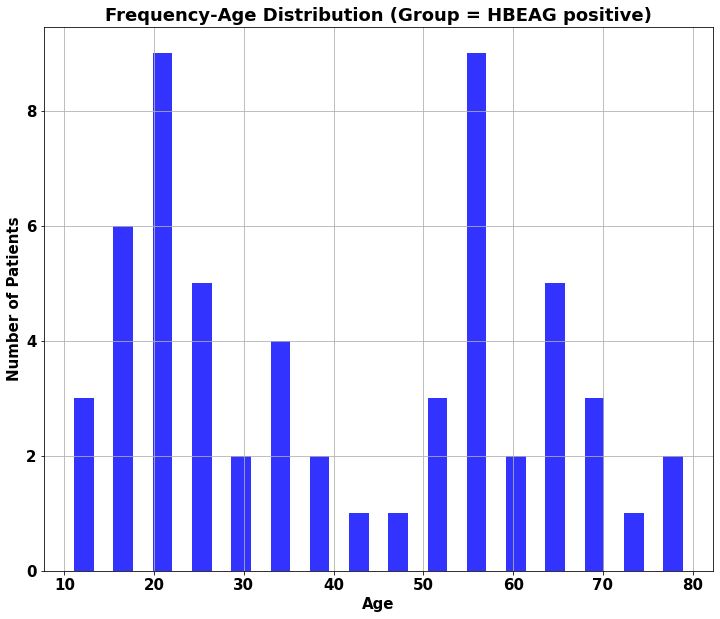

In [263]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_pos['AGE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution (Group = HBEAG positive)', fontweight='bold')
plt.grid(True)
plt.savefig('Age_distribution_HBEAG_positive.jpeg')
plt.show()

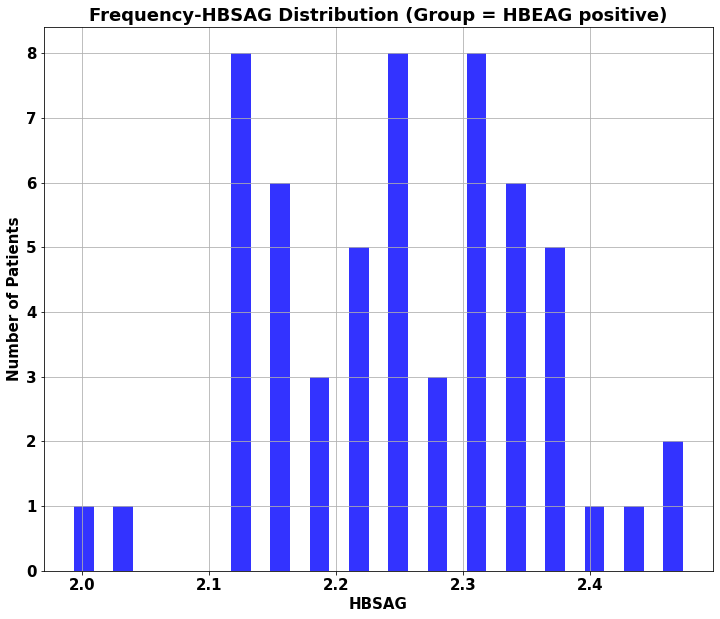

In [264]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_pos['HBSAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBSAG')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBSAG Distribution (Group = HBEAG positive)', fontweight='bold')
plt.grid(True)
plt.savefig('HBSAG_distribution_HBEAG_positive.jpeg')
plt.show()

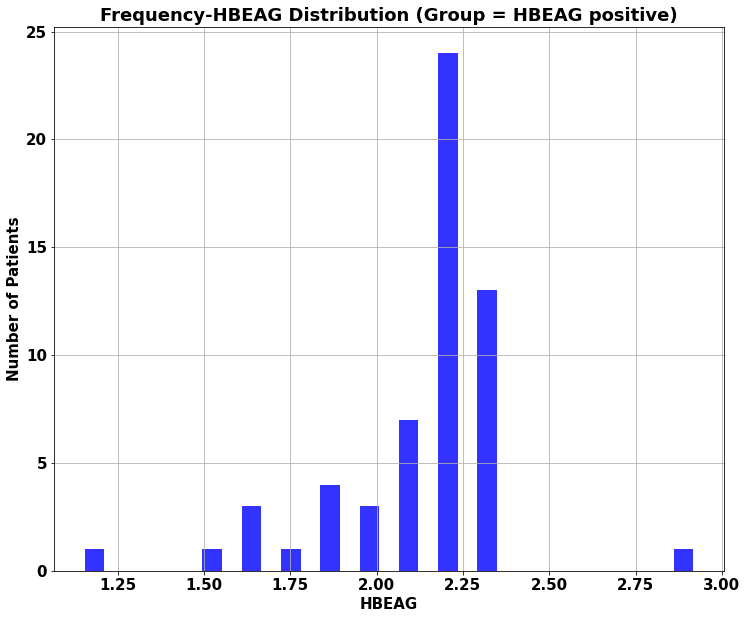

In [265]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_pos['HBEAG +VE '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBEAG')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBEAG Distribution (Group = HBEAG positive)', fontweight='bold')
plt.grid(True)
plt.savefig('HBEAG_distribution_HBEAG_positive.jpeg')
plt.show()

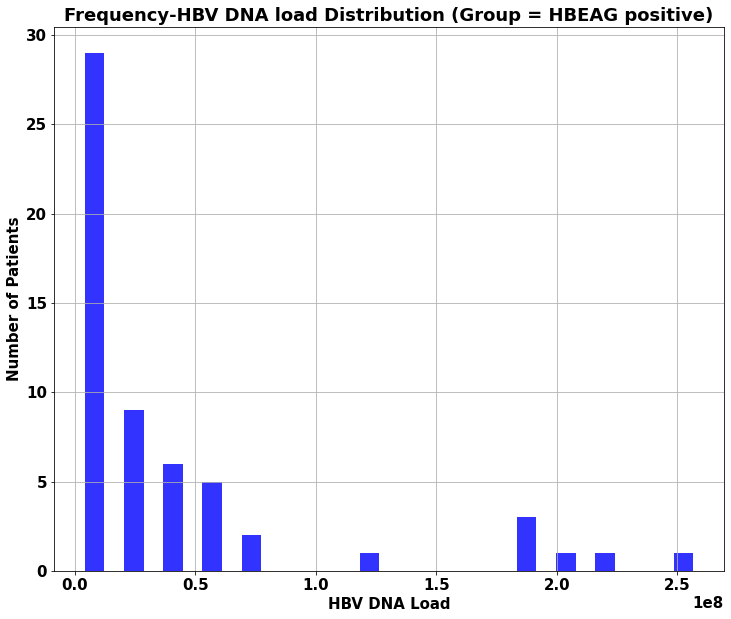

In [266]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))
plt.hist(df_pos['HBV DNA LOAD '], bins = 16, align = 'mid', rwidth = 0.5, color = 'blue', alpha = 0.8)
plt.xlabel('HBV DNA Load')
plt.ylabel('Number of Patients')
plt.title('Frequency-HBV DNA load Distribution (Group = HBEAG positive)', fontweight='bold')
plt.grid(True)
plt.savefig('HBV_distribution_HBEAG_positive.jpeg')
plt.show()

### Multiple regression (Group HBEAG positive)



In [267]:


mr_pos = LinearRegression()
x_pos = df_pos[['AGE ', 'SEX ', 'HBSAG +VE ', 'HBEAG +VE ']]
y_pos = df_pos['HBV DNA LOAD ']
mr_pos.fit(x_pos,y_pos)



LinearRegression()

In [268]:
print('intercept:', mr_pos.intercept_)

print('Coefficient:', mr_pos.coef_)




intercept: -488045635.26273376
Coefficient: [-1.46814026e+05 -7.16629252e+06  1.86553876e+08  5.63248450e+07]






### Correlation Matrix



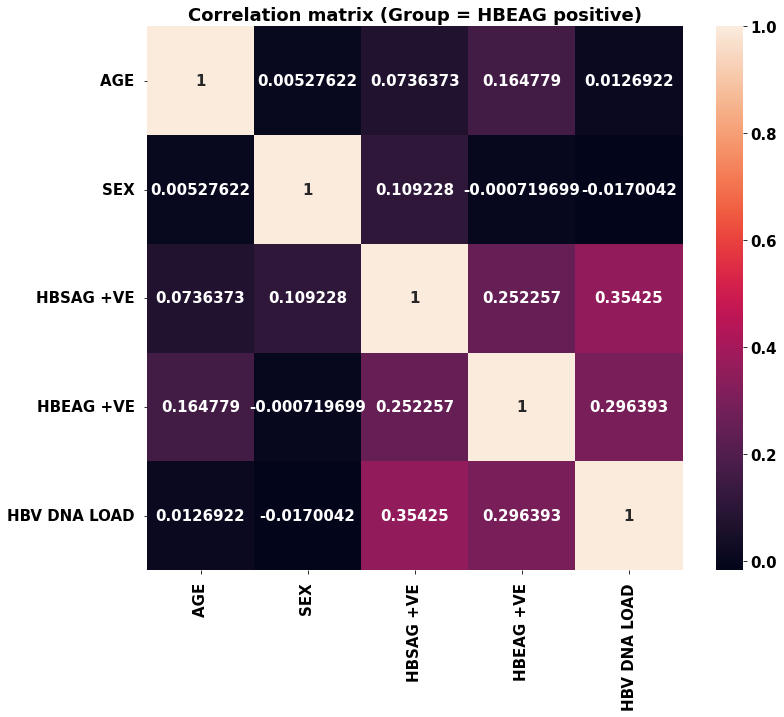

<Figure size 432x288 with 0 Axes>

In [269]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(figsize=(12, 10))

df_pos_corr = df_pos[['AGE ', "SEX ", 'HBSAG +VE ', 'HBEAG +VE ', 'HBV DNA LOAD ']].corr()
sns.heatmap(df_pos_corr, annot=True, fmt='g')
plt.title('Correlation matrix (Group = HBEAG positive)', fontweight='bold')
plt.show()
plt.savefig('Correlation_matrix_HBEAG_positive.jpeg')



### Visualization



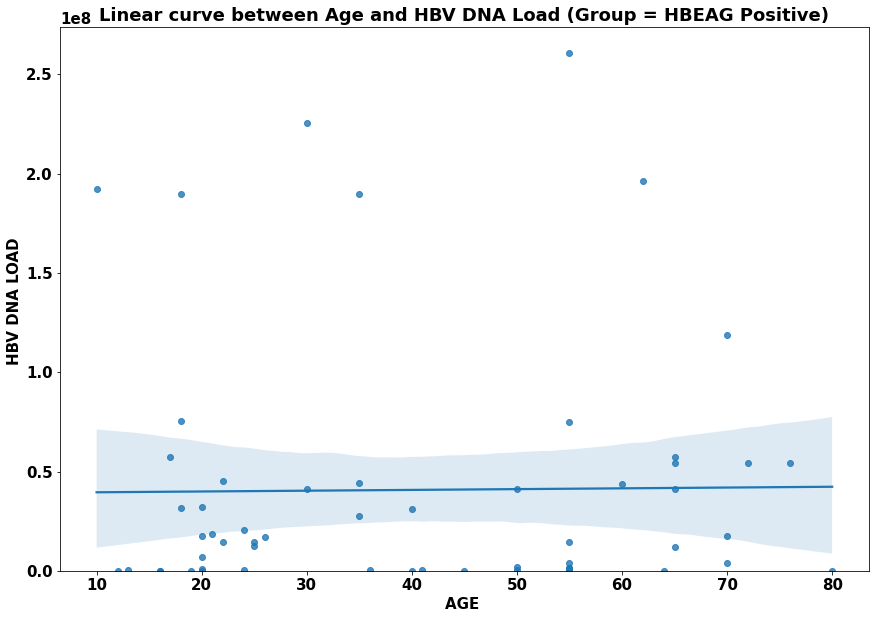

In [270]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"



plt.figure(figsize=(14.5,10))
sns.regplot(x='AGE ', y='HBV DNA LOAD ', data=df_pos)
plt.title('Linear curve between Age and HBV DNA Load (Group = HBEAG Positive)', fontweight='bold')
plt.ylim(0,)
plt.savefig('reg_AGE_HBV_DNA_Load_HBEAG_positive.jpeg')

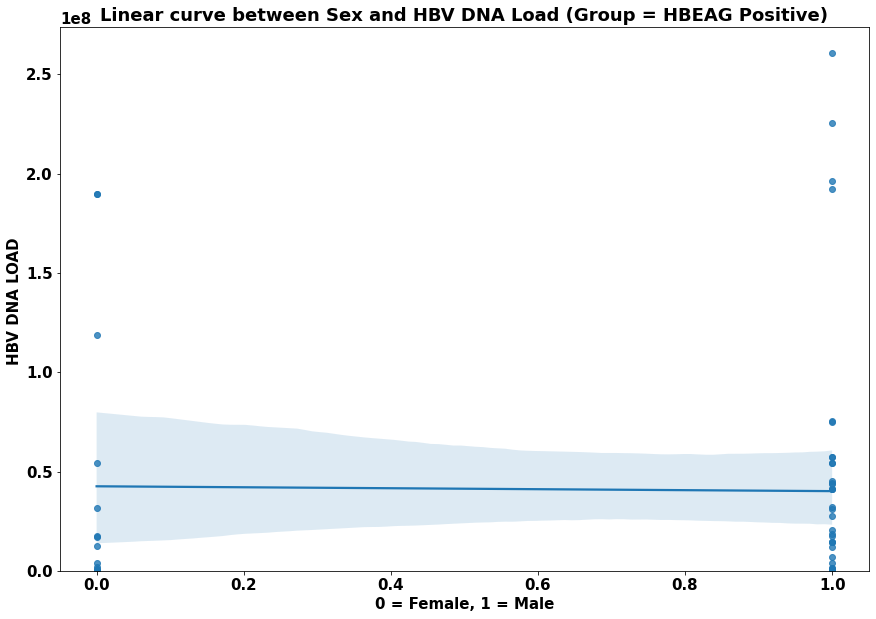

In [271]:

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14.5,10))
sns.regplot(x='SEX ', y='HBV DNA LOAD ', data=df_pos)
plt.title('Linear curve between Sex and HBV DNA Load (Group = HBEAG Positive)', fontweight='bold')
plt.xlabel('0 = Female, 1 = Male')
plt.ylim(0,)
plt.savefig('reg_Sex_HBV_DNA_Load_HBEAG_positive.jpeg')

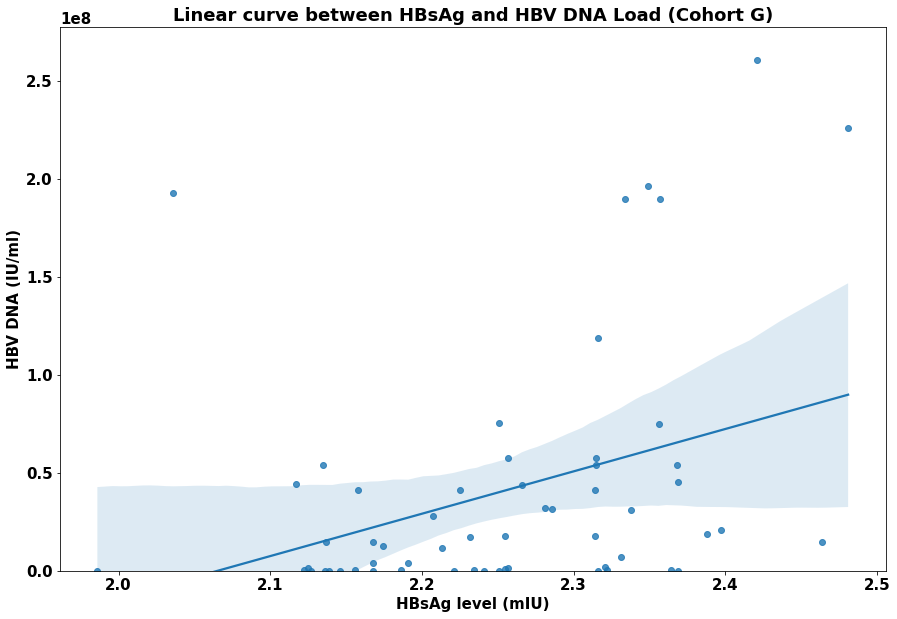

In [342]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14.8,10))
sns.regplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_pos)
plt.title('Linear curve between HBsAg and HBV DNA Load (Cohort G)', fontweight='bold')
plt.xlabel('HBsAg level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBSAG_HBV_DNA_Load_HBEAG_positive.jpeg')

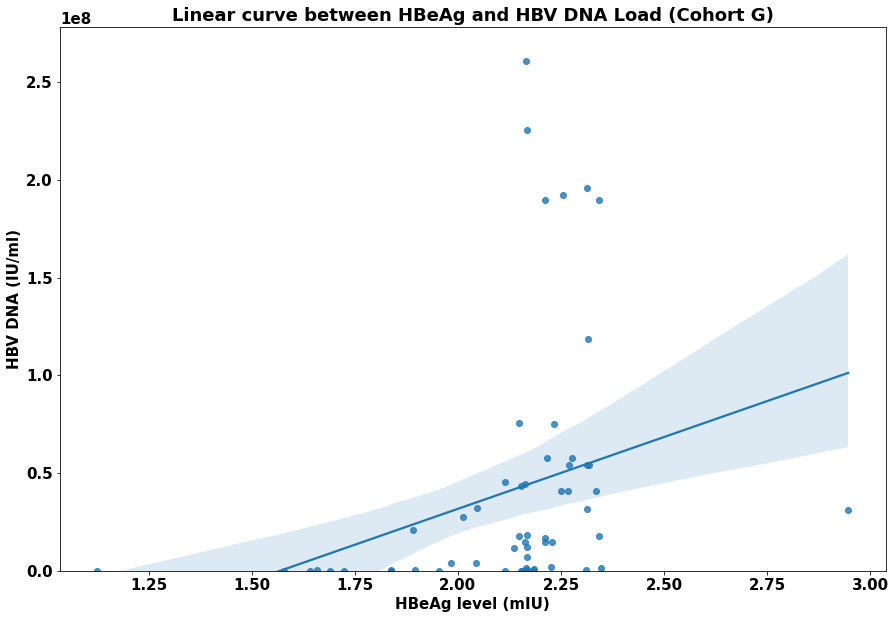

In [343]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


plt.figure(figsize=(14.8,10))
sns.regplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_pos)
plt.title('Linear curve between HBeAg and HBV DNA Load (Cohort G)', fontweight='bold')
plt.xlabel('HBeAg level (mIU)')
plt.ylabel('HBV DNA (IU/ml)')
plt.ylim(0,)
plt.savefig('reg_HBEAG_HBV_DNA_Load_HBEAG_positive.jpeg')

### Residual Plots



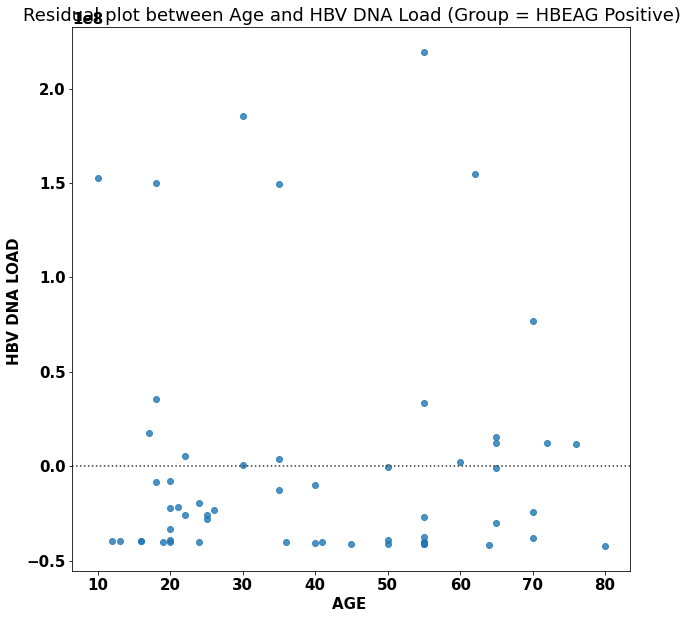

<Figure size 432x288 with 0 Axes>

In [274]:

plt.figure(figsize=(10,10))
sns.residplot(x='AGE ', y='HBV DNA LOAD ', data=df_pos)
plt.title('Residual plot between Age and HBV DNA Load (Group = HBEAG Positive)')
plt.show()
plt.savefig('residual_AGE_HBV_HBEAG_positive.jpeg')



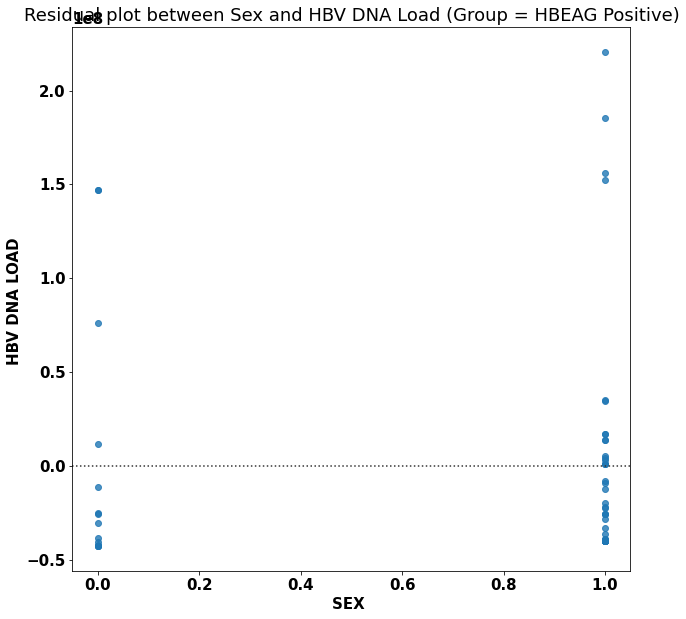

<Figure size 432x288 with 0 Axes>

In [275]:
plt.figure(figsize=(10,10))
sns.residplot(x='SEX ', y='HBV DNA LOAD ', data=df_pos)
plt.title('Residual plot between Sex and HBV DNA Load (Group = HBEAG Positive)')
plt.show()
plt.savefig('residual_Sex_HBV_HBEAG_positive.jpeg')



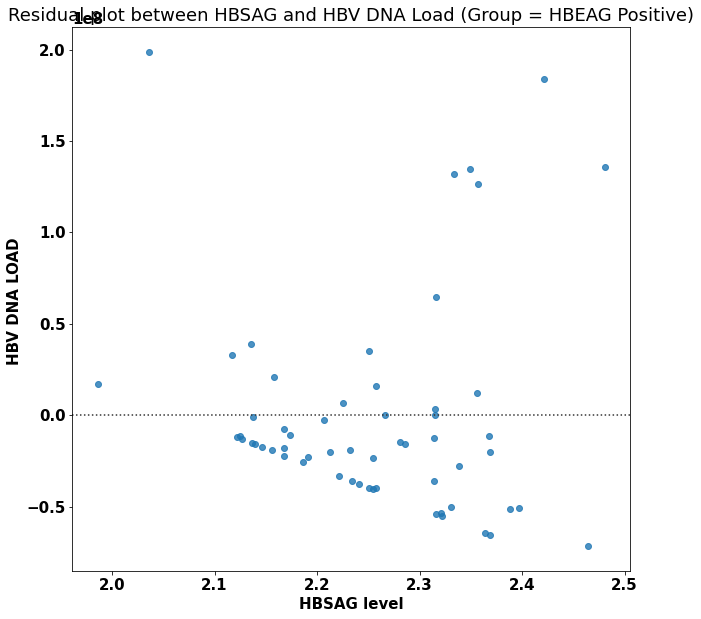

<Figure size 432x288 with 0 Axes>

In [276]:
plt.figure(figsize=(10,10))
sns.residplot(x='HBSAG +VE ', y='HBV DNA LOAD ', data=df_pos)
plt.title('Residual plot between HBSAG and HBV DNA Load (Group = HBEAG Positive)')
plt.xlabel('HBSAG level')
plt.show()
plt.savefig('residual_HBSAG_HBV_HBEAG_possitive.jpeg')



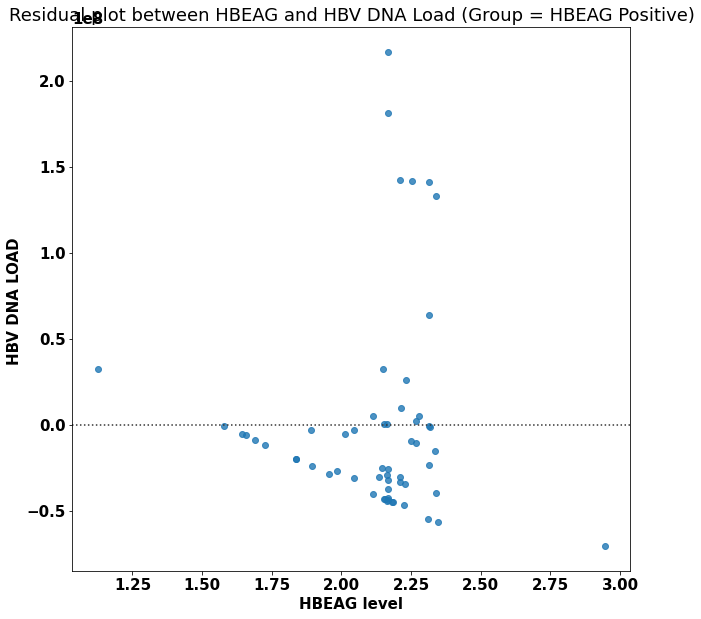

<Figure size 432x288 with 0 Axes>

In [277]:
plt.figure(figsize=(10,10))
sns.residplot(x='HBEAG +VE ', y='HBV DNA LOAD ', data=df_pos)
plt.title('Residual plot between HBEAG and HBV DNA Load (Group = HBEAG Positive)')
plt.xlabel('HBEAG level')
plt.show()
plt.savefig('residual_HBEAG_HBV_HBEAG_positive.jpeg')

### Statistical Data



In [278]:


from scipy.stats import pearsonr
print('Two tailed sign between Age and HBSAG', pearsonr(df_pos['AGE '], df_pos['HBSAG +VE ']))
print('Two tailed sign between Age and HBEAG', pearsonr(df_pos['AGE '], df_pos['HBEAG +VE ']))
print('Two tailed sign between Age and HBA DNA load', pearsonr(df_pos['AGE '], df_pos['HBV DNA LOAD ']))

print('Two tailed sign between HBSAG and Age', pearsonr(df_pos['HBSAG +VE '], df_pos['AGE ']))
print('Two tailed sign between HBSAG and HBEAG', pearsonr(df_pos['HBSAG +VE '], df_pos['HBEAG +VE ']))
print('Two tailed sign between HBSAG and HBA DNA load', pearsonr(df_pos['HBSAG +VE '], df_pos['HBV DNA LOAD ']))

print('Two tailed sign between HBEAG and Age', pearsonr(df_pos['HBEAG +VE '], df_pos['AGE ']))
print('Two tailed sign between HBEAG and HBSAG', pearsonr(df_pos['HBEAG +VE '], df_pos['HBSAG +VE ']))
print('Two tailed sign between HBEAG and HBA DNA load', pearsonr(df_pos['HBEAG +VE '], df_pos['HBV DNA LOAD ']))

print('Two tailed sign between HBV DNA LOAD and Age', pearsonr(df_pos['HBV DNA LOAD '], df_pos['AGE ']))
print('Two tailed sign between HBV DNA LOAD and HBEAG', pearsonr(df_pos['HBV DNA LOAD '], df_pos['HBEAG +VE ']))
print('Two tailed sign between HBV DNA LOAD and HBSAG', pearsonr(df_pos['HBV DNA LOAD '], df_pos['HBSAG +VE ']))



Two tailed sign between Age and HBSAG (0.07363734847417142, 0.5827693838484355)
Two tailed sign between Age and HBEAG (0.16477916067105494, 0.21643156726267312)
Two tailed sign between Age and HBA DNA load (0.012692160782523991, 0.9246641634995775)
Two tailed sign between HBSAG and Age (0.07363734847417142, 0.5827693838484355)
Two tailed sign between HBSAG and HBEAG (0.25225653137152276, 0.056091050610964074)
Two tailed sign between HBSAG and HBA DNA load (0.354249640696919, 0.006367267704778994)
Two tailed sign between HBEAG and Age (0.16477916067105494, 0.21643156726267312)
Two tailed sign between HBEAG and HBSAG (0.25225653137152276, 0.056091050610964074)
Two tailed sign between HBEAG and HBA DNA load (0.2963925417623997, 0.023874295417982364)
Two tailed sign between HBV DNA LOAD and Age (0.012692160782523991, 0.9246641634995775)
Two tailed sign between HBV DNA LOAD and HBEAG (0.2963925417623997, 0.023874295417982364)
Two tailed sign between HBV DNA LOAD and HBSAG (0.354249640696919





#### Sum of squares and cross products



In [279]:


N_p = df_pos.shape
print(N_p)
### Sum of Squares of Age in Male patients
sum_age_pos = df_pos['AGE '].sum()
#print('sum of the age:', sum_age_neg)
sq_sum_age_pos = sum_age_pos**2
#print('square of the sum of age:', sq_sum_age_m)
sq_age_pos = df_pos['AGE ']**2
sum_sq_age_pos = sq_age_pos.sum()
#print('sum of sq_age:', sum_sq_age_m)
ss_age_pos = sum_sq_age_pos-(sq_sum_age_pos/44)
print('sum of squares of age:', ss_age_pos)
### Sum of Squares of HBSAG among male patients
sum_HBSAG_pos = df_pos['HBSAG +VE '].sum()
#print('sum of the HBSAG:', sum_HBSAG_m)
sq_sum_HBSAG_pos = sum_HBSAG_pos**2
#print('square of the sum of HBSAG:', sq_sum_HBSAG_f)
sq_HBSAG_pos = df_pos['HBSAG +VE ']**2
sum_sq_HBSAG_pos = sq_HBSAG_pos.sum()
#print('sum of sq_HBSAG:', sum_sq_HBSAG_m)
ss_HBSAG_pos = sum_sq_HBSAG_pos-(sq_sum_HBSAG_pos/44)
print('sum of squares of HBSAG:', ss_HBSAG_pos)

### Sum of Squares of HBEAG among the male patients 
sum_HBEAG_pos = df_pos['HBEAG +VE '].sum()
#print('sum of the HBEAG:', sum_HBEAG_m)
sq_sum_HBEAG_pos = sum_HBEAG_pos**2
#print('square of the sum of HBEAG:', sq_sum_HBEAG_m)
sq_HBEAG_pos = df_pos['HBEAG +VE ']**2
sum_sq_HBEAG_pos = sq_HBEAG_pos.sum()
#print('sum of sq_HBEAG:', sum_sq_HBEAG_m)
ss_HBEAG_pos = sum_sq_HBEAG_pos-(sq_sum_HBEAG_pos/44)
print('sum of squares of HBEAG:', ss_HBEAG_pos)

### Sum of squares of HBV DNA Load among male patients
sum_HBA_pos = df_pos['HBV DNA LOAD '].sum()
#print('sum of the HBA:', sum_HBA_m)
sq_sum_HBA_pos = sum_HBA_pos**2
#print('square of the sum of HBA:', sq_sum_HBA_m)
sq_HBA_pos = df_pos['HBV DNA LOAD ']**2
sum_sq_HBA_pos = sq_HBA_pos.sum()
#print('sum of sq_HBA:', sum_sq_HBA_m)
ss_HBA_pos = sum_sq_HBA_pos-(sq_sum_HBA_pos/44)
print('sum of squares of HBA:', ss_HBA_pos)





(58, 5)
sum of squares of age: -6722.272727272721
sum of squares of HBSAG: -93.1358900909089
sum of squares of HBEAG: -79.45146945454547
sum of squares of HBA: 1.977159718672626e+17


### Cross Products



In [280]:



df_pos_age_np4 = np.array(df_pos['AGE '])
df_pos_age_np = df_pos_age_np4.reshape(29,2)
df_pos_hbsag_np4 = np.array(df_pos['HBSAG +VE '])
df_pos_hbsag_np = df_pos_hbsag_np4.reshape(29,2)
df_pos_hbeag_np4 = np.array(df_pos['HBEAG +VE '])
df_pos_hbeag_np = df_pos_hbeag_np4.reshape(29,2)
df_pos_hba_np4 = np.array(df_pos['HBV DNA LOAD '])
df_pos_hba_np = df_pos_hba_np4.reshape(29,2)





In [281]:



cross_prod_age_hbsag_pos = np.cross(df_pos_age_np, df_pos_hbsag_np)
print('cross product between AGE and HBSAG:', cross_prod_age_hbsag_pos.sum()**2)
cross_prod_age_hbeag_pos = np.cross(df_pos_age_np, df_pos_hbeag_np)
print('cross product between AGE and HBEAG:', cross_prod_age_hbeag_pos.sum()**2)
cross_prod_age_hba_pos = np.cross(df_pos_age_np, df_pos_hba_np)
print('cross product between AGE and HBV DNA Load:', cross_prod_age_hba_pos.sum()**2)
cross_prod_hbsag_hbeag_pos = np.cross(df_pos_hbeag_np, df_pos_hbsag_np)
print('cross product between HBSAG and HBEAG:', cross_prod_hbsag_hbeag_pos.sum()**2)
cross_prod_hbsag_hba_pos = np.cross(df_pos_hbsag_np, df_pos_hba_np)
print('cross product between HBSAG and HBV DNA LOAD:', cross_prod_hbsag_hba_pos.sum()**2)
cross_prod_hbeag_hba_pos = np.cross(df_pos_hbeag_np, df_pos_hba_np)
print('cross product between HBEAG and HBA:', cross_prod_hbeag_hba_pos.sum()**2)




cross product between AGE and HBSAG: 72720.29088899995
cross product between AGE and HBEAG: 70721.95609600002
cross product between AGE and HBV DNA Load: 7301174781767282576
cross product between HBSAG and HBEAG: 1.3886619122249921
cross product between HBSAG and HBV DNA LOAD: 1.1059120731442678e+18
cross product between HBEAG and HBA: 1.0615427359988091e+18


### Covariance matrix





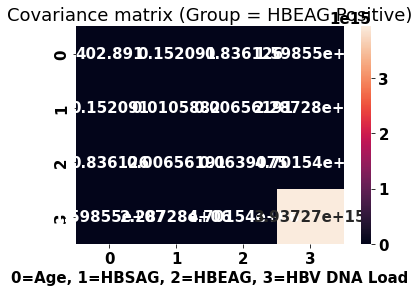

<Figure size 432x288 with 0 Axes>

In [282]:

df_pos_np = np.array([df_pos_age_np4, df_pos_hbsag_np4, df_pos_hbeag_np4, df_pos_hba_np4])
df_pos_np.shape

df_pos_cov = np.cov(df_pos_np, bias = True)
plt.title('Covariance matrix (Group = HBEAG Positive)')


sns.heatmap(df_pos_cov, annot=True, fmt='g')
plt.xlabel('0=Age, 1=HBSAG, 2=HBEAG, 3=HBV DNA Load')
plt.show()
plt.savefig('covariance_matrix_HBEAG_positive.jpeg')

## Comparative_data_Analysis_cohorts_age



In [283]:
data_cohort_age = pd.read_excel('comp_data.xlsx', sheet_name='age')
data_cohort_age.head



<bound method NDFrame.head of      Cohort A  cohort B  cohort C  cohort D  cohort E  cohort F  cohort G
0        36.0      31.0      10.0      26.0      51.0        31      35.0
1        25.0      44.0      10.0      26.0      52.0        36      30.0
2        31.0      25.0      10.0      26.0      52.0        25      24.0
3        37.0      24.0      12.0      26.0      52.0        44      55.0
4        38.0      30.0      12.0      26.0      52.0        25      20.0
..        ...       ...       ...       ...       ...       ...       ...
284       NaN       NaN       NaN       NaN       NaN        45       NaN
285       NaN       NaN       NaN       NaN       NaN        32       NaN
286       NaN       NaN       NaN       NaN       NaN        30       NaN
287       NaN       NaN       NaN       NaN       NaN        30       NaN
288       NaN       NaN       NaN       NaN       NaN        20       NaN

[289 rows x 7 columns]>

In [284]:
data_cohort_age.describe()

,Cohort A,cohort B,cohort C,cohort D,cohort E,cohort F,cohort G
count,139.000000,210.000000,128.000000,163.000000,58.000000,289.000000,60.000000
mean,32.863309,35.723810,20.789062,35.294479,63.034483,33.529412,39.900000
std,14.060532,16.488938,3.867190,6.863693,8.241882,14.305205,20.071651
min,10.000000,10.000000,10.000000,26.000000,51.000000,10.000000,10.000000
25%,24.000000,23.250000,18.000000,30.000000,55.000000,24.000000,20.750000
50%,28.000000,31.500000,22.000000,35.000000,64.500000,30.000000,35.500000
75%,39.000000,45.000000,24.000000,40.000000,70.000000,40.000000,55.000000
max,92.000000,80.000000,25.000000,50.000000,92.000000,92.000000,80.000000


In [285]:
z = np.abs(stats.zscore(data_cohort_age))

In [286]:
db_cohort_clean = data_cohort_age[(z<3).all(axis=1)]

In [287]:
db_cohort_clean.shape

(0, 7)

### Interquartile range method





In [288]:


Q1 = data_cohort_age.quantile(q=.25)
Q3 = data_cohort_age.quantile(q=.75)
IQR = data_cohort_age.apply(stats.iqr)

db_clean_iq_cohort_age = data_cohort_age[~((data_cohort_age < (Q1-1.5*IQR)) | (data_cohort_age > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_cohort_age.shape




(270, 7)





### Copy  the data




In [289]:




df_cohort_age = data_cohort_age.copy()




In [290]:
import researchpy as rp
age_cohort_summ = rp.summary_cont(df_cohort_age)
age_cohort_summ.to_csv('age_cohort_summary.csv')
print(age_cohort_summ)





   Variable      N     Mean       SD      SE  95% Conf.  Interval
0  Cohort A  139.0  32.8633  14.0605  1.1926    30.5052   35.2214
1  cohort B  210.0  35.7238  16.4889  1.1378    33.4807   37.9669
2  cohort C  128.0  20.7891   3.8672  0.3418    20.1127   21.4655
3  cohort D  163.0  35.2945   6.8637  0.5376    34.2329   36.3561
4  cohort E   58.0  63.0345   8.2419  1.0822    60.8674   65.2016
5  cohort F  289.0  33.5294  14.3052  0.8415    31.8732   35.1856
6  cohort G   60.0  39.9000  20.0717  2.5912    34.7149   45.0851


In [291]:
db_cohort_age = df_cohort_age.fillna(df_cohort_age.mean())



In [292]:
from scipy.stats import f_oneway

f_oneway(db_cohort_age['Cohort A'], db_cohort_age['cohort B'], db_cohort_age['cohort C'], db_cohort_age['cohort D'],
        db_cohort_age['cohort E'], db_cohort_age['cohort F'], db_cohort_age['cohort G'])



F_onewayResult(statistic=529.1475184994144, pvalue=0.0)

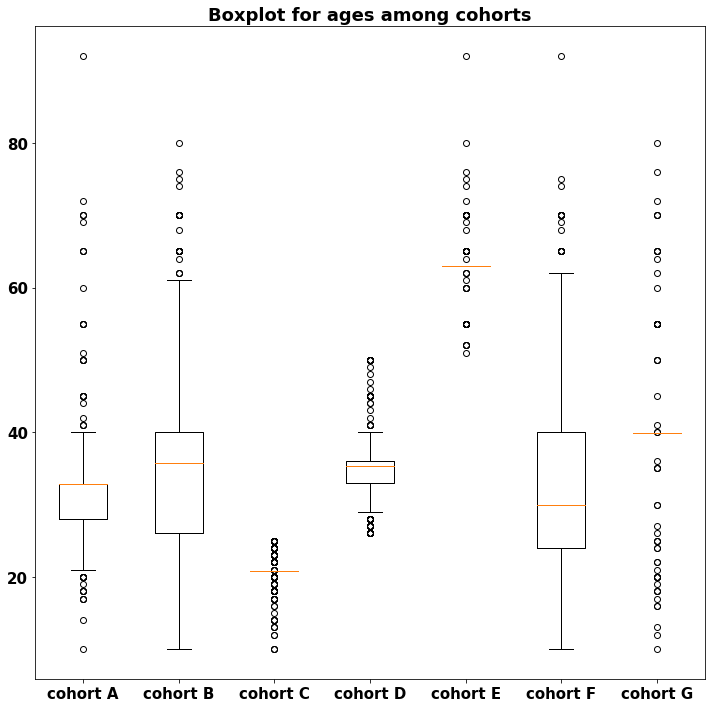

<Figure size 432x288 with 0 Axes>

In [293]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
bp = ax.boxplot(db_cohort_age,  vert = 1)

ax.set_xticklabels(['cohort A', 'cohort B',
                    'cohort C', 'cohort D', 'cohort E', 'cohort F', 'cohort G'])

plt.title("Boxplot for ages among cohorts", fontweight='bold')


plt.show()
plt.savefig('boxplot_age_cohort.png')



## Analysis for cohorts_HBSAG



In [294]:
data_cohort_hbsag = pd.read_excel('comp_data.xlsx', sheet_name='HBSAG')
data_cohort_hbsag.head()



,cohort A,cohort B,cohort C,cohort D,cohort E,cohort F,cohort G
0,2.05,2.1,2.10,2.06,0.062,2.105,2.207
1,1.70,1.8,1.90,2.09,0.102,2.057,2.481
2,1.50,1.6,2.03,2.10,0.041,1.731,2.397
3,2.04,1.8,1.30,2.10,0.028,1.846,2.139
4,1.90,1.6,2.30,2.20,0.064,1.631,1.986


### Interquartile range method





In [295]:
Q1 = data_cohort_hbsag.quantile(q=.25)
Q3 = data_cohort_hbsag.quantile(q=.75)
IQR = data_cohort_hbsag.apply(stats.iqr)

db_clean_iq_cohort_hbsag = data_cohort_hbsag[~((data_cohort_hbsag < (Q1-1.5*IQR)) | (data_cohort_hbsag > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_cohort_hbsag.shape





(265, 7)



### Copy  the data



In [296]:


df_cohort_hbsag = data_cohort_hbsag.copy()



In [307]:


import researchpy as rp
hbsag_cohort_summ = rp.summary_cont(df_cohort_hbsag)
hbsag_cohort_summ.to_csv('hbsag_cohort_summary.csv')
print('hbsag_cohort_summ')

db_cohort_hbsag = df_cohort_hbsag.fillna(df_cohort_hbsag.mean())





hbsag_cohort_summ


In [298]:
from scipy.stats import f_oneway

f_oneway(db_cohort_hbsag['cohort A'], db_cohort_hbsag['cohort B'], db_cohort_hbsag['cohort C'], db_cohort_hbsag['cohort D'],
        db_cohort_hbsag['cohort E'], db_cohort_hbsag['cohort F'], db_cohort_hbsag['cohort G'])



F_onewayResult(statistic=1257.6759972262082, pvalue=0.0)

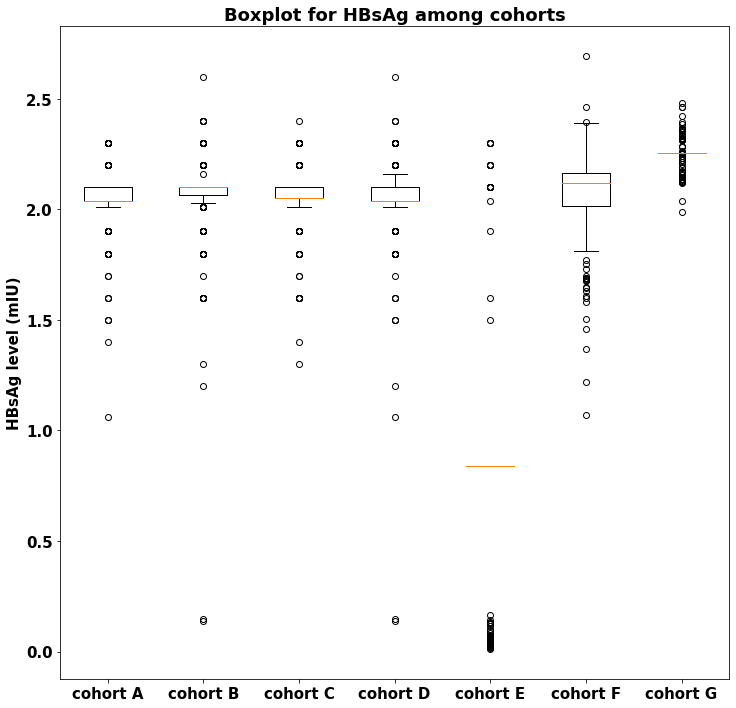

<Figure size 432x288 with 0 Axes>

In [346]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
bp = ax.boxplot(db_cohort_hbsag,  vert = 1)

ax.set_xticklabels(['cohort A', 'cohort B',
                    'cohort C', 'cohort D', 'cohort E', 'cohort F', 'cohort G'])

plt.title("Boxplot for HBsAg among cohorts", fontweight='bold')

plt.ylabel('HBsAg level (mIU)')


plt.show()
plt.savefig('boxplot_hbsag_cohort.jpeg')



In [300]:
## Analysis of HBEAG cohorts

data_cohort_hbeag = pd.read_excel('comp_data.xlsx', sheet_name='HBEAG')
data_cohort_hbeag.head()



,cohort A,cohort B,cohort C,cohort D,cohort E,cohort F,cohort G
0,0.057,0.029,0.093,0.114,0.062,0.029,2.013
1,0.024,0.062,0.094,0.026,0.102,0.057,2.168
2,0.037,0.034,2.200,0.066,0.041,0.024,1.891
3,0.053,0.082,0.129,0.134,0.028,0.062,1.689
4,0.091,0.055,1.600,2.200,0.064,0.034,2.115


In [301]:
### Interquartile range method





Q1 = data_cohort_hbeag.quantile(q=.25)
Q3 = data_cohort_hbeag.quantile(q=.75)
IQR = data_cohort_hbeag.apply(stats.iqr)

db_clean_iq_cohort_hbeag = data_cohort_hbeag[~((data_cohort_hbeag < (Q1-1.5*IQR)) | (data_cohort_hbeag > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_cohort_hbeag.shape







### Copy  the data




df_cohort_hbeag = data_cohort_hbeag.copy()



In [310]:
import researchpy as rp
hbeag_cohort_summ = rp.summary_cont(df_cohort_hbeag)


hbeag_cohort_summ.to_csv('hbeag_cohort_summary.csv')

db_cohort_hbeag = df_cohort_hbeag.fillna(df_cohort_hbeag.mean())





In [311]:
from scipy.stats import f_oneway

f_oneway(db_cohort_hbeag['cohort A'], db_cohort_hbeag['cohort B'], db_cohort_hbeag['cohort C'], db_cohort_hbeag['cohort D'],
        db_cohort_hbeag['cohort E'], db_cohort_hbeag['cohort F'], db_cohort_hbeag['cohort G'])

F_onewayResult(statistic=704.7166774907499, pvalue=0.0)

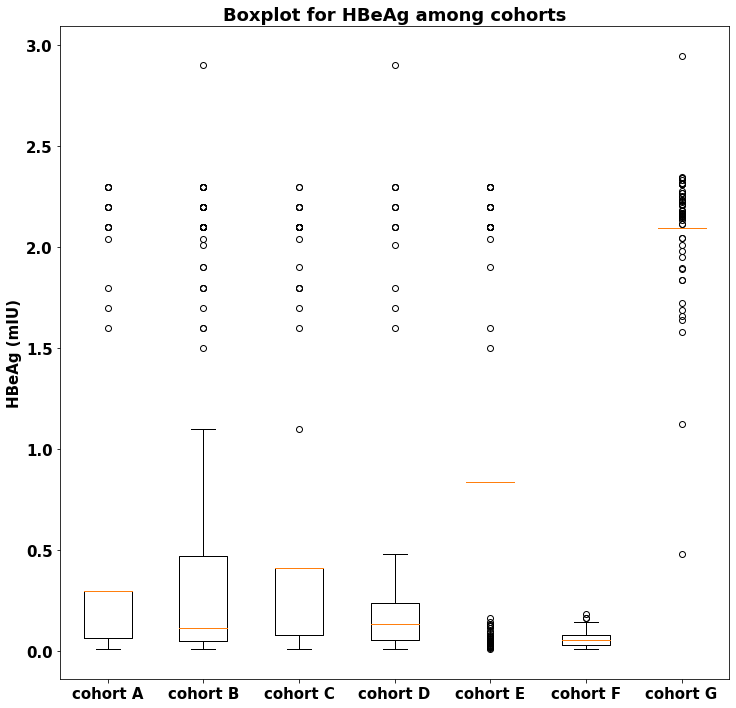

<Figure size 432x288 with 0 Axes>

In [347]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
bp = ax.boxplot(db_cohort_hbeag,  vert = 1)

ax.set_xticklabels(['cohort A', 'cohort B',
                    'cohort C', 'cohort D', 'cohort E', 'cohort F', 'cohort G'])

plt.title("Boxplot for HBeAg among cohorts", fontweight='bold')
plt.ylabel('HBeAg (mIU)')


plt.show()
plt.savefig('boxplot_hbeag_cohort.jpeg')



In [303]:
## Analysis of HBV DNA cohorts



data_cohort_hbv = pd.read_excel('comp_data.xlsx', sheet_name='HBV')
data_cohort_hbv.head()





,cohort A,cohort B,cohort C,cohort D,cohort E,cohort F,cohort G
0,7350.0,3.8,211.0,105.0,3.8,3.8,27784750.0
1,3.8,3.8,3.8,139.0,2750.0,7350.0,225573629.0
2,3.8,3.8,192423450.0,113.0,3.8,3.8,20737375.0
3,3.8,3.8,150.0,329.0,315.0,3.8,96200.0
4,3.8,3.8,11680.0,16987200.0,131.0,3.8,2537.0


In [304]:
### Interquartile range method




Q1 = data_cohort_hbv.quantile(q=.25)
Q3 = data_cohort_hbv.quantile(q=.75)
IQR = data_cohort_hbv.apply(stats.iqr)

db_clean_iq_cohort_hbv = data_cohort_hbv[~((data_cohort_hbv < (Q1-1.5*IQR)) | (data_cohort_hbv > (Q3+1.5*IQR))).any(axis=1)]

db_clean_iq_cohort_hbv.shape





### Copy  the data





df_cohort_hbv = data_cohort_hbv.copy()



In [305]:
import researchpy as rp
hbv_cohort_summ = rp.summary_cont(df_cohort_hbv)
hbv_cohort_summ.to_csv('hbv_cohort_summary.csv')

db_cohort_hbv = df_cohort_hbv.fillna(df_cohort_hbv.mean())

from scipy.stats import f_oneway

f_oneway(db_cohort_hbv['cohort A'], db_cohort_hbv['cohort B'], db_cohort_hbv['cohort C'], db_cohort_hbv['cohort D'],
        db_cohort_hbv['cohort E'], db_cohort_hbv['cohort F'], db_cohort_hbv['cohort G'])


F_onewayResult(statistic=40.81385733149564, pvalue=3.9604240869519876e-47)

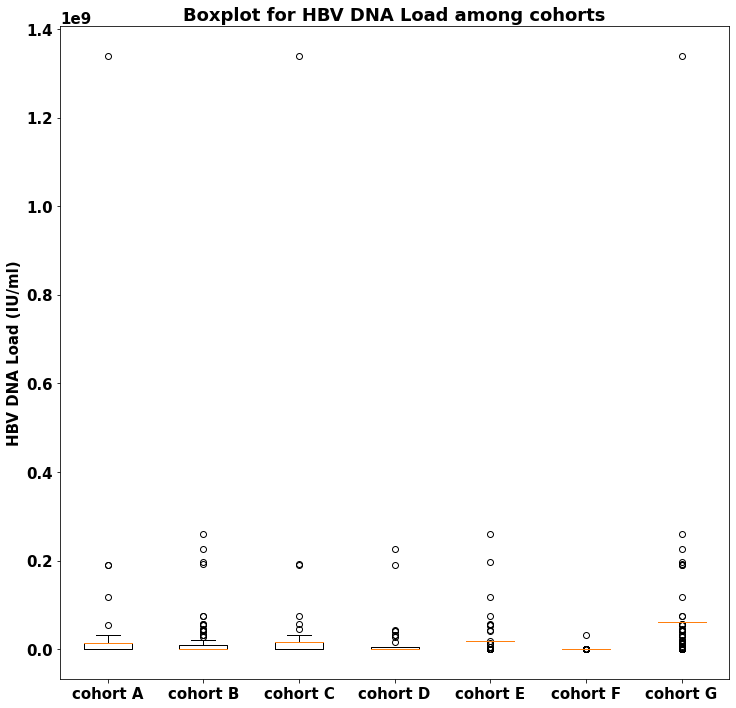

<Figure size 432x288 with 0 Axes>

In [348]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
bp = ax.boxplot(db_cohort_hbv,  vert = 1)

ax.set_xticklabels(['cohort A', 'cohort B',
                    'cohort C', 'cohort D', 'cohort E', 'cohort F', 'cohort G'])

plt.title("Boxplot for HBV DNA Load among cohorts", fontweight='bold')
plt.ylabel('HBV DNA Load (IU/ml)')


plt.show()
plt.savefig('boxplot_hbv_DNA_load_cohort.jpeg')

